In [3]:
import numpy as np
np.pi

3.141592653589793

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pylab
import math
import sys
import operator
import inspect
import lmfit
from lmfit import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal
from scipy import fftpack
from scipy.integrate import trapz
from operator import itemgetter
from skimage import util
from scipy import stats
from numpy import NaN, Inf, arange, isscalar, asarray, array
##################################################    PEAK DETECTOR     ###############################################
def peakdet(v, delta, x = None):
    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True

    return array(maxtab), array(mintab)
##################################################    FITTING MODELS     ##############################################

def model(t, decay):  # , omega, resid):
    return np.exp(-t/decay)  # * np.cos(omega * t) + resid
gmodel = lmfit.Model(model)
def line(x, slope, intercept):
    """a line"""
    return 10**((slope*np.log(x))-intercept)
mod = Model(line)

def line2(x, slope, intercept):
    """a line"""
    return slope*x+intercept


def adjust_yaxis(ax,ydif,v):
    """shift axis ax by ydiff, maintaining point v at the same location"""
    inv = ax.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, ydif))
    miny, maxy = ax.get_ylim()
    miny, maxy = miny - v, maxy - v
    if -miny>maxy or (-miny==maxy and dy > 0):
        nminy = miny
        nmaxy = miny*(maxy+dy)/(miny+dy)
    else:
        nmaxy = maxy
        nminy = maxy*(miny+dy)/(maxy+dy)
    ax.set_ylim(nminy+v, nmaxy+v)
    
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    adjust_yaxis(ax2,(y1-y2)/2,v2)
    adjust_yaxis(ax1,(y2-y1)/2,v1)

#################################################    NAME RETREIVER     ###############################################

def retrieve_name(var):
        """
        Gets the name of var. Does it from the out most frame inner-wards.
        :param var: variable to get name from.
        :return: string
        """
        for fi in reversed(inspect.stack()):
            names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
            if len(names) > 0:
                return names[0]
            
###################################################    VALUE FINDER     ###############################################
            
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#######################################################################################################################
####################################################    FUNCTIONS     #################################################
#######################################################################################################################

run = ['001','002','003','004','005','006','007','008','009','010',
       '011','012','013','014','015','016','017','018','019','020', 
       '021','022','023','024','025','026','027','028','029','030',
       '031','032','033','034','035','036','037','038','039','040',
       '041','042','043','044','045','046','047','048','049','050',
       '051','052','053','054','055','056','057','058','059','060',
       '061','062','063','064','065','066','067','068','069','070',
       '071','072','073','074','075','076','077','078','079','080',
       '081','082','083','084','085','086','087','088','089','090',
       '091','092','093','094','095','096','097','098','099','100',
       '101','102','103','104','105','106','107','108','109','110',
       '111','112','113','114','115','116','117','118','119','120',
       '121','122','123','124','125','126','127','128','129','130',
       '131','132','133','134','135','136','137','138','139','140',
       '141','142','143','144','145','146','147','148','149','150',
       '151','152','153','154','155','156','157','158','159','160',
       '161','162','163','164','165','166','167','168','169','170',
       '171','172','173','174','175','176','177','178','179','180',
       '181','182','183','184','185','186','187','188','189','190','191']

#################################################    W7X DIAGPLOTTER     ##############################################

def diag_plotter_w7x(kx, my_data, alldata=False, fig=True):
    
    integ = my_data[0, :]
    rmsvl = my_data[1, :]
    decay = my_data[2, :]
    osrat = my_data[3, :]
    burat = my_data[4, :]
    g1rat = my_data[5, :]
    g2rat = my_data[6, :]
    dcrat = my_data[7, :]
    perid = my_data[8, :]
    perbd = my_data[9, :]
    pekti = my_data[10, :]
    
    if fig == True:
        fig = plt.figure(figsize=(30, 20))
    else:
        fig = fig
        
    ax1 = fig.add_subplot(331)
    ax2 = fig.add_subplot(332)
    ax3 = fig.add_subplot(333)
    ax4 = fig.add_subplot(334)
    ax5 = fig.add_subplot(335)
    ax6 = fig.add_subplot(336)
    ax7 = fig.add_subplot(337)
    ax8 = fig.add_subplot(338)
    ax9 = fig.add_subplot(339)


    ########  top
    ax1.plot(kx, integ)
    ax2.plot(kx, rmsvl)
    ax3.plot(kx, decay)
    
    #ax1.set_xlabel('$k_{x} \\rho_{ti}$')
    #ax2.set_xlabel('$k_{x} \\rho_{ti}$')
    #ax3.set_xlabel('$k_{x} \\rho_{ti}$')

    ax1.title.set_text('Integral')
    ax2.title.set_text('RMS value')
    ax3.title.set_text('Decay length')

    ########  mid
    ax4.plot(kx, osrat)
    ax5.plot(kx, g2rat, label='Growth ratio')
    ax5.plot(kx, dcrat, label='Decay ratio')
    ax6.plot(kx, pekti, label='{0}'.format(retrieve_name(my_data)))
    
    #ax4.set_xlabel('$k_{x} \\rho_{ti}$')
    #ax5.set_xlabel('$k_{x} \\rho_{ti}$')
    #ax6.set_xlabel('$k_{x} \\rho_{ti}$')
    
    ax4.title.set_text('Overshoot ratio')
    # ax5.title.set_text('')
    ax6.title.set_text('Peak time')
    ax6.legend(loc="upper right")
    ax5.legend(loc="lower right")
    
    ########  bottom
    #ax3.title.set_text('RMS')
    ax7.plot(kx, g1rat)
    ax8.plot(kx, burat)
    ax9.plot(kx, perid, label='Decay Period')
    ax9.plot(kx, perbd, label='Bump Period')
    
    ax7.title.set_text('Bump growth ratio')
    ax8.title.set_text('Bump ratio')
    # ax9.title.set_text('Period')
    ax9.legend(loc="upper right")
    
    ax7.set_xlabel('$k_{x} \\rho_{ti}$')
    ax8.set_xlabel('$k_{x} \\rho_{ti}$')
    ax9.set_xlabel('$k_{x} \\rho_{ti}$')

    if alldata == False:
        fig.show()

    return fig
###############################################    TROUBLESHOOTER    ##################################################

def troubleshooter(E, t, f_s, label, spectrogram=False):
    
    fig = plt.figure(figsize=(13, 6.5))
    ax2 = fig.add_subplot(111)
    #ax2.set_ylim(-2, 2)
    #ax2.set_xlim(0, 500)
    ax2.plot(t, E, label='{0}'.format(label))
    ax2.axhline(y=0, color='black', linestyle='dashed')
    
    maxtab, mintab, OS, BR, GR1, GR2, DR, PE, PE2, TP, a, b1, b2, e, i, o = nucleus_w7x(E, t, label, diag=True)
    
    if type(b1) == float and type(o) != float:
        n = ['a', 'e', 'i', 'o']
        x = np.array([a, e, i, o])[:,1]
        y = np.array([a, e, i, o])[:,0]
    elif type(b1) != float and type(o) == float:
        n = ['a', 'b1', 'b2', 'e', 'i']
        x = np.array([a, b1, b2, e, i])[:,1]
        y = np.array([a, b1, b2, e, i])[:,0]
    else:
        n = ['a', 'b1', 'b2', 'e', 'i', 'o']
        x = np.array([a, b1, b2, e, i, o])[:,1]
        y = np.array([a, b1, b2, e, i, o])[:,0]
    ax2.scatter(y,x, color='blue')
    for r, txt in enumerate(n):
        ax2.annotate(txt, (y[r], x[r]))
    ax2.scatter(e[0], e[1], color='green')
    ax2.scatter(maxtab[:, 0], maxtab[:, 1], color='red')
    ax2.scatter(mintab[:, 0], mintab[:, 1], color='blue')
    #ax2.set_xlim(-10, 100)
    print('Overshoot ratio (OS): ' + str(OS))
    print('Bump ratio (BR): ' + str(BR))
    print('Bump growth ratio (GR1): ' + str(GR1))
    print('2nd growth ratio (GR2): ' + str(GR2))
    print('Period (PE): ' + str(PE))
    print('Peak time (TP): ' + str(TP))
    
    if spectrogram == True:
            ########  SPECTROGRAM
            M = 1024
            slices = util.view_as_windows(E, window_shape=(M,), step=2)
            win = np.hanning(M + 1)[:-1]
            slices = slices * win
            slices = slices.T
            spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
            spectrum = np.abs(spectrum)
            S = np.abs(spectrum)
            S = 20 * np.log10(S / np.max(S))
            plt.figure(figsize=(13, 6.5))
            plt.imshow(S, origin='lower', cmap='viridis')
            plt.title(str(label), fontsize=30)
            plt.axis('tight')
            plt.ylabel('Frequency [Hz]')
            plt.xlabel('Time ($a / v_{ti}$)')
            plt.ylim([0, 100])
    plt.show()
    
    return 
##################################################    NUCLEUS W7X     #################################################
    
def nucleus_w7x(E, t, label, diag=False):
    # Peak detection
    maxtab, mintab = peakdet(E, 0.001, x=t)
    
    # A fitting to the peak values to get the decay coefficient:
    result = gmodel.fit(E[:150], t=t[:150], decay=10, nan_policy='propagate')

    # Can you guess the residual?
    if 0.95 <= np.abs(E[-1]/mintab[0, 1]) <= 1.02:
        print('residual? :' + str(mintab[0, 1]))
        
    # Maxpeaks
    a = maxtab[0, :]  # Initial point
    
    if np.shape(maxtab) != (2, 2):  # If there are more points than a and i:
        b1 = maxtab[1, :]  # Second Peak
        i = maxtab[2, :]            
    elif np.shape(maxtab) == (2, 2):
        i = maxtab[1, :]
        b1 = i
        print('i point is the first one')     
    
    # Minpeaks
    b2 = mintab[0, :]  # (Technically) The lowest point
        
    min_index, min_value = min(enumerate(mintab[:, 1]), key=operator.itemgetter(1))  
    f = mintab[min_index, :]  # This determines the minimum peak
    
    if np.shape(mintab) != (1, 2):
        e = mintab[1, :]
    else:
        e = f

    # The initial bump is not detected if the points e & i are both > 0.32
    if b1[0] > 60:
        i = b1
        if i[1] < 0:
            i = maxtab[2, :]
        e = b2
        b1, b2, BR = np.nan, np.nan, np.nan
        GR1, GR2, PE2 = np.nan, np.nan, np.nan
    else:
        BR = np.abs(b2[1] / a[1])                      # Bump ratio
        GR1 = np.abs((e[1]-a[1]) / (b2[1]-a[1]))       # Bump growth ratio
        GR2 = np.abs(e[1] / b2[1])                     # Growth ratio
        PE2 = np.abs(e[0] - b2[0])                     # Bump period

    if isinstance(b2, float) and np.shape(mintab) != (1, 2):  # if b2 does not exist and mintab has more than 1 point
        o = mintab[1, :]
        if o[0] < i[0]:
            o = mintab[2, :]
        DR = np.abs(o[1] / e[1])                       # Decay ratio
        PE = np.abs(o[0] - e[0])                       # Decay period
    elif isinstance(b2, float) == False and np.shape(mintab)[0] >=3:  # if b2 exists and the shape of mintab is >=3
        o = mintab[2, :]
        DR = np.abs(o[1] / e[1])  # Decay ratio
        PE = np.abs(o[0] - e[0])  # Decay period
    else:
        o = np.nan
        DR = np.nan  # Decay ratio
        PE = np.nan  # Decay period

    TP = e[0]                                          # Peak time
    OS = np.abs(e[1] / a[1])                           # Overshoot ratio
            
    if diag == True:
        print('Diag mode on')
        
        return maxtab, mintab, OS, BR, GR1, GR2, DR, PE, PE2, TP, a, b1, b2, e, i, o
    else:

        return result, OS, BR, GR1, GR2, DR, PE, PE2, TP
##############################################    DIAGNOSTIC TOOL W7X     #############################################

def diag_w7x(filename, minlim=None, maxlim=None, spectrogram=False, plot=False, my_data=None, k=None, Lx=None, nkx0=None):
    
    kx_ind = np.linspace((np.pi*2/Lx), (np.pi*2/Lx)*((nkx0//2)), (nkx0//2))
    
    if isinstance(maxlim, int) == False:
        kx = []
        nummy = []
        for n in maxlim:
            kx.append(kx_ind[n-1])
            nummy.append(run[n-1])
    else:
        if maxlim is not None and minlim is None:
            nummy = run[0:maxlim]
            if k is not None:
                kx = kx_ind[k:(maxlim+k)]
            else:
                kx = kx_ind[0:maxlim]
        elif minlim is not None and maxlim is None:
            nummy = run[minlim:len(run)]
            kx = kx_ind[minlim:len(run)]
        elif minlim is not None and maxlim is not None:
            nummy = run[minlim:maxlim]
            if k is not None:
                kx = kx_ind[(k+minlim):(maxlim+k)]
            else:
                kx = kx_ind[minlim:maxlim]
        if minlim is None and maxlim is None:
            nummy = run
            kx = kx_ind
    
    dataset = [('./{0}/gamdiagions_0{1}.dat'.format(filename, index), index) for index in nummy]     
    datalist = [ ( pylab.loadtxt(datapath), label) for datapath, label in dataset]  # Load the .dat files as an array

    if plot == True and type(my_data) == type(None):
        fig, ax1 = plt.subplots(figsize=(13, 7))
        ax2 = ax1.twinx()
        #plt.title("{0}".format(filename), fontsize=30)
        #plt.xscale('log')
        ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
        ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
    
    if type(my_data) == type(None):
        integ = []
        rmsvl = []
        decay = []
        osrat = []
        burat = []
        g1rat = []
        g2rat = []
        dcrat = []
        perid = []
        perbd = []
        pekti = []
    else:
        integ = my_data[0, :].tolist()
        rmsvl = my_data[1, :].tolist()
        decay = my_data[2, :].tolist()
        osrat = my_data[3, :].tolist()
        burat = my_data[4, :].tolist()
        g1rat = my_data[5, :].tolist()
        g2rat = my_data[6, :].tolist()
        dcrat = my_data[7, :].tolist()
        perid = my_data[8, :].tolist()
        perbd = my_data[9, :].tolist()
        pekti = my_data[10, :].tolist()
            
    for data, label in datalist:
        E = (data[:,1]*(1/data[0, 1]))
        t = data[:,0]
        
        if plot == True:
            ax1.plot(t, E, linewidth=2)
        idx = (np.abs(t - 450)).argmin()
        intefield = np.trapz(E[0:idx], t[0:idx])
        integ.append(intefield)
        rms = np.sqrt(np.mean(E**2))
        rmsvl.append(rms)
        
        result, OS, BR, GR1, GR2, DR, PE, PE2, TP = nucleus_w7x(E, t, label, diag=False)   
        
        decay.append(result.best_values.get('decay'))
        osrat.append(OS)
        burat.append(BR)
        g1rat.append(GR1)
        g2rat.append(GR2)
        dcrat.append(DR)
        perid.append(PE)
        perbd.append(PE2)
        pekti.append(TP)
    Q = [( pylab.loadtxt('./{0}/../ITGa_NL/omt1/nrgsummaryions_act.dat'.format(filename),usecols = (0, 2)))][0]
    ax2.plot(Q[:, 0], Q[:, 1], 'r', linewidth=3, label='$\\langle \Gamma_{ES} \\rangle$')
    #ax1.set_xlim([-10, max(t)])
    ax1.set_xlim([-10, 1000])
    ax1.set_ylim([-0.6, 1.1])
    ax2.set_ylabel('$\\langle \Gamma_{ES} \\rangle \ / \ (v_{ti} \\rho_{i}^{2} n_{e, 0} / L_{ref}^{2})$', fontsize=16)
    #np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
    kx_ind = list("{:0.3f}".format(x) for x in kx)
    ax1.legend(kx_ind, loc='center right', fontsize=12, title='$k_{x}$')  # , bbox_to_anchor=(-1.2, 0.5))
    ax2.legend(loc='upper right', fontsize=12)  # , bbox_to_anchor=(-1.2, 0.7))
    fig.tight_layout()
    align_yaxis(ax1, 0, ax2, 0)
    ax2.axhline(y=0, color='black', linestyle='dashed')
    #plt.savefig('../../CMSS_2018/Poster/w7x_nlzf_plot.pdf', format='pdf', dpi=1200)
    plt.show()


    if spectrogram == True:
        ########  SPECTROGRAM
        f_s = len(data[:, 0]) / data[-1, 0]
        E = (data[:,1]*(1/data[0, 1]))
        M = 1024
        slices = util.view_as_windows(E, window_shape=(M,), step=2)
        win = np.hanning(M + 1)[:-1]
        slices = slices * win
        slices = slices.T
        spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
        spectrum = np.abs(spectrum)
        S = np.abs(spectrum)
        S = 20 * np.log10(S / np.max(S))
        plt.figure()
        plt.imshow(S, origin='lower', cmap='viridis')
        plt.title(str(label), fontsize=30)
        plt.axis('tight')
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time ($a / v_{ti}$)')
        #plt.ylim([0, 0.3])

    f_s = len(data[:, 0]) / data[-1, 0]
    my_data = np.array([integ, rmsvl, decay, osrat, burat, g1rat, g2rat, dcrat, perid, perbd, pekti])
    return kx, my_data, E, t, f_s, label

In [2]:
min_kx = 0.09
minky = 1.1

In [ ]:
######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################

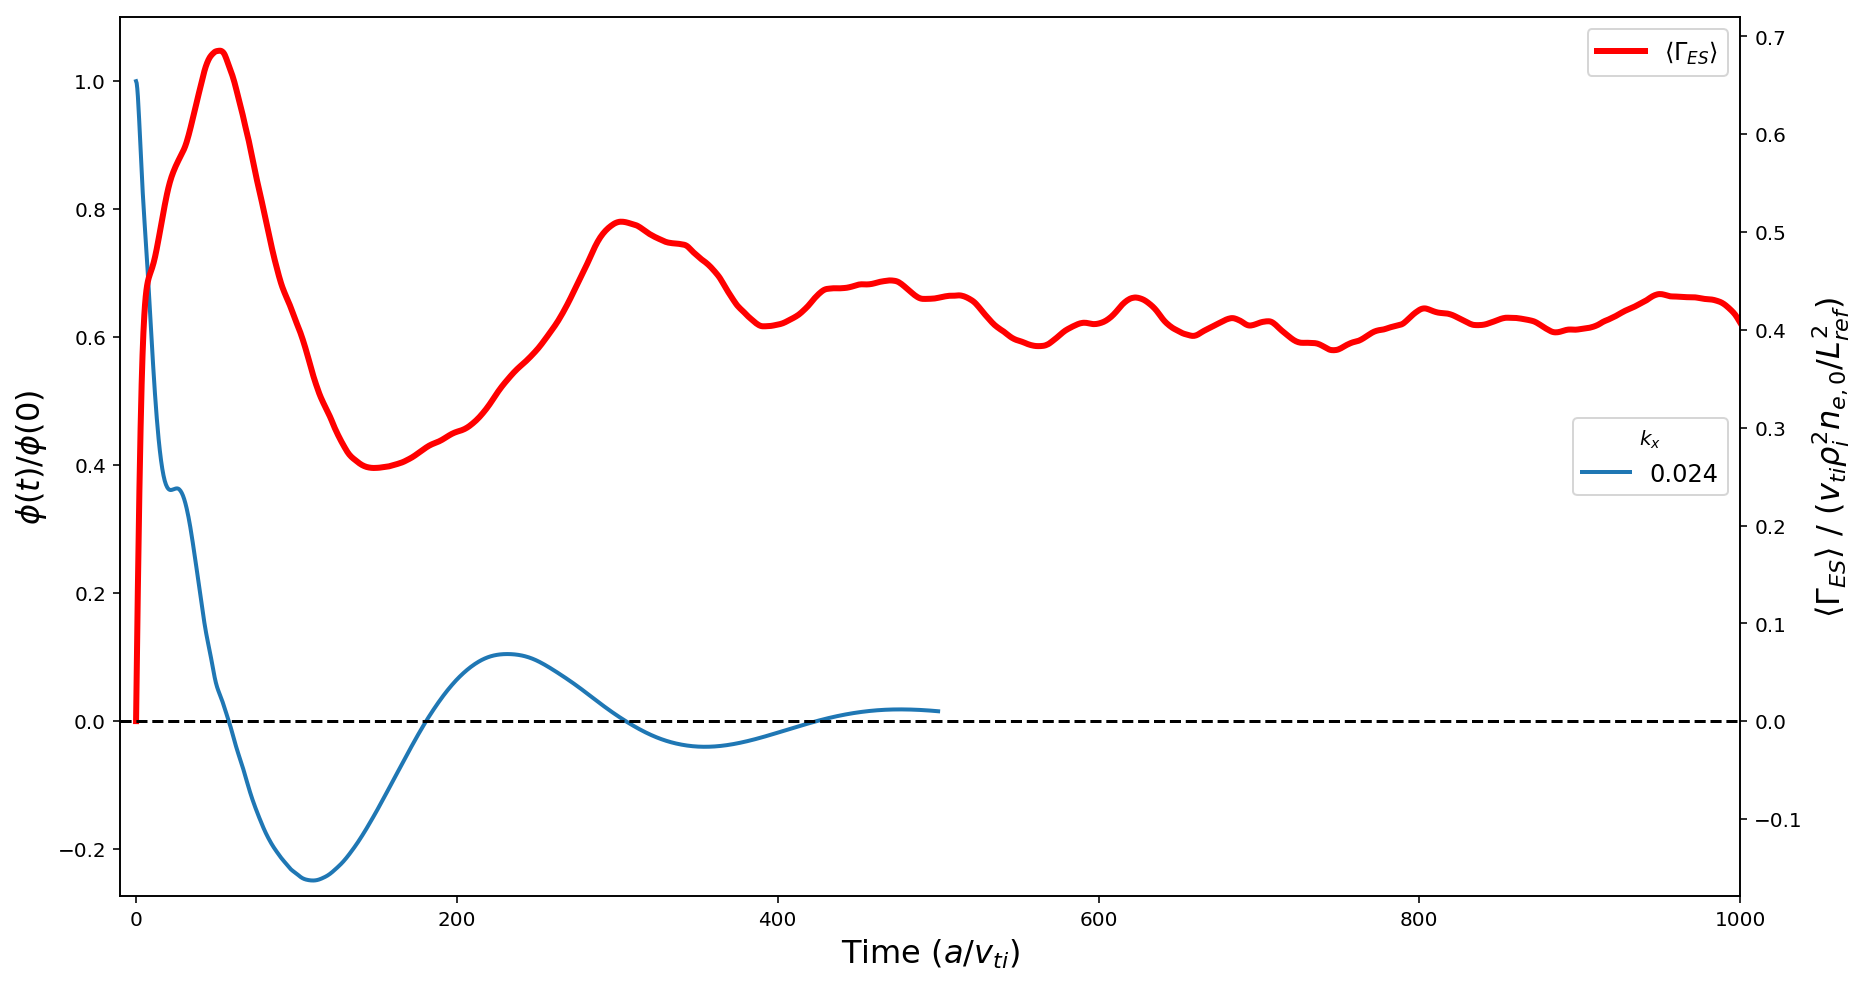

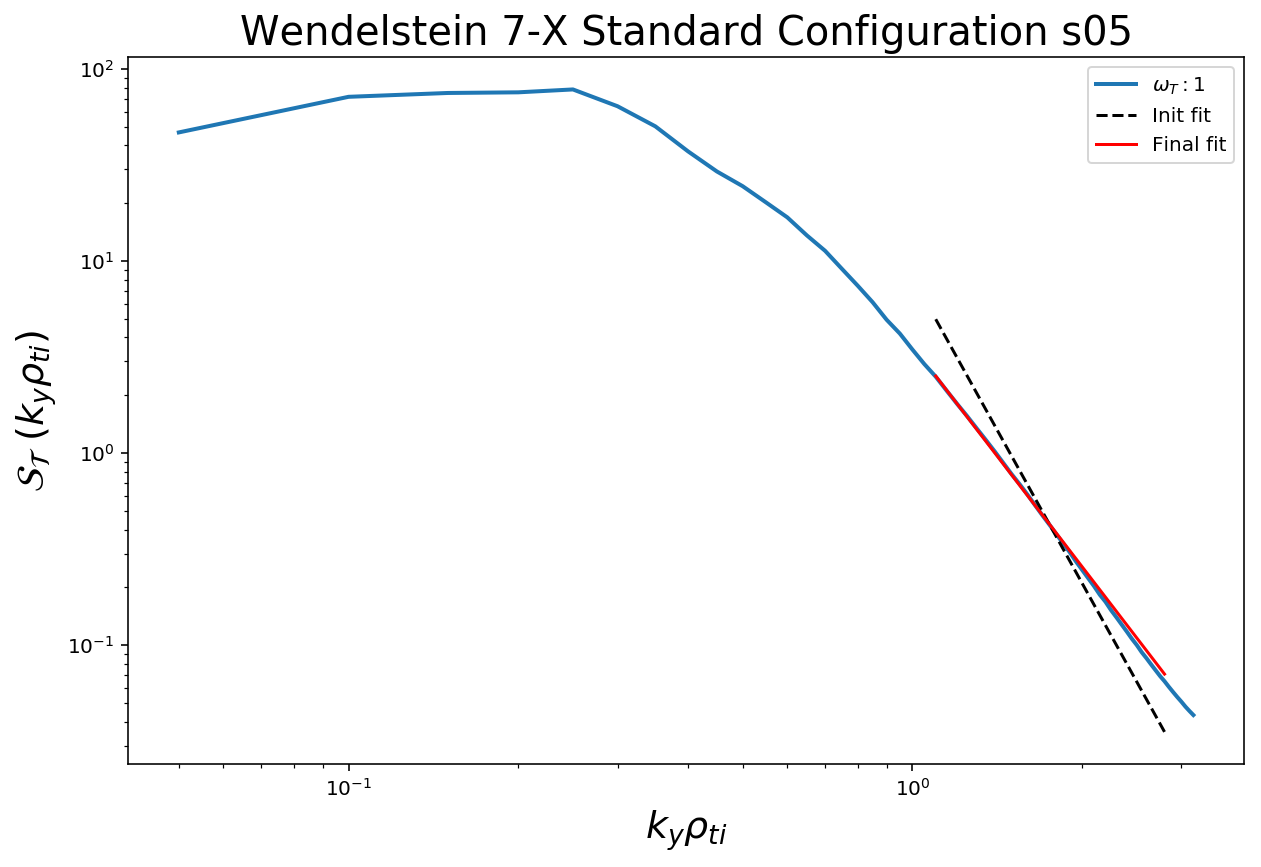

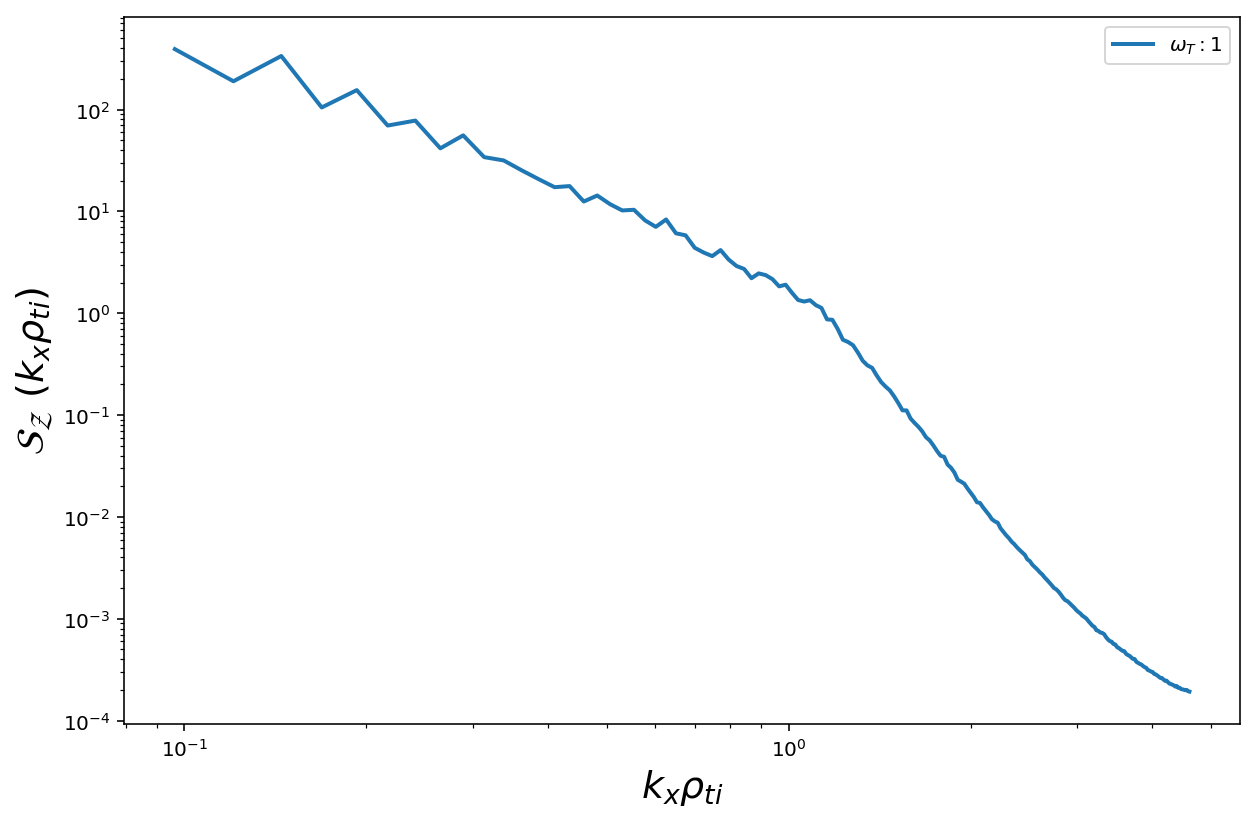

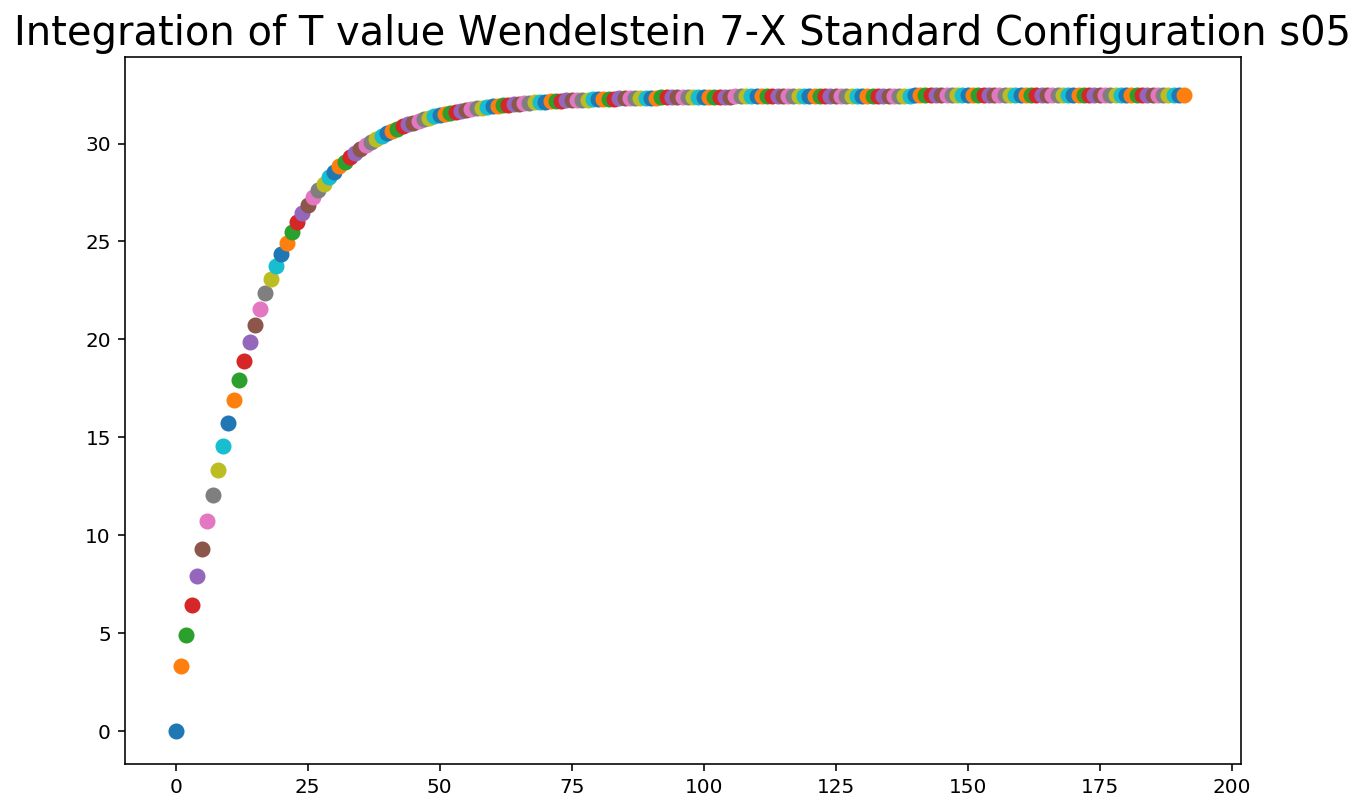

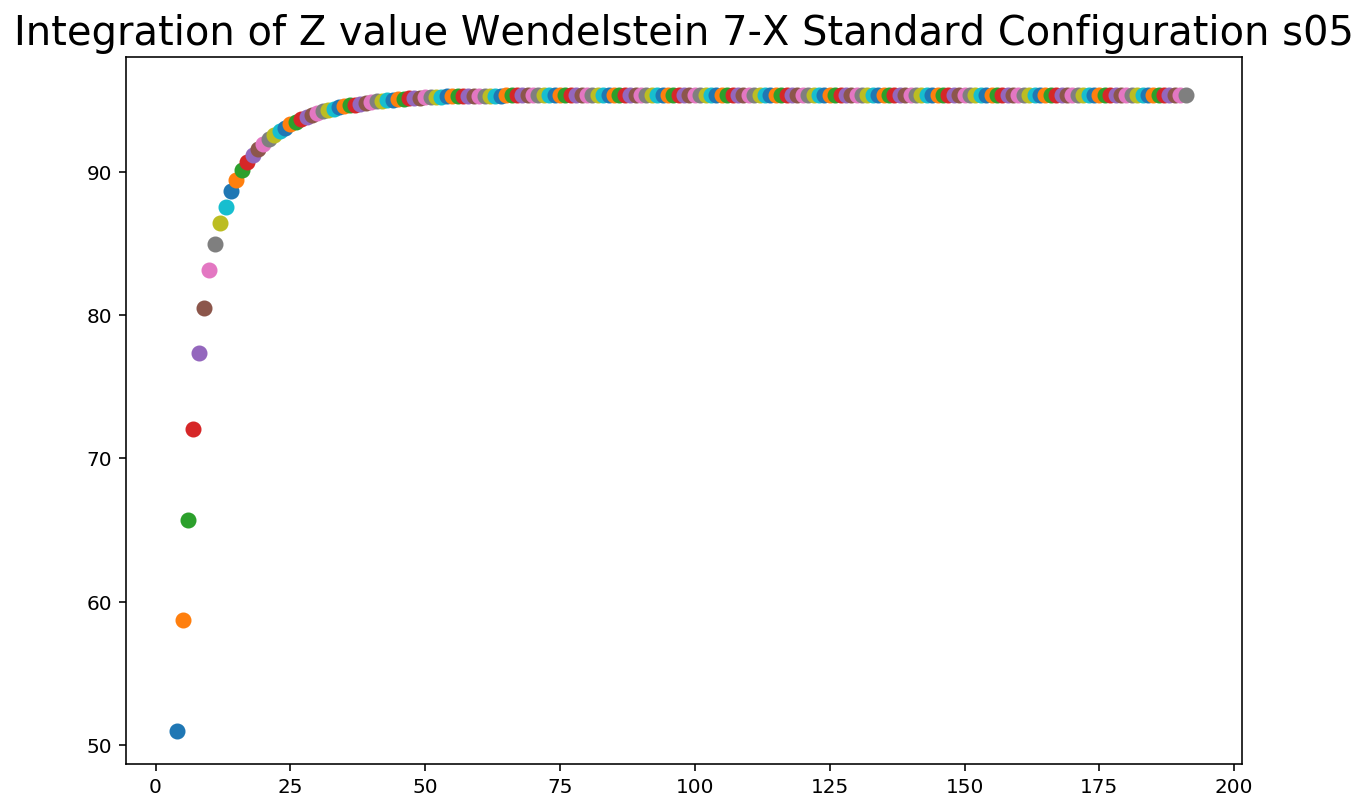

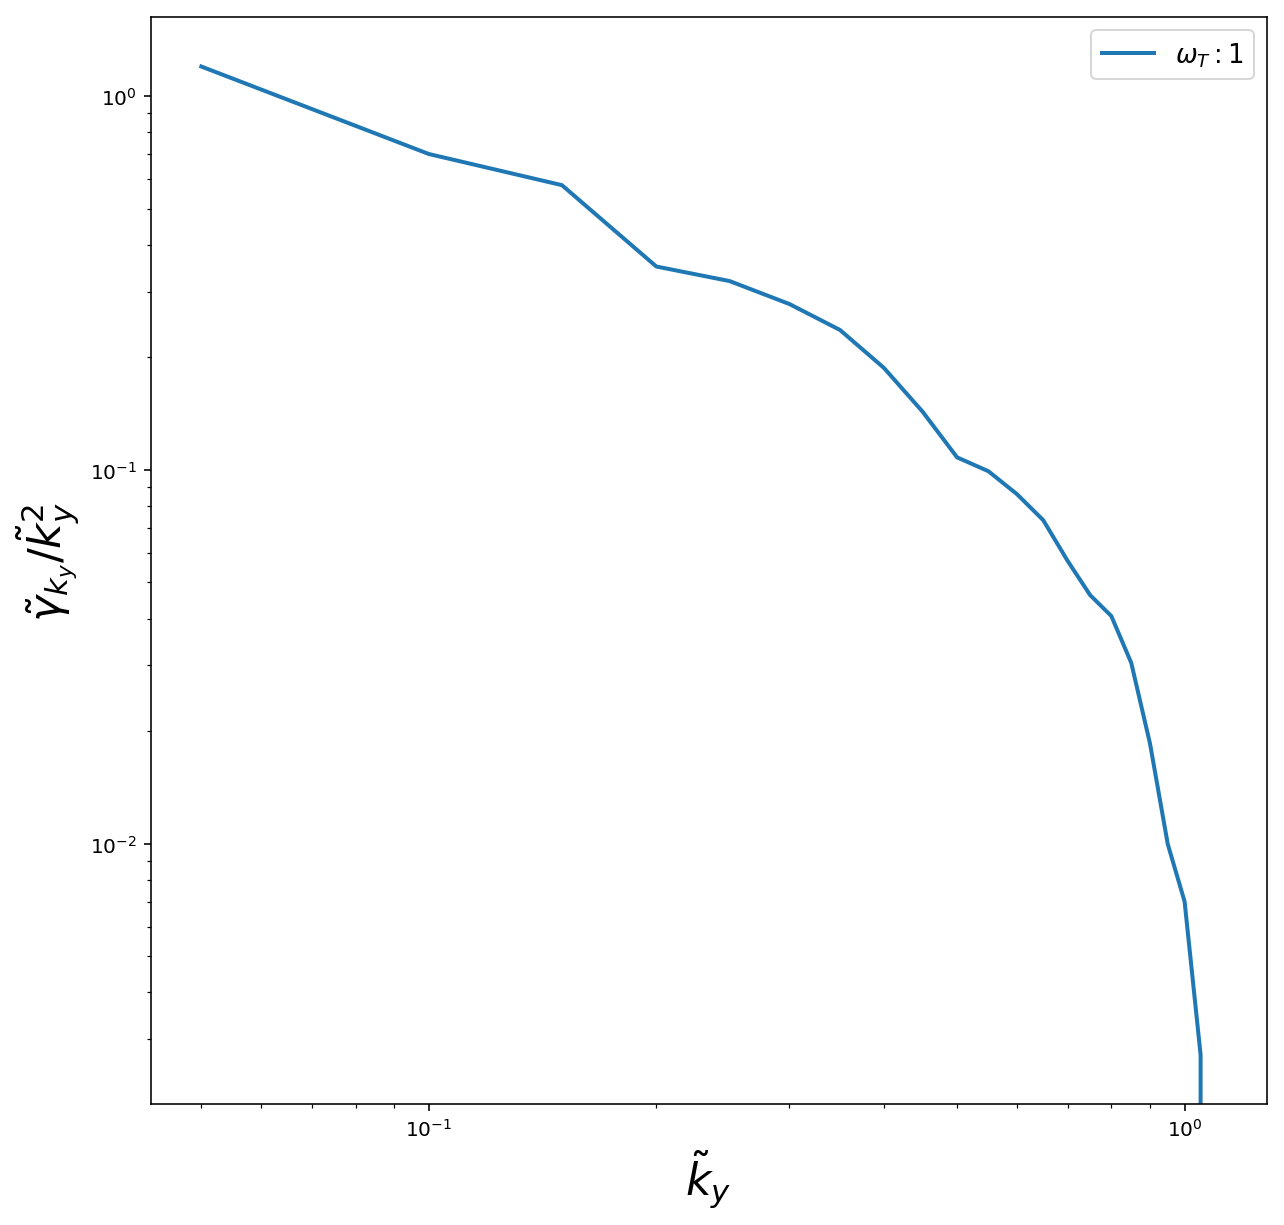

W7X Standard Configuration s05
S_T slope   -1.6612698030809954
T total:    32.47367641619342
T Nunami:   20.66263432590603
Z total:    36.657096744572605
Sum g/k^2:   4.57230938434909
Tau_ZF:      6.372175323013091


In [5]:
################################
# STee maker & file loader
# For Standard Configuration s05
################################

# Load data
w1 = [( pylab.loadtxt('./W7Xsds05/ITGa_NL/omt1/spectraions_act.dat',usecols = (0, 1)))][0]

nkx0 = 384
nky0 = 64
Lx = 260.633
kx_minimum = 0.0241
ky_minimum = 0.05

Lr_sd = 0.5387892  # Minor radius W7X sd s05
Ro_sd = 5.5079880  # Major radius W7X sd s05
Ts_sd = 350        # Simulation temperature
TN_sd = 2160       # Model reference temperature
rhos_sd = 0.0027   # Simulation gyroradius
rhoN_sd = 0.0018   # Model reference gyroradius

q = np.int(nkx0/2)
#factor_sd = ((Ts_sd*rhos_sd/Lr_sd)/(TN_sd*rhoN_sd/Ro_sd))**2
factor_sd = ((1/Lr_sd)/(1/Ro_sd))**2

top = q # The truncation limit

######################## Containers:
ky_sd = np.zeros((top, nky0))
phiw1 = np.zeros((top, nky0))
St_sd = np.zeros((nky0))
########################

# Extract ky and Phi from each kx and sum them
for n in range(0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_sd[n] = w1[lo:hi, 0]
    phiw1[n] = w1[lo:hi, 1]
    np.add(St_sd, phiw1[n]*factor_sd/ky_minimum, out=St_sd, where=True)

hi = (nky0+(nky0*(q-1)))
kx_sd = w1[hi:(hi+top), 0]
Sz_sd = w1[hi:(hi+top), 1]*factor_sd/kx_minimum
idx = (np.abs(kx_sd - min_kx)).argmin()
kx_sd = kx_sd[idx:]
Sz_sd = Sz_sd[idx:]

kx_w7x, my_data_w7x, E, t, f_s, label = diag_w7x('W7Xsds05/GAM', maxlim=[1], plot=True, Lx=Lx, nkx0=nkx0)
Tzf = my_data_w7x[0, :]
OSrat = my_data_w7x[3, :]
tzf_w7xsds05 = Tzf[min(range(len(kx_w7x)), key=lambda i: abs(kx_w7x[i]-0.1))]

idx2 = (np.abs(ky_sd - minky)).argmin()
idx2f = idx2+35
Y = St_sd[idx2:idx2f]
X = ky_sd[1, idx2:idx2f]
pars = mod.make_params(intercept=-np.log(Y[0]), slope=-2.3)
out = mod.fit(Y, pars, x=X, nan_policy='propagate')
#print(out.fit_report(min_correl=0.25))

plt.figure(figsize=(10, 6.5))
plt.title("Wendelstein 7-X Standard Configuration s05", fontsize=20)
plt.plot(ky_sd[1, 1:], St_sd[1:], linewidth=2)  # Printing: the truncated range with normalisation
plt.plot(X, out.init_fit, 'k--')
plt.plot(X, out.best_fit, 'r-')
plt.legend(['$\omega_{T}: 1$', 'Init fit', 'Final fit'], fontsize=10)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{y}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{T}} \ (k_{y} \\rho_{ti})$',fontsize=19)
#plt.savefig('w7x_st_plot.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.plot(kx_sd, Sz_sd, linewidth=2)
#plt.plot(kx_w7x, Tzf, linewidth=2)
#plt.plot(kx_w7x, OSrat, linewidth=2)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
plt.legend(['$\omega_{T}: 1$', '$\\tau_{ZF}$', 'Overshoot Ratio'], fontsize=10)
#plt.savefig('w7x_sz_plot.eps', format='eps', dpi=1200)
plt.show()

# Piece of code to verify the integrals values are correct up to the truncation
St_sd = np.zeros((nky0))
ky_sd = np.zeros((top, nky0))
phiw1 = np.zeros((top, nky0))

plt.figure(figsize=(10, 6.5))
plt.title("Integration of T value Wendelstein 7-X Standard Configuration s05", fontsize=20)
for n in range (0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_sd[n] = w1[lo:hi, 0]
    phiw1[n] = w1[lo:hi, 1]
    # Complete range with normalisation:
    np.add(St_sd, phiw1[n]*factor_sd/ky_minimum, out=St_sd, where=True)
    te_omt1 = trapz(St_sd[1:], x=ky_sd[1, 1:])
    plt.scatter(n, te_omt1, linewidth=2)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.title("Integration of Z value Wendelstein 7-X Standard Configuration s05", fontsize=20)
hi = (nky0+(nky0*(q-1)))
for top in range (idx, top):
    kz_w1 = w1[hi:(hi+top), 0]
    pz_w1 = w1[hi:(hi+top), 1]*factor_sd/kx_minimum
    z_omt1 = trapz(pz_w1, x=kz_w1)
    plt.scatter(top, z_omt1, linewidth=2)
plt.show()

####### Load Linear simulations growth rates #######
dataset1 = [('./W7Xsds05/ITGa_l/omt1.dat')]
datalist_1 = [ ( pylab.loadtxt(datapath,usecols = (0, 2, 4, 5))) for datapath in dataset1]
datalist_1 = datalist_1[0]
ky_min1 = datalist_1[:, 1]
gamma1 = datalist_1[:, 2]
omega1 = datalist_1[:, 3]

lo = 0
hi = len(ky_min1)

k1 = ky_min1[lo:hi]
g1 = gamma1[lo:hi]

#plt.figure(figsize=(15, 5))
#pylab.title("Wendelstein 7-X Standard Configuration s05", fontsize=20)
#plt.plot(k1, g1)
#pylab.xlabel('$\\tilde{k}_{y}$',fontsize=19)
#pylab.ylabel('$\\tilde{\gamma}$',fontsize=19)
#plt.legend(['$\omega_{T}: 1$'], fontsize=13)
#plt.show()

plt.figure(figsize=(10, 10))
plt.plot(k1, g1/(k1**2), linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(['$\omega_{T}: 1$'], fontsize=13)
plt.xlabel('$\\tilde{k}_{y}$',fontsize=22)
plt.ylabel('$\\tilde{\gamma}_{k_{y}} / \\tilde{k}^{2}_{y}$',fontsize=22)
plt.show()

appT_w7xsds05omt1 = np.nansum(g1/(k1**2))
te_w7xsds05omt1 = trapz(St_sd[1:], x=ky_sd[1, 1:])
idx = (np.abs(ky_sd[1, :] - 0.07)).argmin()  # Truncate the integrals taking Nunami's range
idx2 = (np.abs(ky_sd[1, :] - 0.4)).argmin()
teN_w7xsds05omt1 = trapz(St_sd[idx:idx2], x=ky_sd[1, idx:idx2])
zet_w7xsds05omt1 = trapz(Sz_sd, x=kx_sd)
slope_w7xsds05omt1, intercept = out.best_values.values()

print('W7X Standard Configuration s05')
print('S_T slope  ', slope_w7xsds05omt1)
print('T total:   ', te_w7xsds05omt1)
print('T Nunami:  ', teN_w7xsds05omt1)
print('Z total:   ', zet_w7xsds05omt1)
print('Sum g/k^2:  ', appT_w7xsds05omt1)
print('Tau_ZF:     ', tzf_w7xsds05)

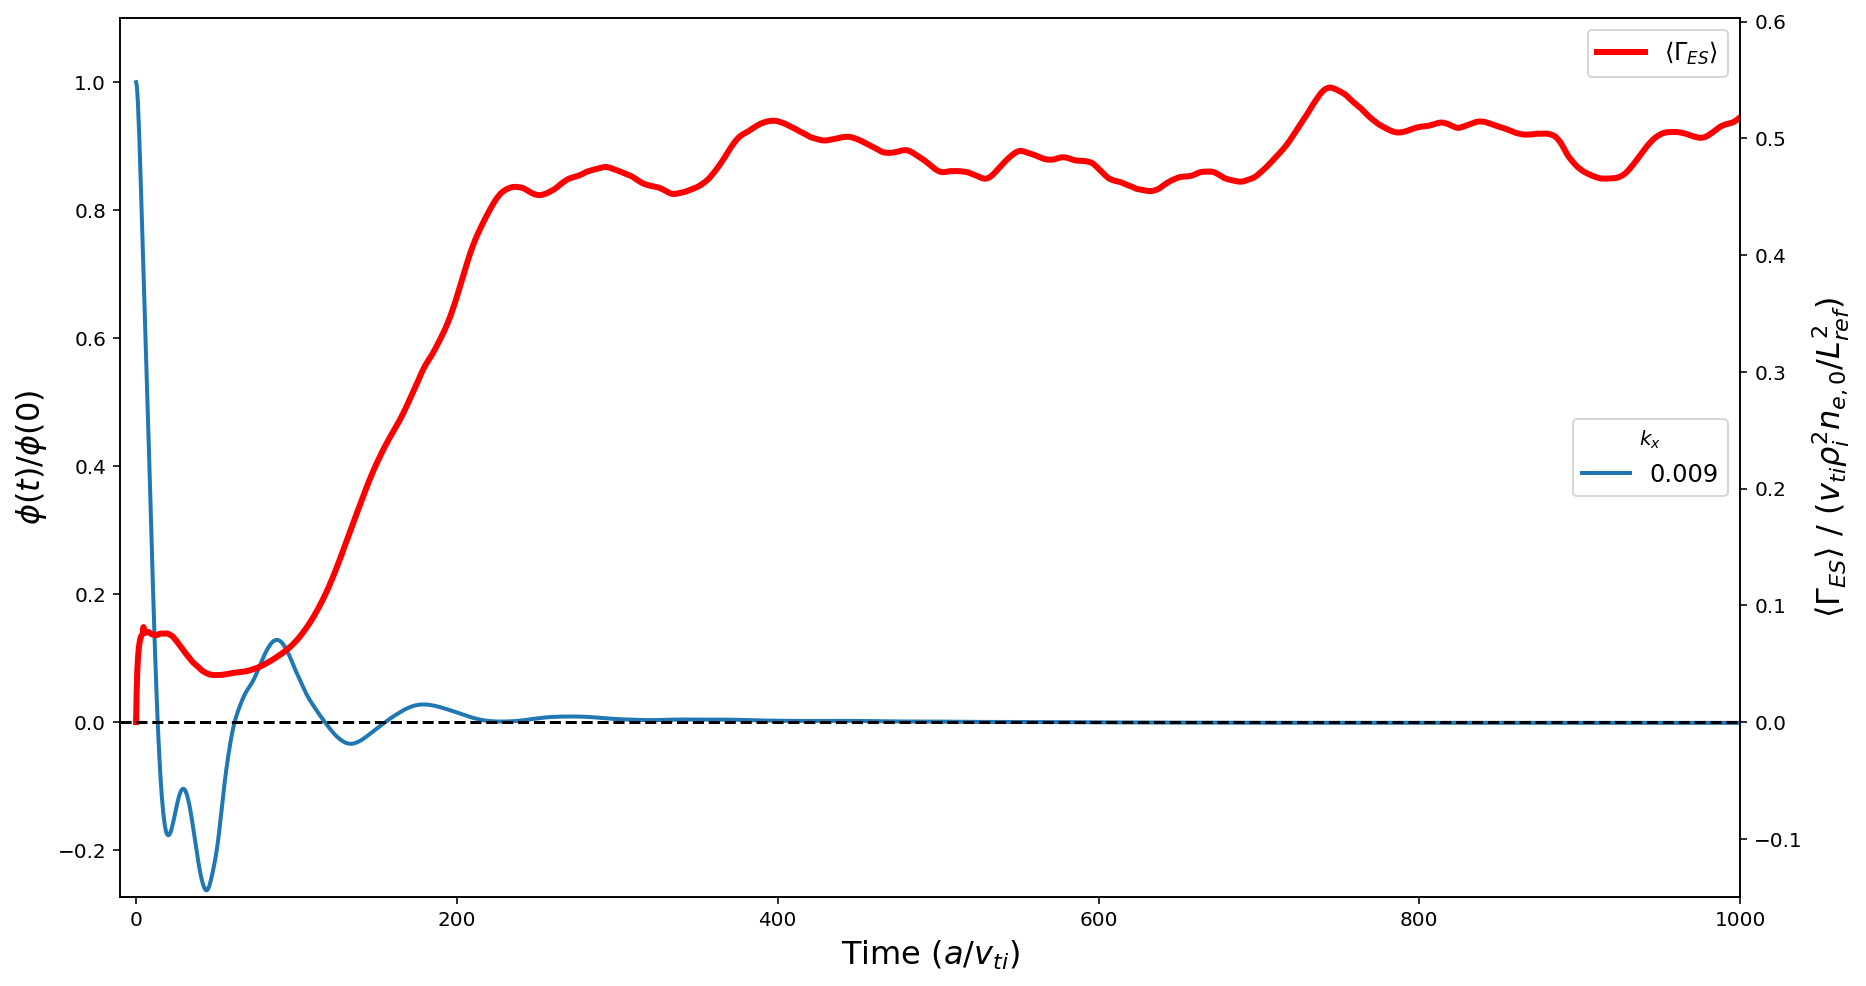

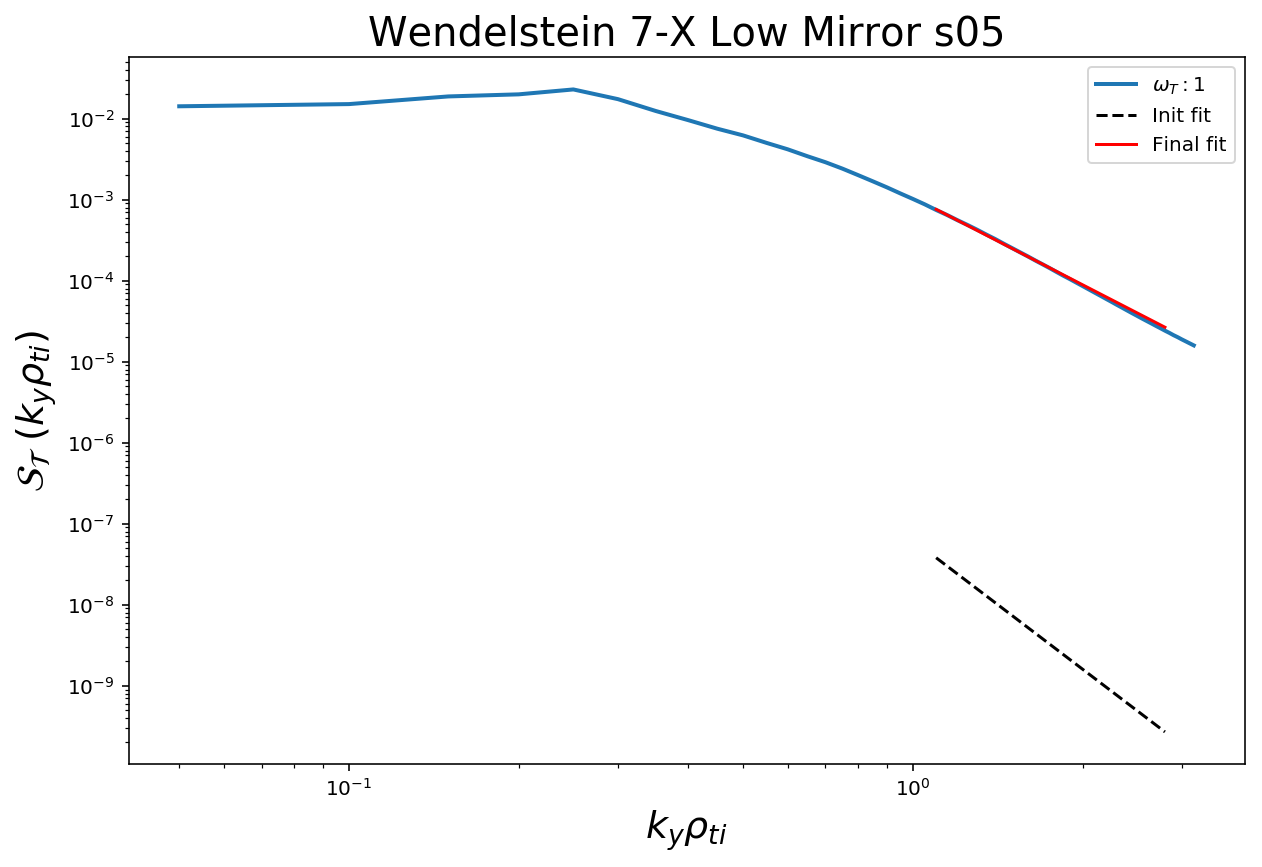

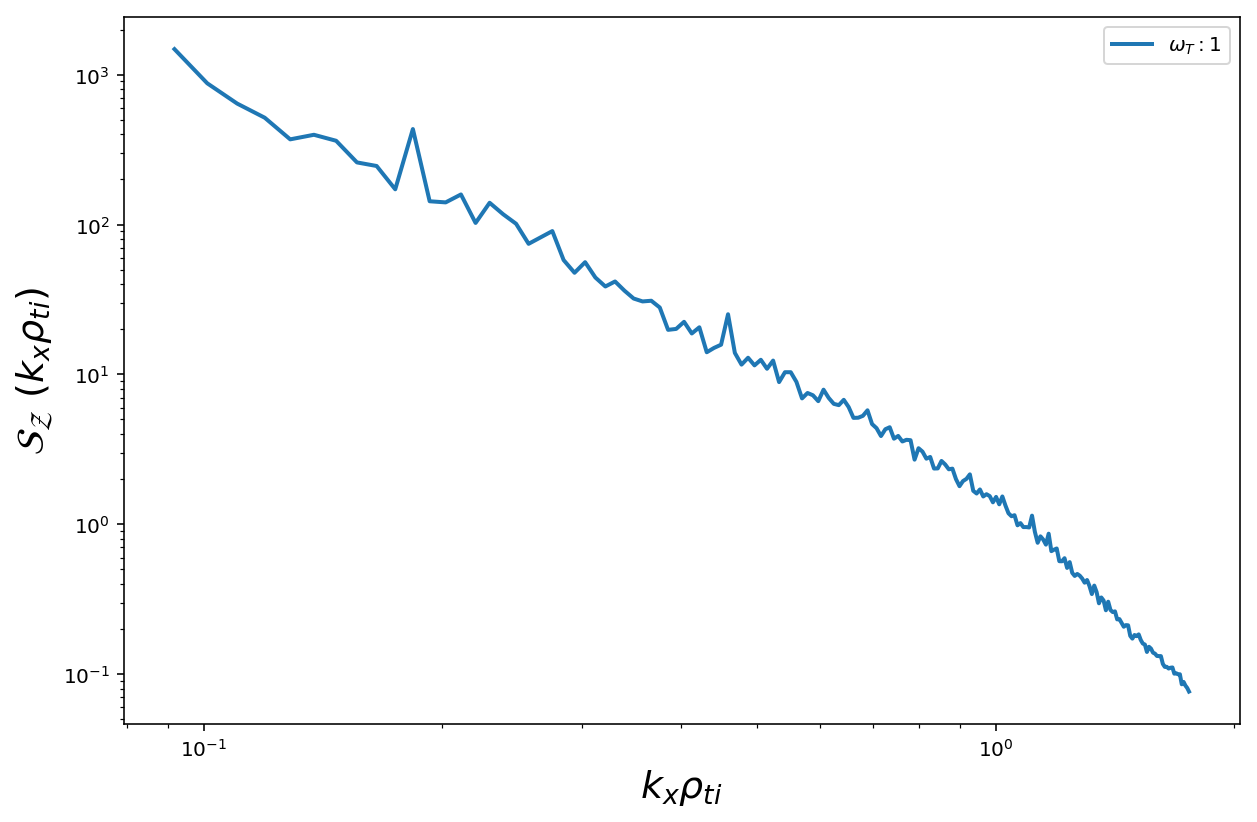

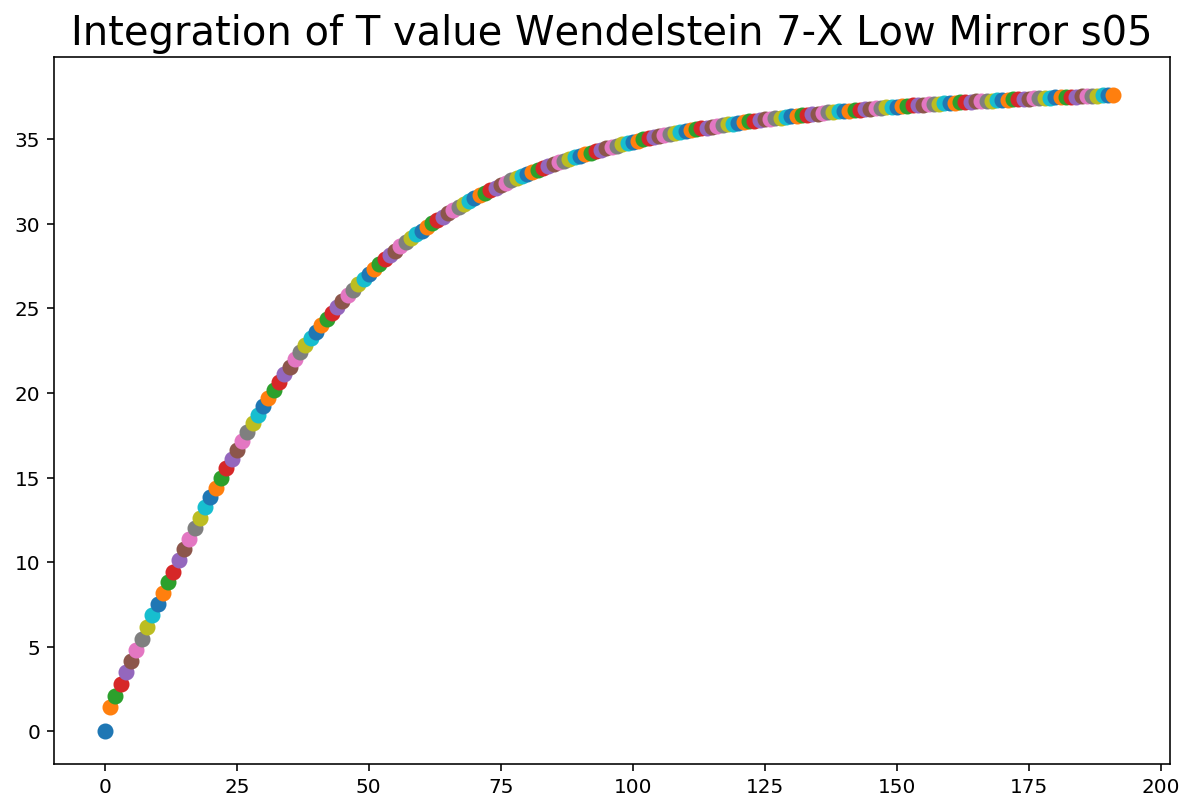

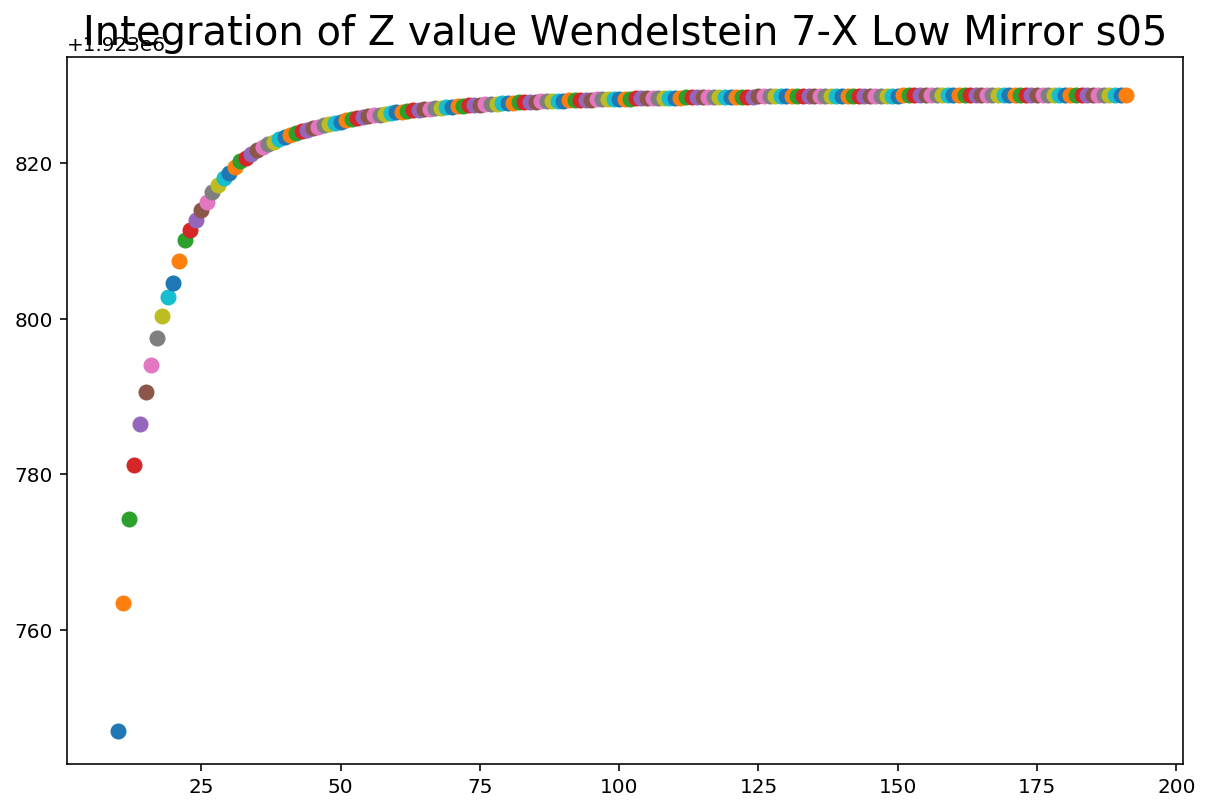

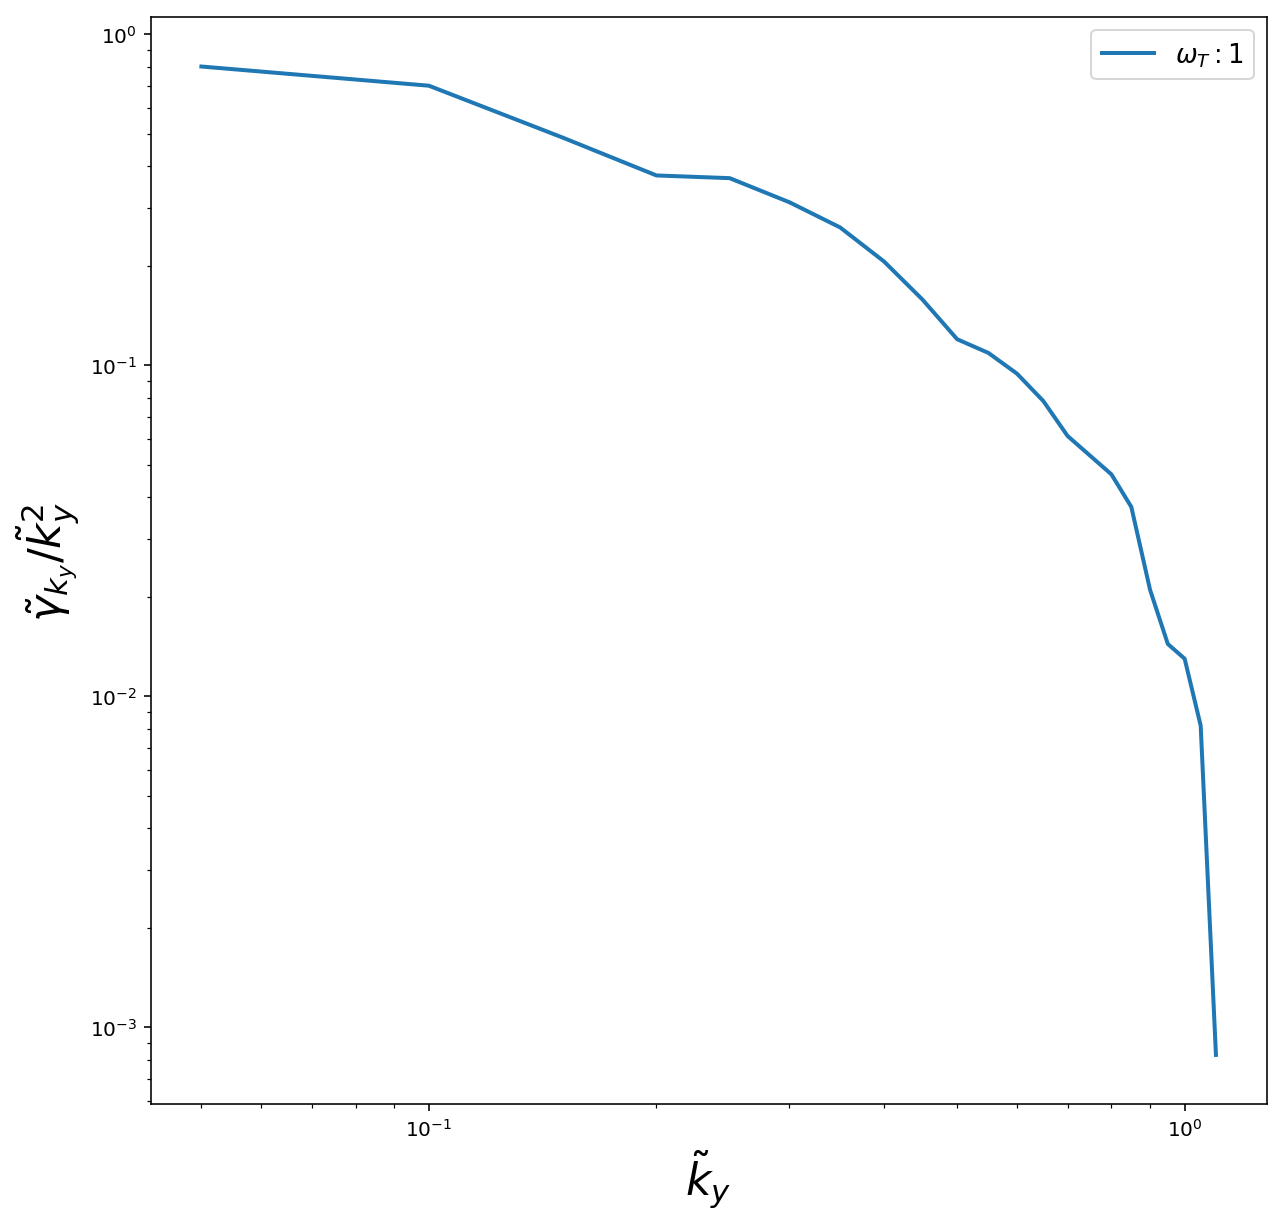

W7X Low Mirror s05
S_T slope   -1.557234188622239
T total:    37.61333323029998
T Nunami:   23.849954965833913
Z total:    65.36551413411075
Sum g/k^2:   4.3263259069498865
Tau_ZF:      4.883359656362184


In [6]:
##########################
# STee maker & file loader
# For Low Mirror s05
##########################

# Load data
w1 = [( pylab.loadtxt('./W7Xlms05/ITGa_NL/omt1/spectraions_act.dat',usecols = (0, 1)))][0]

nkx0 = 384
nky0 = 64
Lx = 684.184
kx_minimum = 0.0092
ky_minimum = 0.05

Lr_lm = 0.5250564  # Minor radius W7X sd s05
Ro_lm = 5.5305624  # Major radius W7X sd s05
Ts_lm = 2160        # Simulation temperature
TN_lm = 2160       # Model reference temperature
rhos_lm = 0.0067   # Simulation gyroradius
rhoN_lm = 0.0018   # Model reference gyroradius

q = np.int(nkx0/2)
factor_lm = ((Ts_lm*rhos_lm/Lr_lm)/(TN_lm*rhoN_lm/Ro_lm))**2
factor_lm_g = ((1/Lr_lm)/(1/Ro_lm))**2
factor_lm = factor_lm_g

top = q # The truncation limit

######################## Containers:
ky_lm = np.zeros((top, nky0))
phiw1 = np.zeros((top, nky0))
St_lm = np.zeros((nky0))
########################

# Extract ky and Phi for each omt
for n in range(0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_lm[n] = w1[lo:hi, 0]
    phiw1[n] = w1[lo:hi, 1]
    np.add(St_lm, phiw1[n]/2, out=St_lm, where=True)

kx_w7x, my_data_w7x, E, t, f_s, label = diag_w7x('W7Xlms05/GAM', maxlim=[1], plot=True, Lx=Lx, nkx0=nkx0)
hi = (nky0+(nky0*(q-1)))
kx_lm = w1[hi:(hi+top), 0]
Sz_lm = w1[hi:(hi+top), 1]*factor_lm/kx_minimum
idx = (np.abs(kx_lm - min_kx)).argmin()
kx_lm = kx_lm[idx:]
Sz_lm = Sz_lm[idx:]

Tzf = my_data_w7x[0, :]
OSrat = my_data_w7x[3, :]

tzf_w7xlms05 = Tzf[min(range(len(kx_w7x)), key=lambda i: abs(kx_w7x[i]-0.1))]


idx2 = (np.abs(ky_lm - minky)).argmin()
idx2f = idx2+35
Y = St_lm[idx2:idx2f]
X = ky_lm[1, idx2:idx2f]
pars = mod.make_params(intercept=-np.log(Y[0]), slope=-2.3)
out = mod.fit(Y, pars, x=X, nan_policy='propagate')
#print(out.fit_report(min_correl=0.25))

plt.figure(figsize=(10, 6.5))
plt.title("Wendelstein 7-X Low Mirror s05", fontsize=20)
plt.plot(ky_lm[1, 1:], St_lm[1:], linewidth=2)  # Printing: the truncated range with normalisation
plt.plot(X, out.init_fit, 'k--')
plt.plot(X, out.best_fit, 'r-')
plt.legend(['$\omega_{T}: 1$', 'Init fit', 'Final fit'], fontsize=10)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{y}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{T}} \ (k_{y} \\rho_{ti})$',fontsize=19)
#plt.savefig('w7x_st_plot.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.plot(kx_lm, Sz_lm, linewidth=2)
#plt.plot(kx_w7x, Tzf, linewidth=2)
#plt.plot(kx_w7x, OSrat, linewidth=2)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
plt.legend(['$\omega_{T}: 1$', '$\\tau_{ZF}$', 'Overshoot Ratio'], fontsize=10)
#plt.savefig('w7x_sz_plot.eps', format='eps', dpi=1200)
plt.show()

# Piece of code to verify the integrals values are correct up to the truncation
St_lm = np.zeros((nky0))
ky_lm = np.zeros((top, nky0))
phiw1 = np.zeros((top, nky0))

plt.figure(figsize=(10, 6.5))
plt.title("Integration of T value Wendelstein 7-X Low Mirror s05", fontsize=20)
for n in range (0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_lm[n] = w1[lo:hi, 0]
    phiw1[n] = w1[lo:hi, 1]
    # Complete range with normalisation:
    np.add(St_lm, phiw1[n]*factor_lm/ky_minimum, out=St_lm, where=True)
    te_omt1 = trapz(St_lm[1:], x=ky_lm[1, 1:])
    plt.scatter(n, te_omt1, linewidth=2)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.title("Integration of Z value Wendelstein 7-X Low Mirror s05", fontsize=20)
hi = (nky0+(nky0*(q-1)))
for top in range (idx, top):
    kz_w1 = w1[hi:(hi+top), 0]
    pz_w1 = w1[hi:(hi+top), 1]*factor_lm/kx_minimum
    z_omt1 = trapz(pz_w1, x=kz_w1)
    plt.scatter(top, z_omt1, linewidth=2)
plt.show()

####### Load Linear simulations growth rates #######
dataset1 = [('./W7Xlms05/ITGa_l/omt1.dat')]
datalist_1 = [ ( pylab.loadtxt(datapath,usecols = (0, 2, 4, 5))) for datapath in dataset1]
datalist_1 = datalist_1[0]
ky_min1 = datalist_1[:, 1]
gamma1 = datalist_1[:, 2]
omega1 = datalist_1[:, 3]

lo = 0
hi = len(ky_min1)

k1 = ky_min1[lo:hi]
g1 = gamma1[lo:hi]

plt.figure(figsize=(10, 10))
plt.plot(k1, g1/(k1**2), linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(['$\omega_{T}: 1$'], fontsize=13)
plt.xlabel('$\\tilde{k}_{y}$',fontsize=22)
plt.ylabel('$\\tilde{\gamma}_{k_{y}} / \\tilde{k}^{2}_{y}$',fontsize=22)
plt.show()

appT_w7xlms05omt1 = np.nansum(g1/(k1**2))
te_w7xlms05omt1 = trapz(St_lm[1:], x=ky_lm[1, 1:])
idx = (np.abs(ky_lm[1, :] - 0.07)).argmin()  # Truncate the integrals taking Nunami's range
idx2 = (np.abs(ky_lm[1, :] - 0.4)).argmin()
teN_w7xlms05omt1 = trapz(St_lm[idx:idx2], x=ky_lm[1, idx:idx2])
zet_w7xlms05omt1 = trapz(Sz_lm, x=kx_lm)
slope_w7xlms05omt1, intercept = out.best_values.values()

#print(ky_lm[1, 1:9])

print('W7X Low Mirror s05')
print('S_T slope  ', slope_w7xlms05omt1)
print('T total:   ', te_w7xlms05omt1)
print('T Nunami:  ', teN_w7xlms05omt1)
print('Z total:   ', zet_w7xlms05omt1)
print('Sum g/k^2:  ', appT_w7xlms05omt1)
print('Tau_ZF:     ', tzf_w7xlms05)

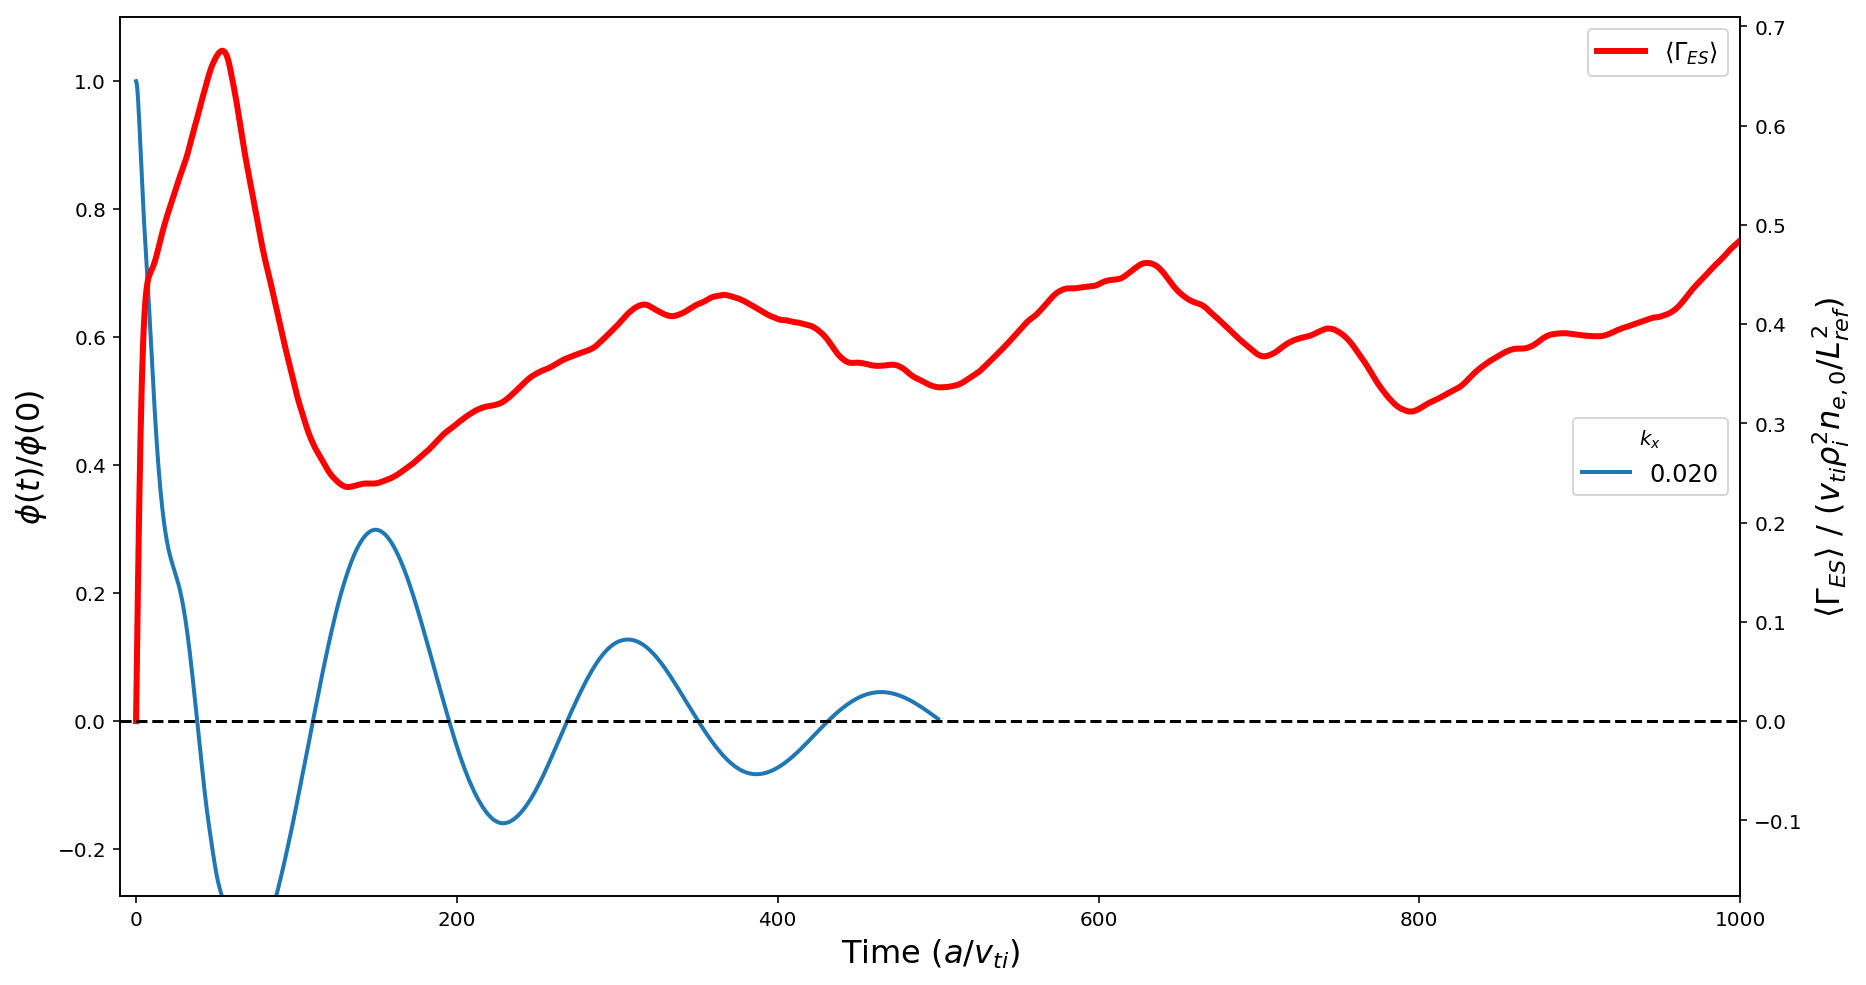

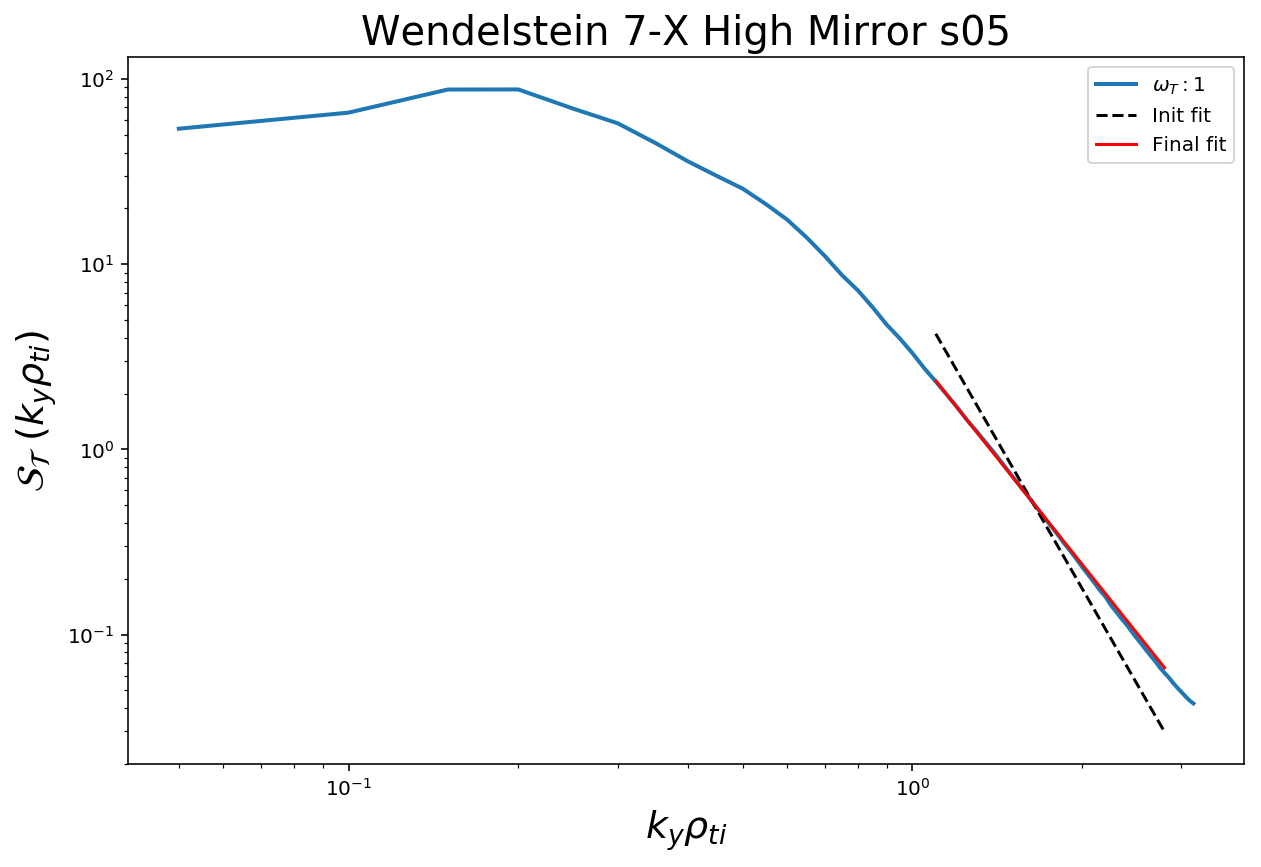

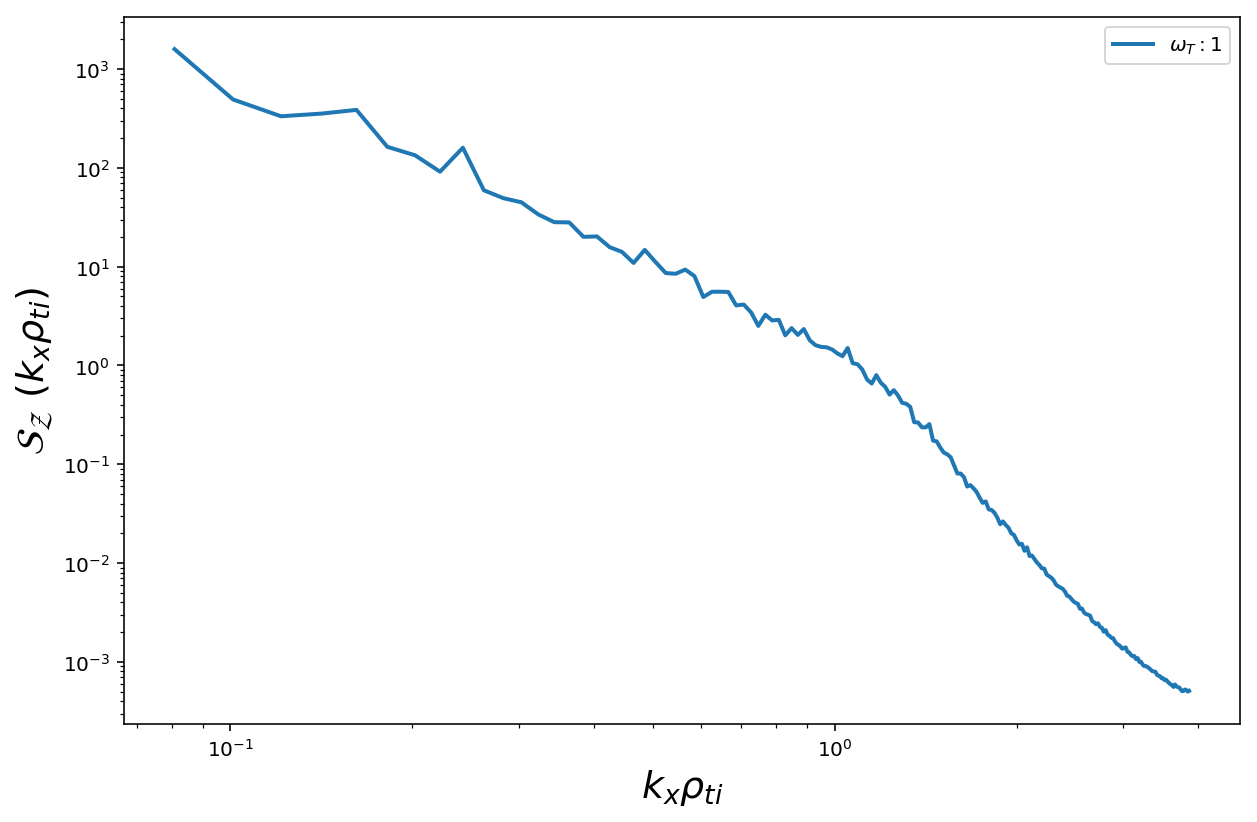

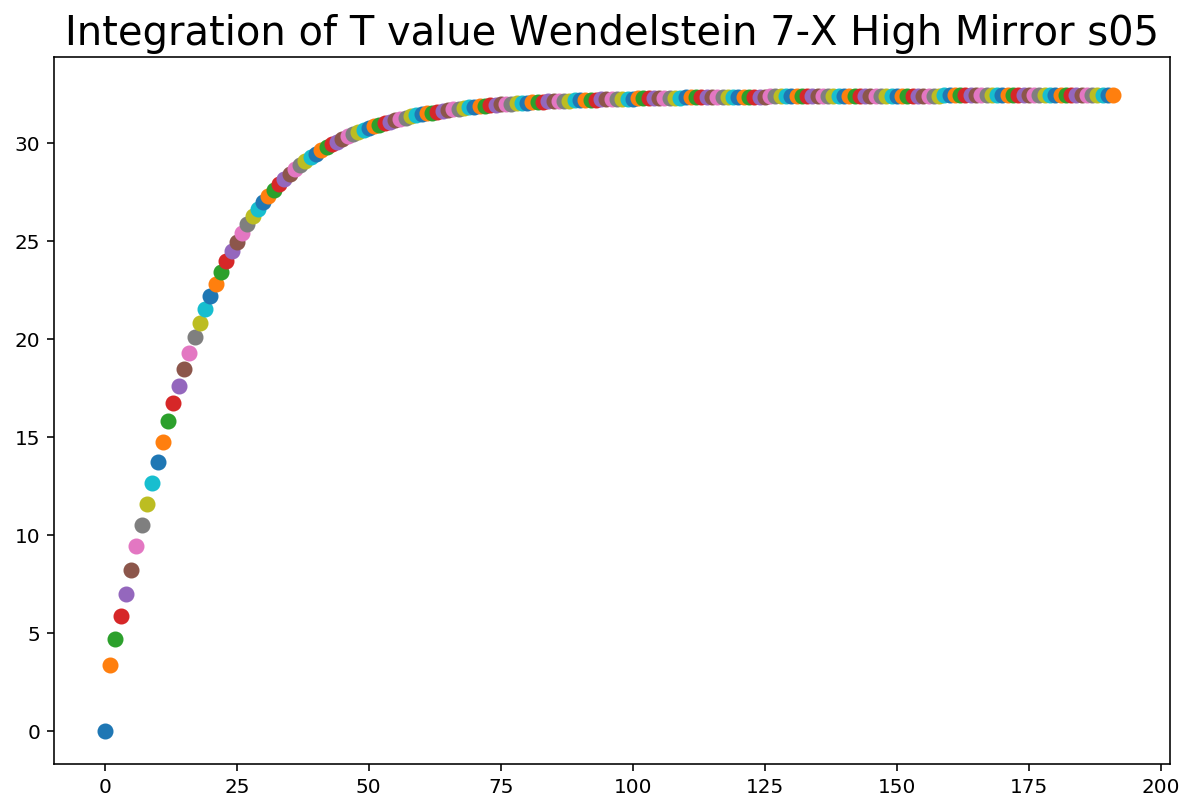

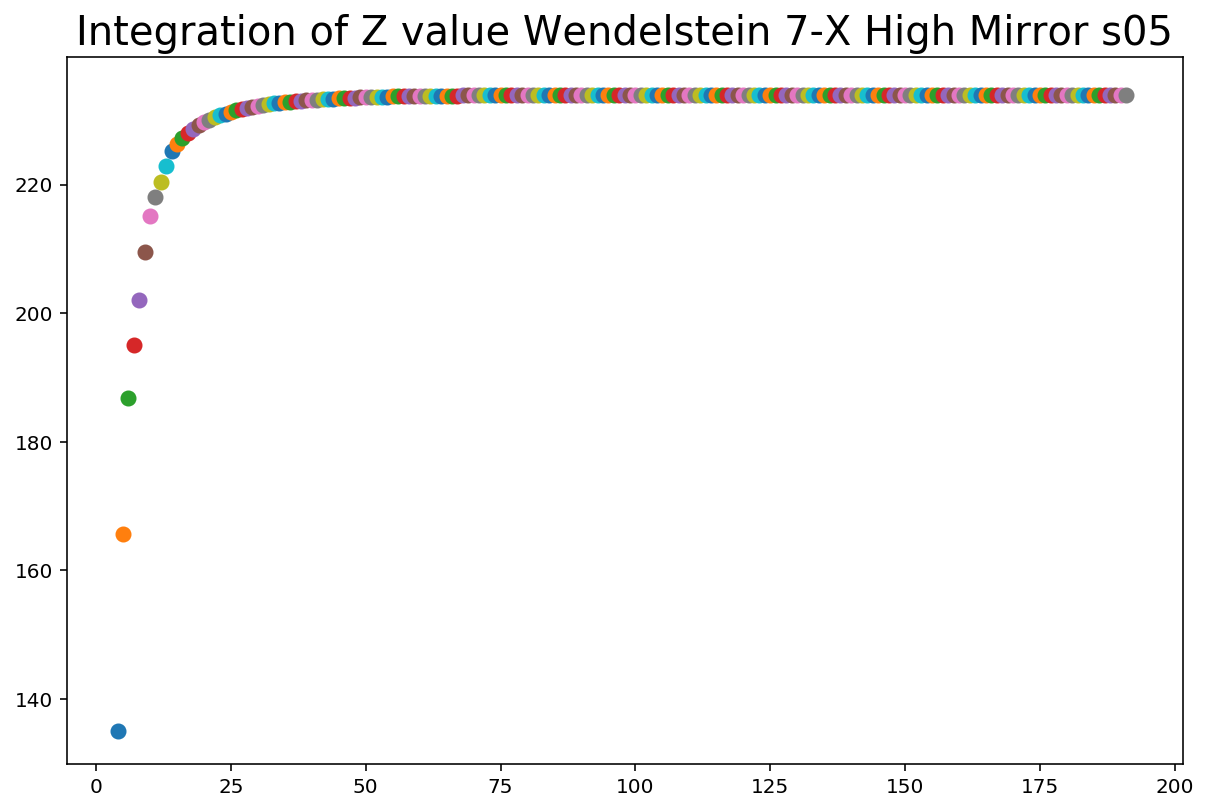

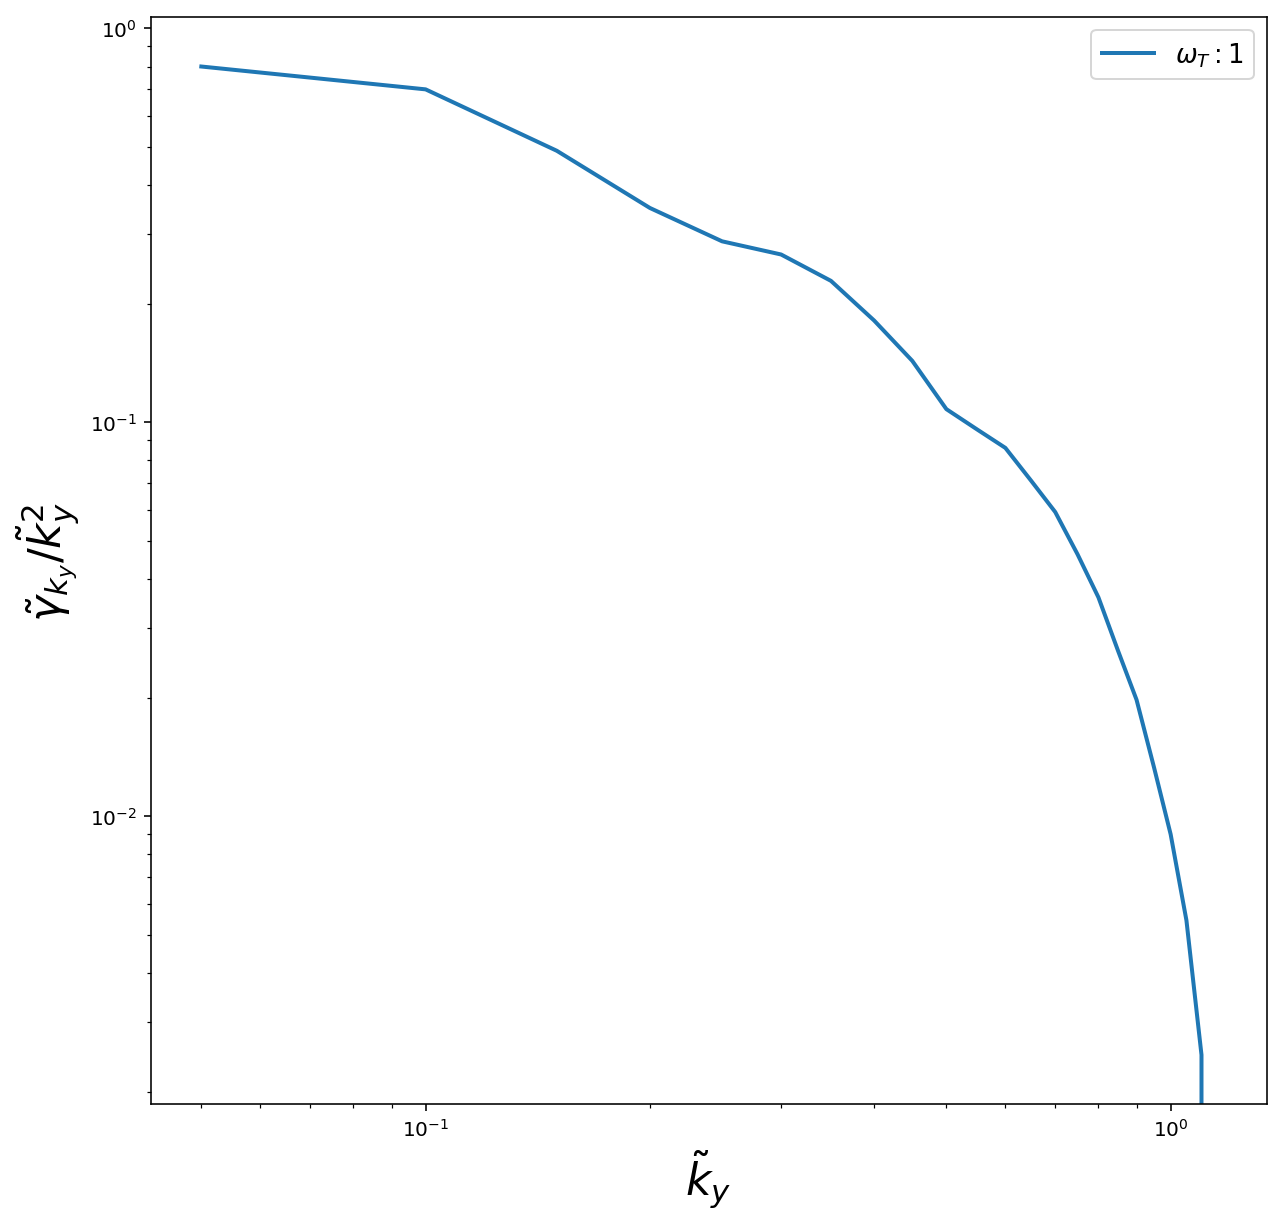

W7X High Mirror s05
S_T slope   -1.658021948429426
T total:    32.43538577069896
T Nunami:   20.838637937913546
Z total:    68.18700607777106
Sum g/k^2:   4.025183632107834
Tau_ZF:      9.149118236382124


In [7]:
##########################
# STee maker & file loader
# For High Mirror s05
##########################

# Load data
w1 = [( pylab.loadtxt('./W7Xhms05/ITGa_NL/omt1/spectraions_act.dat',usecols = (0, 1)))][0]

nkx0 = 384
nky0 = 64 
Lx = 310.957
kx_minimum = 0.0202
ky_minimum = 0.05

Lr_hm = 0.5211343  # Minor radius W7X sd s05
Ro_hm = 5.4832239  # Major radius W7X sd s05
Ts_hm = 350        # Simulation temperature
TN_hm = 2160       # Model reference temperature
rhos_hm = 0.0027   # Simulation gyroradius
rhoN_hm = 0.0018   # Model reference gyroradius

q = np.int(nkx0/2)
factor_hm = ((Ts_hm*rhos_hm/Lr_hm)/(TN_hm*rhoN_hm/Ro_hm))**2
factor_hm_g = ((1/Lr_hm)/(1/Ro_hm))**2
factor_hm = factor_hm_g

top = q # The truncation limit

######################## Containers:
ky_hm = np.zeros((top, nky0))
phiw1 = np.zeros((top, nky0))
St_hm = np.zeros((nky0))
########################

# Extract ky and Phi for each omt
for n in range(0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_hm[n] = w1[lo:hi, 0]
    phiw1[n] = w1[lo:hi, 1]
    np.add(St_hm, phiw1[n]*factor_hm/ky_minimum, out=St_hm, where=True)

kx_w7x, my_data_w7x, E, t, f_s, label = diag_w7x('W7Xhms05/GAM', maxlim=[1], plot=True, Lx=Lx, nkx0=nkx0)
hi = (nky0+(nky0*(q-1)))
kx_hm = w1[hi:(hi+top), 0]
Sz_hm = w1[hi:(hi+top), 1]*factor_hm/kx_minimum
idx = (np.abs(kx_hm - min_kx)).argmin()
kx_hm = kx_hm[idx:]
Sz_hm = Sz_hm[idx:]

Tzf = my_data_w7x[0, :]
OSrat = my_data_w7x[3, :]

tzf_w7xhms05 = Tzf[min(range(len(kx_w7x)), key=lambda i: abs(kx_w7x[i]-0.1))]

idx2 = (np.abs(ky_hm - minky)).argmin()
idx2f = idx2+35
Y = St_hm[idx2:idx2f]
X = ky_hm[1, idx2:idx2f]
pars = mod.make_params(intercept=-np.log(Y[0]), slope=-2.3)
out = mod.fit(Y, pars, x=X, nan_policy='propagate')
#print(out.fit_report(min_correl=0.25))

plt.figure(figsize=(10, 6.5))
plt.title("Wendelstein 7-X High Mirror s05", fontsize=20)
plt.plot(ky_hm[1, 1:], St_hm[1:], linewidth=2)  # Printing: the truncated range with normalisation
plt.plot(X, out.init_fit, 'k--')
plt.plot(X, out.best_fit, 'r-')
plt.legend(['$\omega_{T}: 1$', 'Init fit', 'Final fit'], fontsize=10)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{y}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{T}} \ (k_{y} \\rho_{ti})$',fontsize=19)
#plt.savefig('w7x_st_plot.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.plot(kx_hm, Sz_hm, linewidth=2)
#plt.plot(kx_w7x, Tzf, linewidth=2)
#plt.plot(kx_w7x, OSrat, linewidth=2)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
plt.legend(['$\omega_{T}: 1$', '$\\tau_{ZF}$', 'Overshoot Ratio'], fontsize=10)
#plt.savefig('w7x_sz_plot.eps', format='eps', dpi=1200)
plt.show()

# Piece of code to verify the integrals values are correct up to the truncation
St_hm = np.zeros((nky0))
ky_hm = np.zeros((top, nky0))
phiw1 = np.zeros((top, nky0))

plt.figure(figsize=(10, 6.5))
plt.title("Integration of T value Wendelstein 7-X High Mirror s05", fontsize=20)
for n in range (0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_hm[n] = w1[lo:hi, 0]
    phiw1[n] = w1[lo:hi, 1]
    # Complete range with normalisation:
    np.add(St_hm, phiw1[n]*factor_hm/ky_minimum, out=St_hm, where=True)
    te_omt1 = trapz(St_hm[1:], x=ky_hm[1, 1:])
    plt.scatter(n, te_omt1, linewidth=2)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.title("Integration of Z value Wendelstein 7-X High Mirror s05", fontsize=20)
hi = (nky0+(nky0*(q-1)))
for top in range (idx, top):
    kz_w1 = w1[hi:(hi+top), 0]
    pz_w1 = w1[hi:(hi+top), 1]*factor_hm/kx_minimum

    z_omt1 = trapz(pz_w1, x=kz_w1)
    
    plt.scatter(top, z_omt1, linewidth=2)
plt.show()

####### Load Linear simulations growth rates #######
dataset1 = [('./W7Xhms05/ITGa_l/omt1.dat')]
datalist_1 = [ ( pylab.loadtxt(datapath,usecols = (0, 2, 4, 5))) for datapath in dataset1]
datalist_1 = datalist_1[0]
ky_min1 = datalist_1[:, 1]
gamma1 = datalist_1[:, 2]
omega1 = datalist_1[:, 3]

lo = 0
hi = len(ky_min1)

k1 = ky_min1[lo:hi]
g1 = gamma1[lo:hi]

#plt.figure(figsize=(15, 5))
#pylab.title("Wendelstein 7-X High Mirror s05", fontsize=20)
#plt.plot(k1, g1)
#pylab.xlabel('$\\tilde{k}_{y}$',fontsize=19)
#pylab.ylabel('$\\tilde{\gamma}$',fontsize=19)
#plt.legend(['$\omega_{T}: 1$'], fontsize=13)
#plt.show()

plt.figure(figsize=(10, 10))
plt.plot(k1, g1/(k1**2), linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(['$\omega_{T}: 1$'], fontsize=13)
plt.xlabel('$\\tilde{k}_{y}$',fontsize=22)
plt.ylabel('$\\tilde{\gamma}_{k_{y}} / \\tilde{k}^{2}_{y}$',fontsize=22)
plt.show()

appT_w7xhms05omt1 = np.nansum(g1/(k1**2))
te_w7xhms05omt1 = trapz(St_hm[1:], x=ky_hm[1, 1:])
idx = (np.abs(ky_hm[1, :] - 0.07)).argmin()  # Truncate the integrals taking Nunami's range
idx2 = (np.abs(ky_hm[1, :] - 0.4)).argmin()
teN_w7xhms05omt1 = trapz(St_hm[idx:idx2], x=ky_hm[1, idx:idx2])
zet_w7xhms05omt1 = trapz(Sz_hm, x=kx_hm)
slope_w7xhms05omt1, intercept = out.best_values.values()

#print(ky_hm[1, 1:9])

print('W7X High Mirror s05')
print('S_T slope  ', slope_w7xhms05omt1)
print('T total:   ', te_w7xhms05omt1)
print('T Nunami:  ', teN_w7xhms05omt1)
print('Z total:   ', zet_w7xhms05omt1)
print('Sum g/k^2:  ', appT_w7xhms05omt1)
print('Tau_ZF:     ', tzf_w7xhms05)

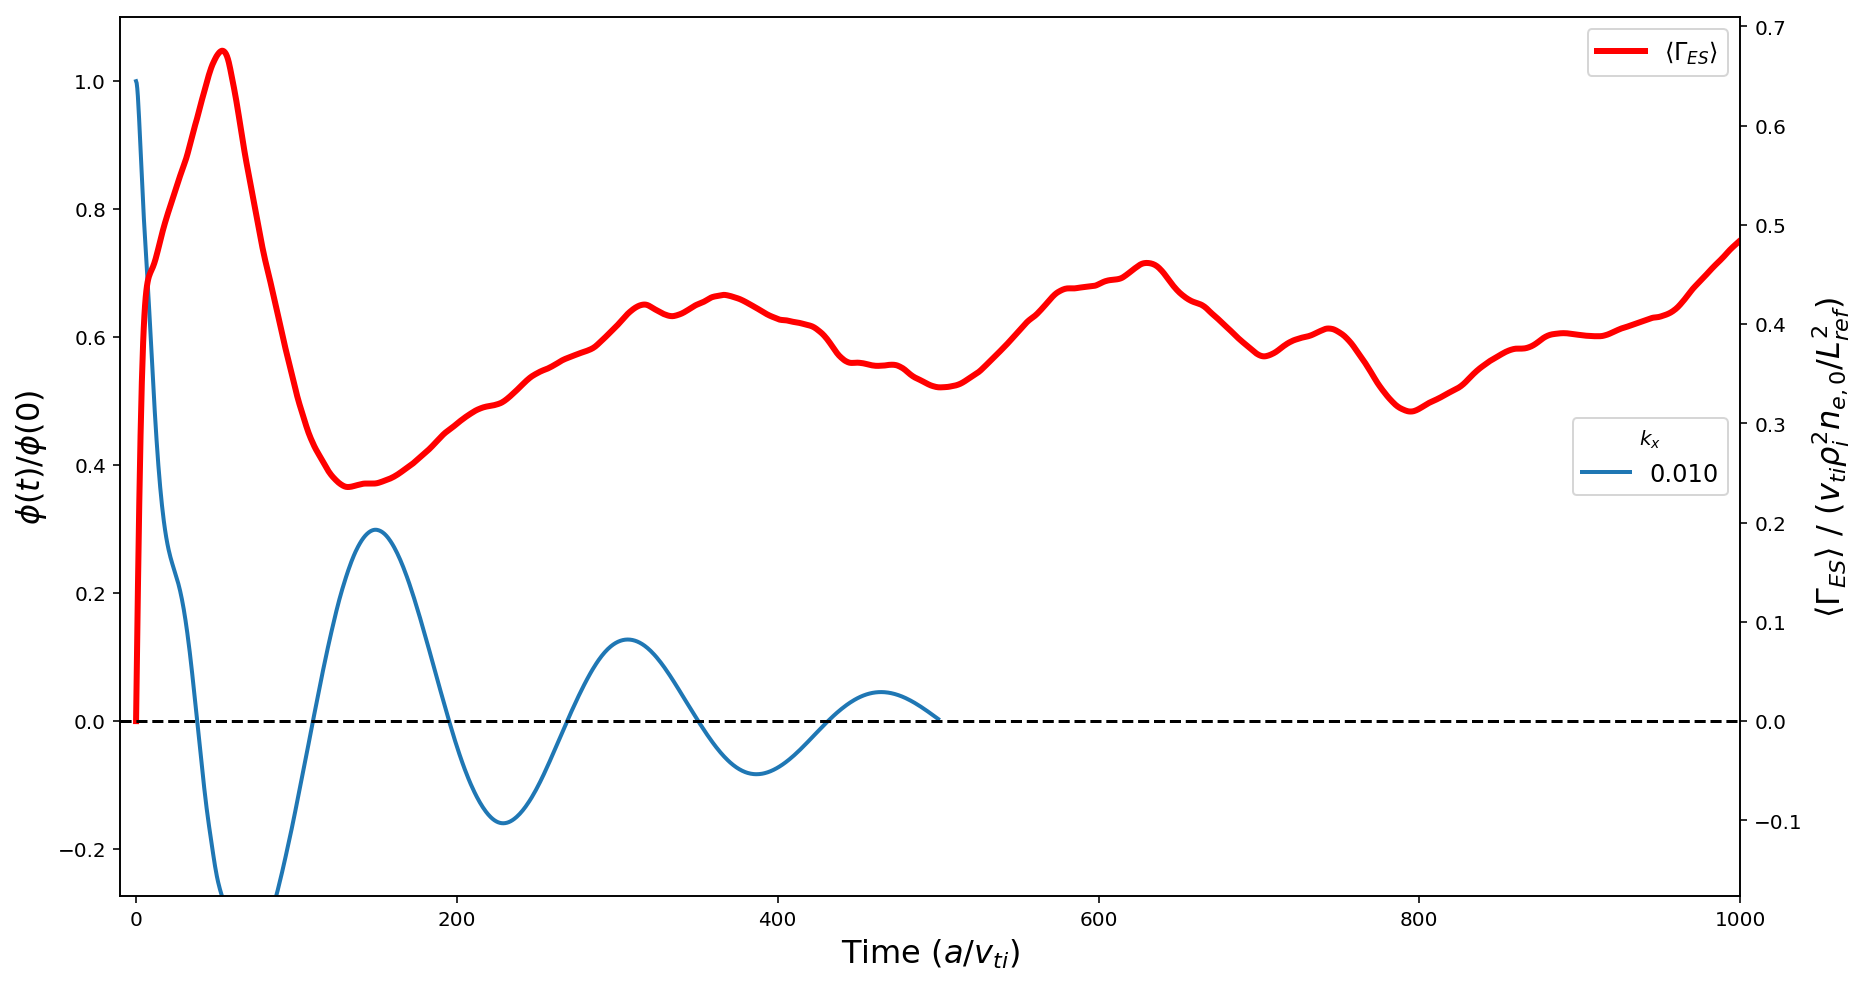

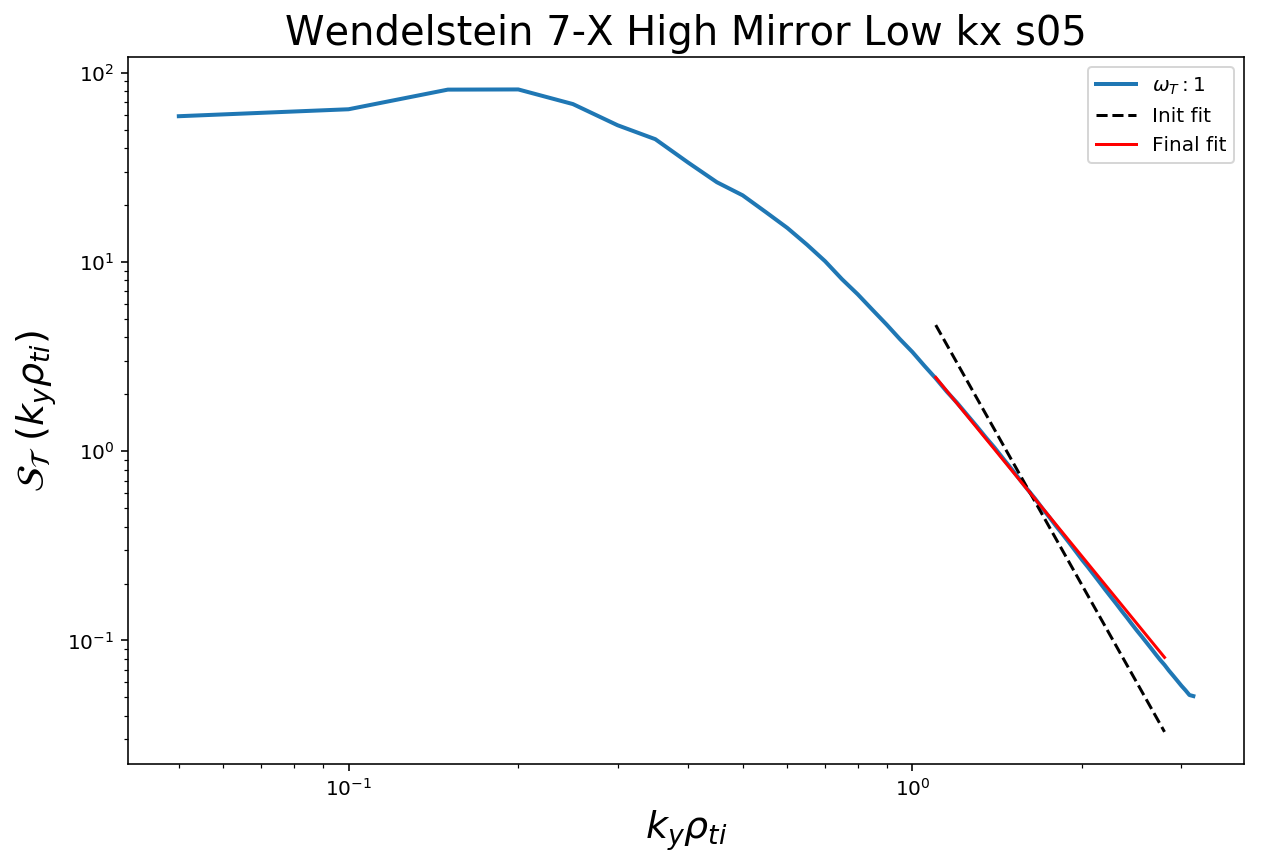

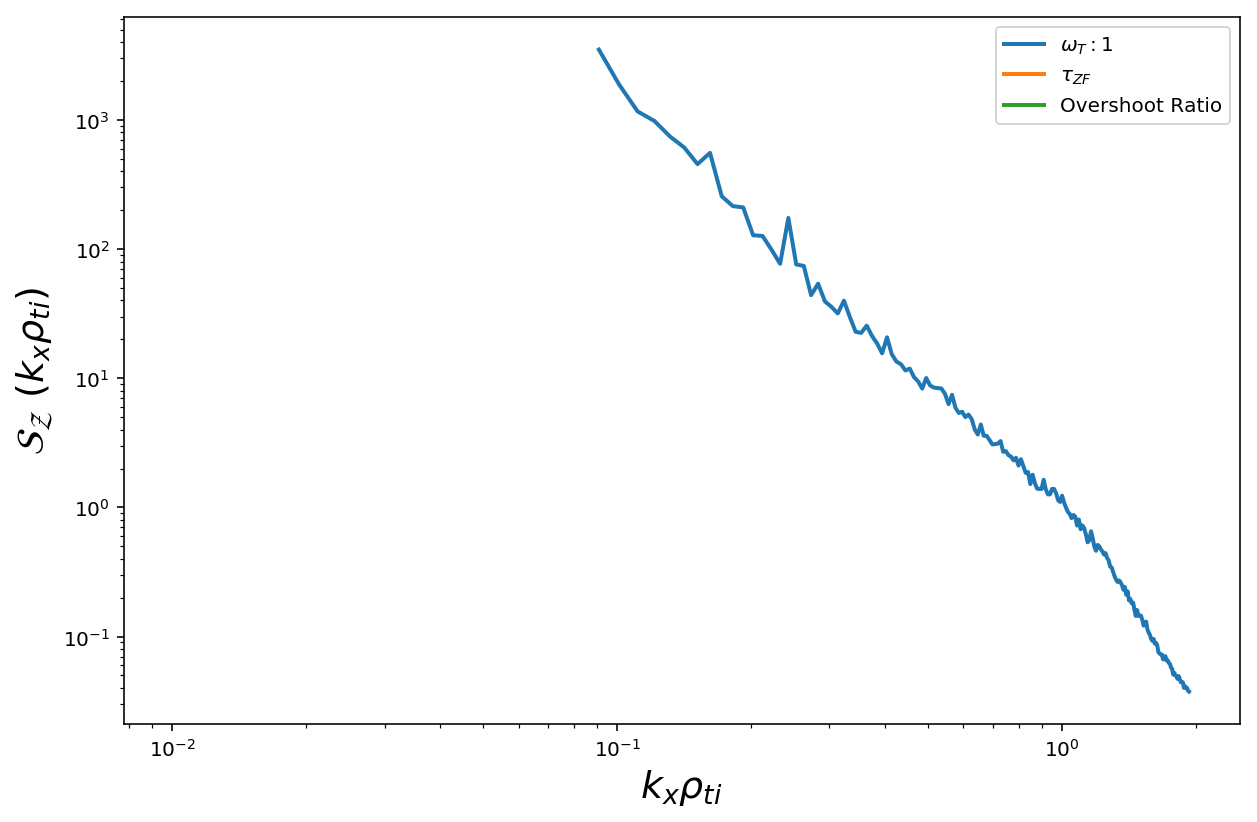

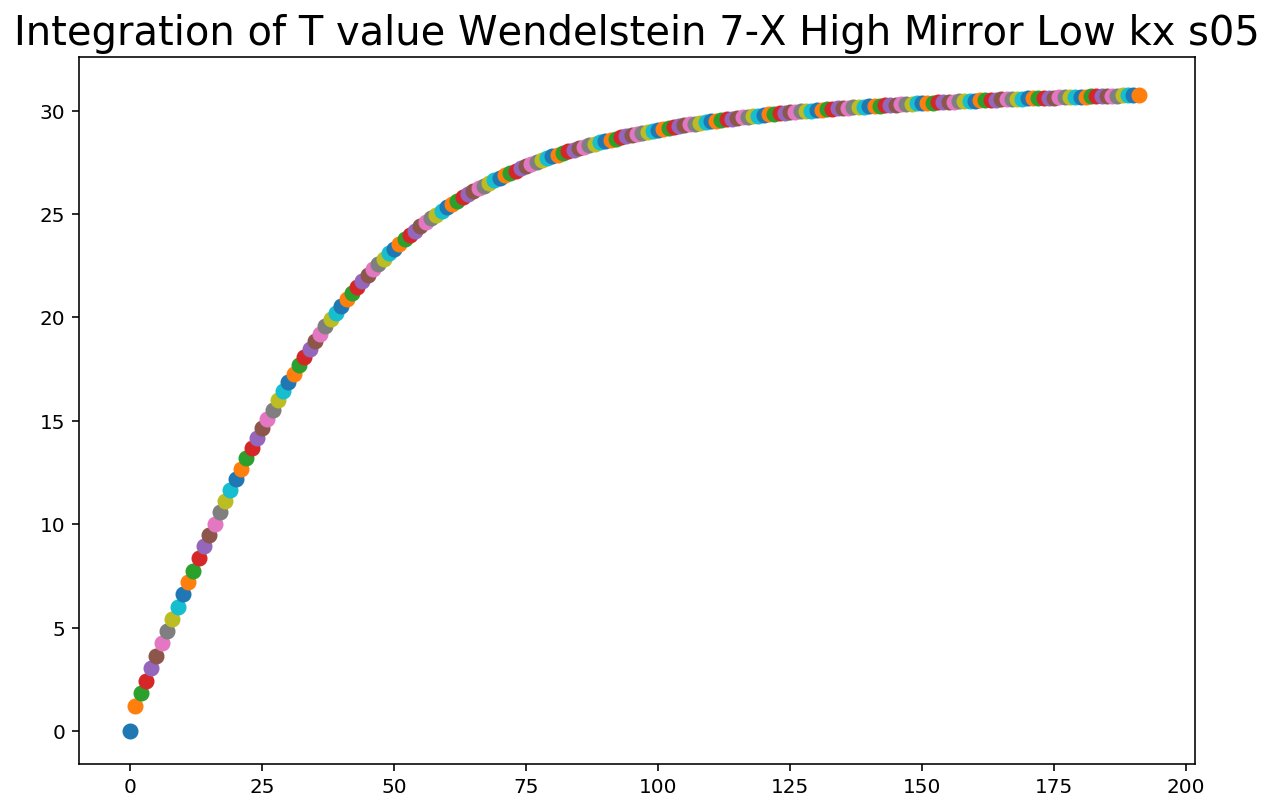

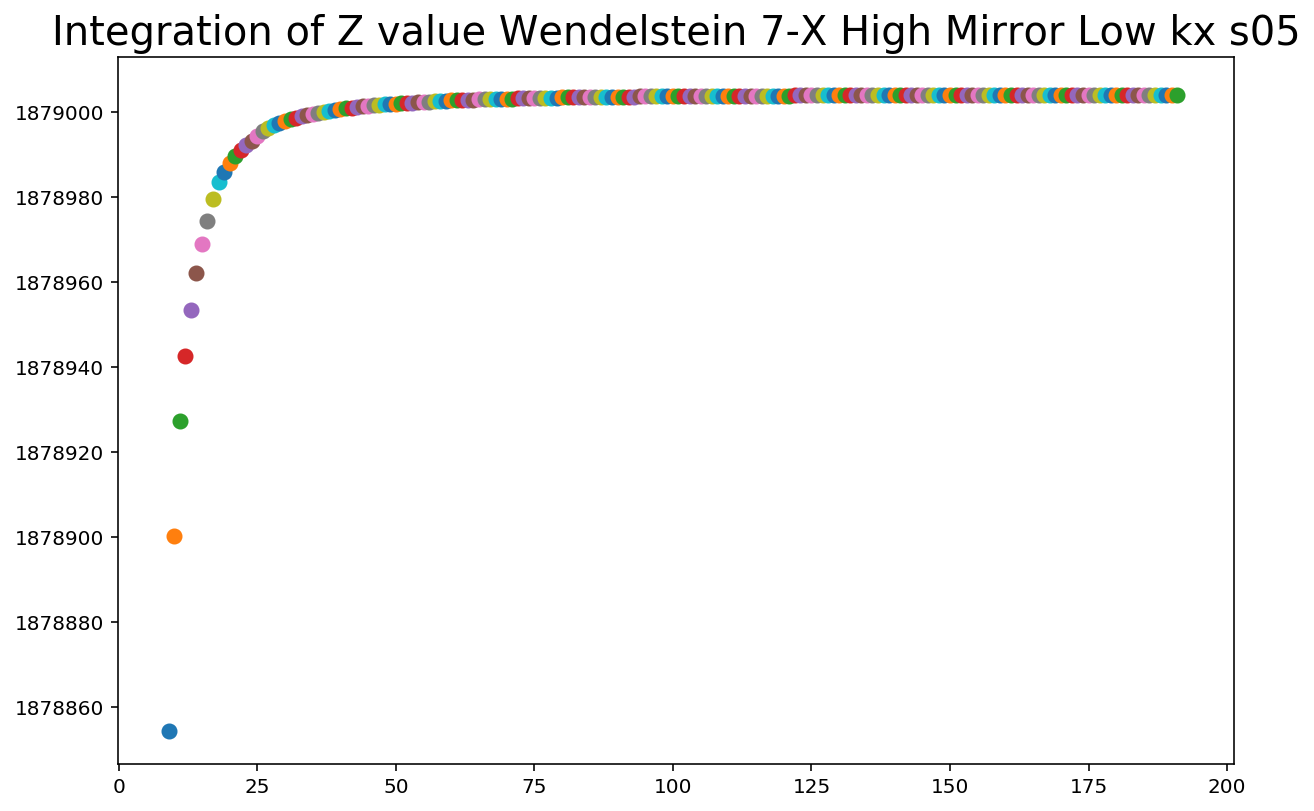

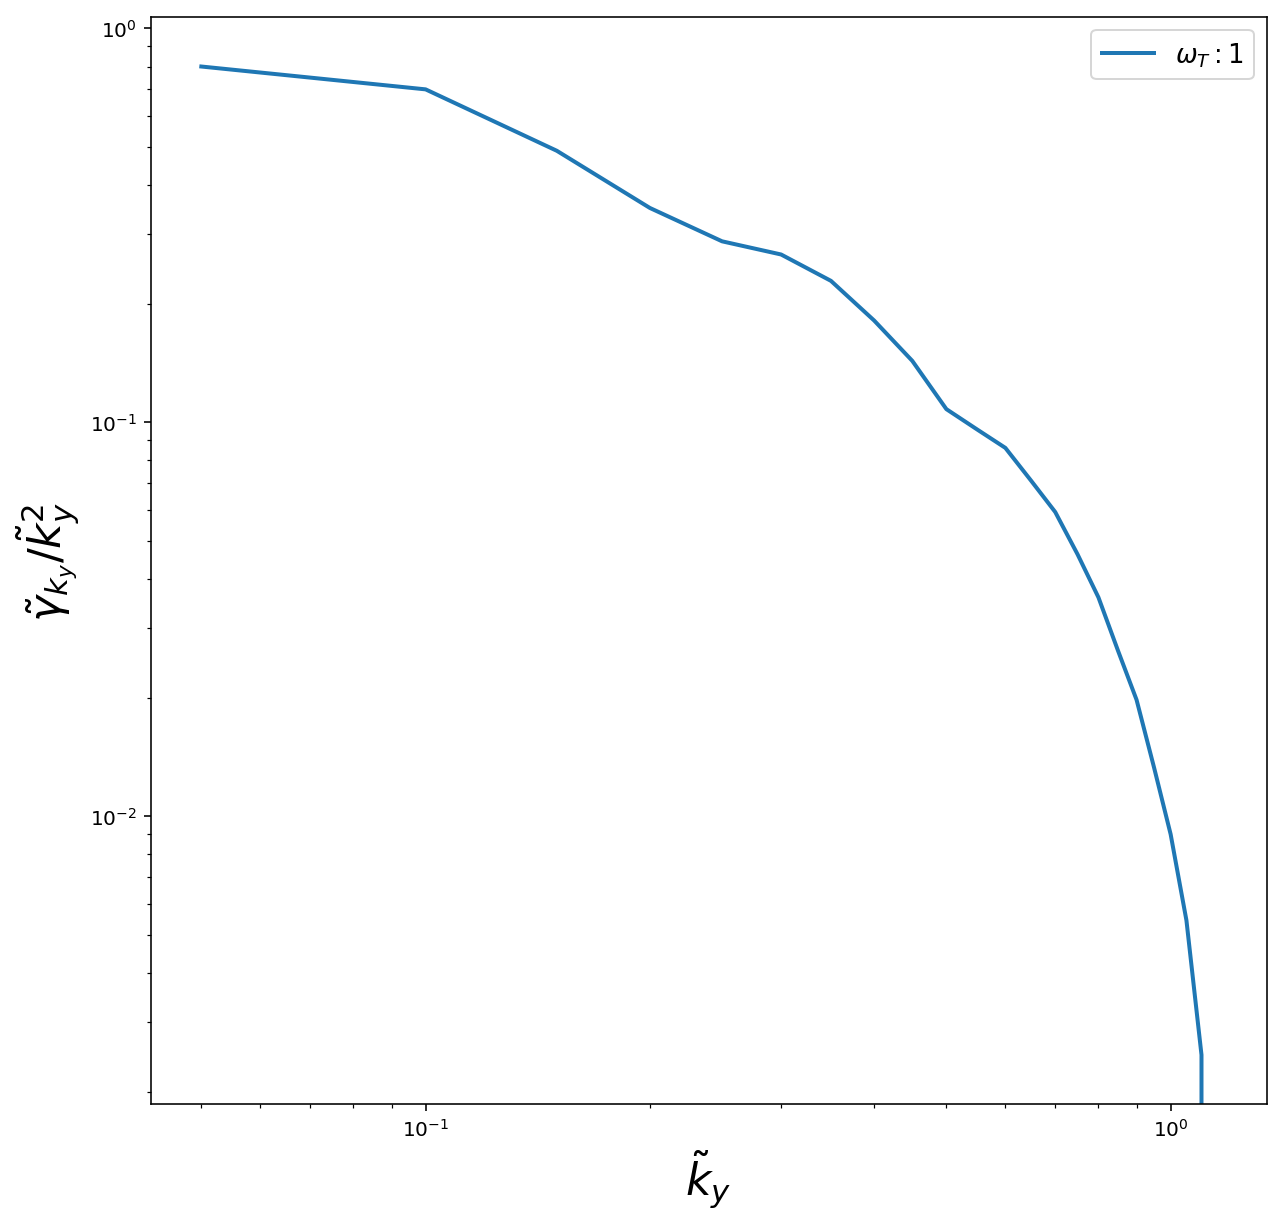

W7X High Mirror low kx s05
S_T slope   -1.583112566109203
T total:    30.7506014380044
T Nunami:   19.961462742640673
Z total:    103.90193217265725
Sum g/k^2:   4.025183632107834
Tau_ZF:      9.149118236382124


In [8]:
##########################
# STee maker & file loader
# For High Mirror Low kx s05
##########################

# Load data
w1 = [( pylab.loadtxt('./W7Xhms05/ITGa_NL/scanomn0omt1_neu/spectraions_act.dat',usecols = (0, 1)))][0]

nkx0 = 384
nky0 = 64 
Lx = 621.914
kx_minimum = 0.0101
ky_minimum = 0.05

Lr_hm_lkx = 0.5211343  # Minor radius W7X sd s05
Ro_hm_lkx = 5.4832239  # Major radius W7X sd s05
Ts_hm_lkx = 350        # Simulation temperature
TN_hm_lkx = 2160       # Model reference temperature
rhos_hm_lkx = 0.0027   # Simulation gyroradius
rhoN_hm_lkx = 0.0018   # Model reference gyroradius

q = np.int(nkx0/2)
factor_hm_lkx = ((Ts_hm_lkx*rhos_hm_lkx/Lr_hm_lkx)/(TN_hm_lkx*rhoN_hm_lkx/Ro_hm_lkx))**2
factor_hm_lkx_g = ((1/Lr_hm_lkx)/(1/Ro_hm_lkx))**2
factor_hm_lkx = factor_hm_lkx_g

top = q # The truncation limit

######################## Containers:
ky_hm_lkx = np.zeros((top, nky0))
phiw1 = np.zeros((top, nky0))
St_hm_lkx = np.zeros((nky0))
########################

# Extract ky and Phi for each omt
for n in range(0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_hm_lkx[n] = w1[lo:hi, 0]
    phiw1[n] = w1[lo:hi, 1]
    np.add(St_hm_lkx, phiw1[n]*factor_hm_lkx/ky_minimum, out=St_hm_lkx, where=True)

kx_zf_hm, my_data_w7x, E, t, f_s, label = diag_w7x('W7Xhms05/GAM', maxlim=[1], plot=True, Lx=Lx, nkx0=nkx0)

hi = (nky0+(nky0*(q-1)))
kx_hm_lkx = w1[hi:(hi+top), 0]
Sz_hm_lkx = w1[hi:(hi+top), 1]*factor_hm_lkx/kx_minimum
idx = (np.abs(kx_hm_lkx - min_kx)).argmin()
kx_hm_lkx = kx_hm_lkx[idx:]
Sz_hm_lkx = Sz_hm_lkx[idx:]

Tzf = my_data_w7x[0, :]
OSrat = my_data_w7x[3, :]

tzf_w7xhms05_lkx = Tzf[min(range(len(kx_zf_hm)), key=lambda i: abs(kx_zf_hm[i]-0.1))]

idx2 = (np.abs(ky_hm_lkx - minky)).argmin()
idx2f = idx2+35
Y = St_hm_lkx[idx2:idx2f]
X = ky_hm_lkx[1, idx2:idx2f]
pars = mod.make_params(intercept=-np.log(Y[0]), slope=-2.3)  #############################################################
out = mod.fit(Y, pars, x=X, nan_policy='propagate')
#print(out.fit_report(min_correl=0.25))

plt.figure(figsize=(10, 6.5))
plt.title("Wendelstein 7-X High Mirror Low kx s05", fontsize=20)
plt.plot(ky_hm_lkx[1, 1:], St_hm_lkx[1:], linewidth=2)  # Printing: the truncated range with normalisation
plt.plot(X, out.init_fit, 'k--')
plt.plot(X, out.best_fit, 'r-')
plt.legend(['$\omega_{T}: 1$', 'Init fit', 'Final fit'], fontsize=10)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{y}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{T}} \ (k_{y} \\rho_{ti})$',fontsize=19)
#plt.savefig('w7x_st_plot.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.plot(kx_hm_lkx, Sz_hm_lkx, linewidth=2)
plt.plot(kx_zf_hm, Tzf, linewidth=2)
plt.plot(kx_zf_hm, OSrat*10000, linewidth=2)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
plt.legend(['$\omega_{T}: 1$', '$\\tau_{ZF}$', 'Overshoot Ratio'], fontsize=10)
#plt.savefig('w7x_sz_plot.eps', format='eps', dpi=1200)
plt.show()

# Piece of code to verify the integrals values are correct up to the truncation
St_hm_lkx = np.zeros((nky0))
ky_hm_lkx = np.zeros((top, nky0))
phiw1 = np.zeros((top, nky0))

plt.figure(figsize=(10, 6.5))
plt.title("Integration of T value Wendelstein 7-X High Mirror Low kx s05", fontsize=20)
for n in range (0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_hm_lkx[n] = w1[lo:hi, 0]
    phiw1[n] = w1[lo:hi, 1]
    # Complete range with normalisation:
    np.add(St_hm_lkx, phiw1[n]*factor_hm_lkx/ky_minimum, out=St_hm_lkx, where=True)
    te_omt1 = trapz(St_hm_lkx[1:], x=ky_hm_lkx[1, 1:])
    plt.scatter(n, te_omt1, linewidth=2)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.title("Integration of Z value Wendelstein 7-X High Mirror Low kx s05", fontsize=20)
hi = (nky0+(nky0*(q-1)))
for top in range (idx, top):
    kz_w1 = w1[hi:(hi+top), 0]
    pz_w1 = w1[hi:(hi+top), 1]*factor_hm_lkx/kx_minimum
    z_omt1 = trapz(pz_w1, x=kz_w1)
    plt.scatter(top, z_omt1, linewidth=2)
plt.show()

####### Load Linear simulations growth rates #######
dataset1 = [('./W7Xhms05/ITGa_l/omt1.dat')]
datalist_1 = [ ( pylab.loadtxt(datapath,usecols = (0, 2, 4, 5))) for datapath in dataset1]
datalist_1 = datalist_1[0]
ky_min1 = datalist_1[:, 1]
gamma1 = datalist_1[:, 2]
omega1 = datalist_1[:, 3]

lo = 0
hi = len(ky_min1)

k1 = ky_min1[lo:hi]
g1 = gamma1[lo:hi]

#plt.figure(figsize=(15, 5))
#pylab.title("Wendelstein 7-X High Mirror s05", fontsize=20)
#plt.plot(k1, g1)
#pylab.xlabel('$\\tilde{k}_{y}$',fontsize=19)
#pylab.ylabel('$\\tilde{\gamma}$',fontsize=19)
#plt.legend(['$\omega_{T}: 1$'], fontsize=13)
#plt.show()

plt.figure(figsize=(10, 10))
plt.plot(k1, g1/(k1**2), linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(['$\omega_{T}: 1$'], fontsize=13)
plt.xlabel('$\\tilde{k}_{y}$',fontsize=22)
plt.ylabel('$\\tilde{\gamma}_{k_{y}} / \\tilde{k}^{2}_{y}$',fontsize=22)
plt.show()

appT_w7xhms05omt1_lkx = np.nansum(g1/(k1**2))
te_w7xhms05omt1_lkx = trapz(St_hm_lkx[1:], x=ky_hm_lkx[1, 1:])
idx = (np.abs(ky_hm_lkx[1, :] - 0.07)).argmin()  # Truncate the integrals taking Nunami's range
idx2 = (np.abs(ky_hm_lkx[1, :] - 0.4)).argmin()
teN_w7xhms05omt1_lkx = trapz(St_hm_lkx[idx:idx2], x=ky_hm_lkx[1, idx:idx2])
zet_w7xhms05omt1_lkx = trapz(Sz_hm_lkx, x=kx_hm_lkx)
slope_w7xhms05omt1_lkx, intercept = out.best_values.values()

#print(ky_hm_lkx[1, 1:9])

print('W7X High Mirror low kx s05')
print('S_T slope  ', slope_w7xhms05omt1_lkx)
print('T total:   ', te_w7xhms05omt1_lkx)
print('T Nunami:  ', teN_w7xhms05omt1_lkx)
print('Z total:   ', zet_w7xhms05omt1_lkx)
print('Sum g/k^2:  ', appT_w7xhms05omt1_lkx)
print('Tau_ZF:     ', tzf_w7xhms05_lkx)

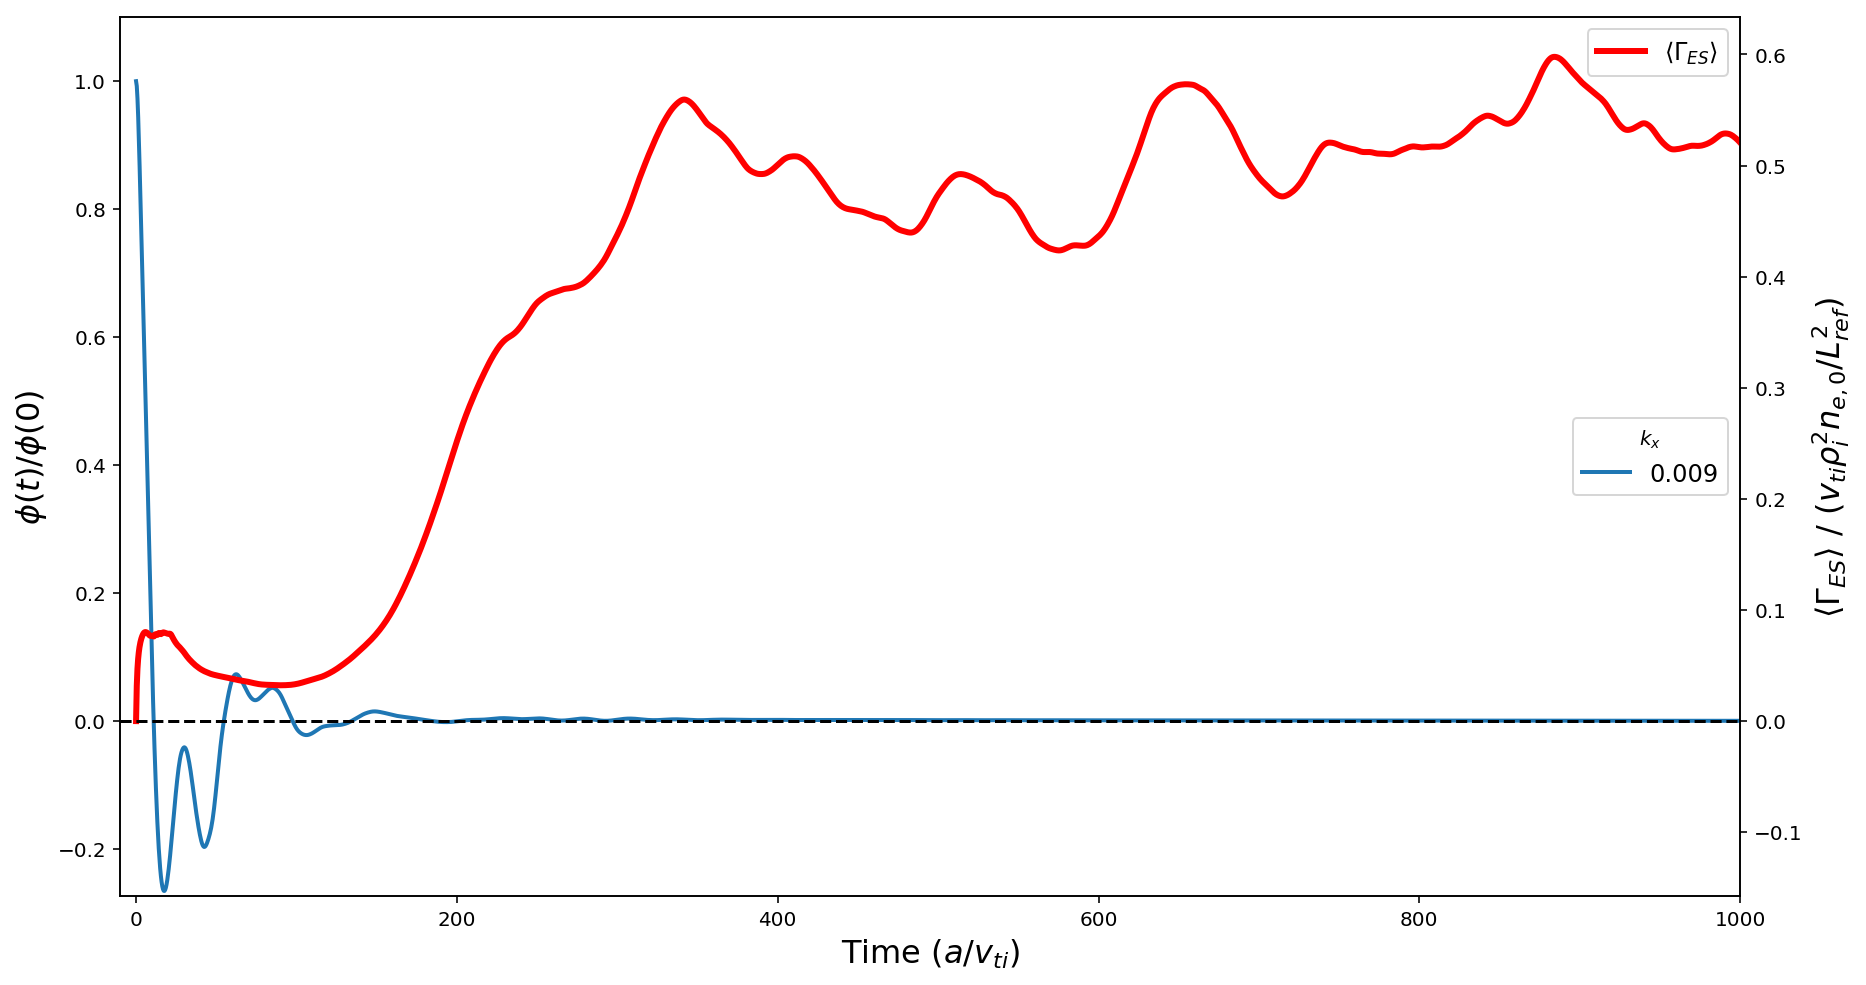

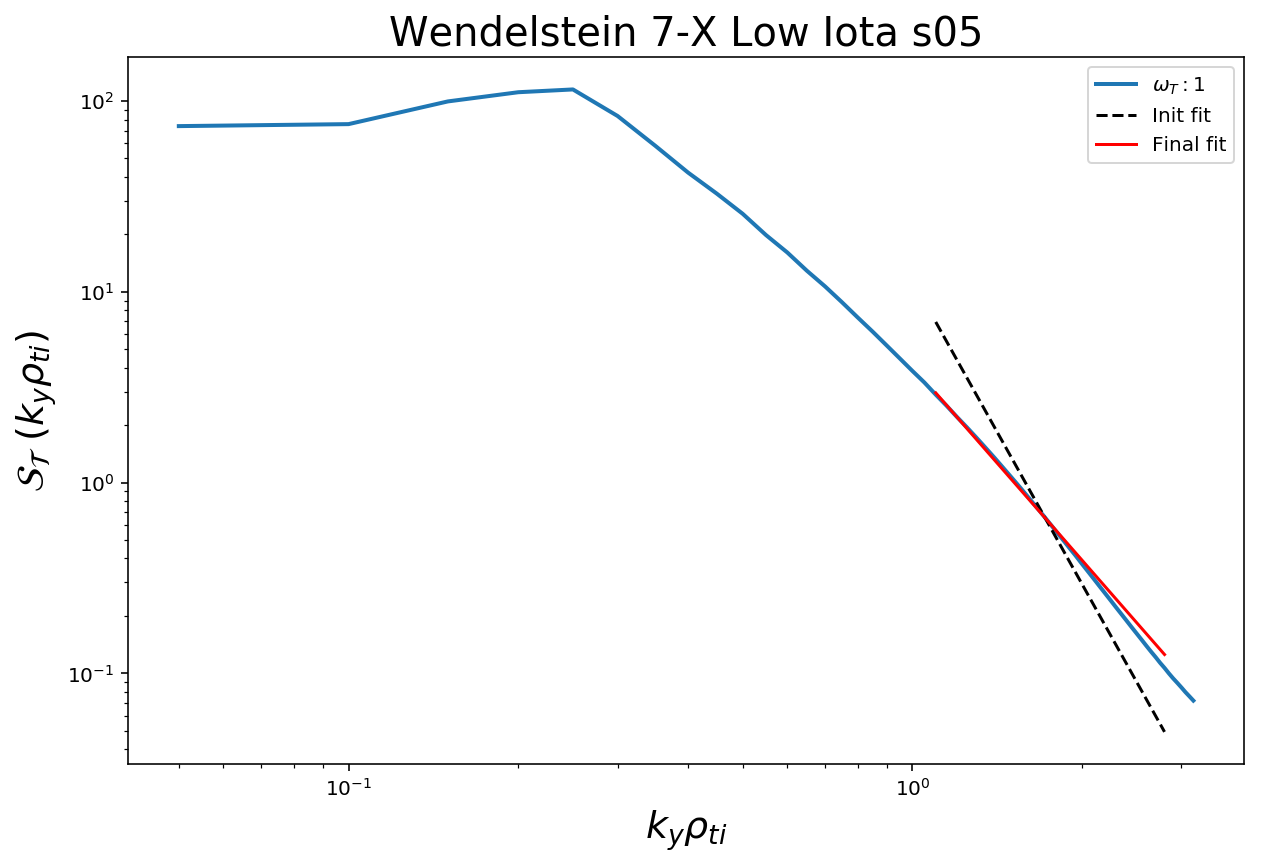

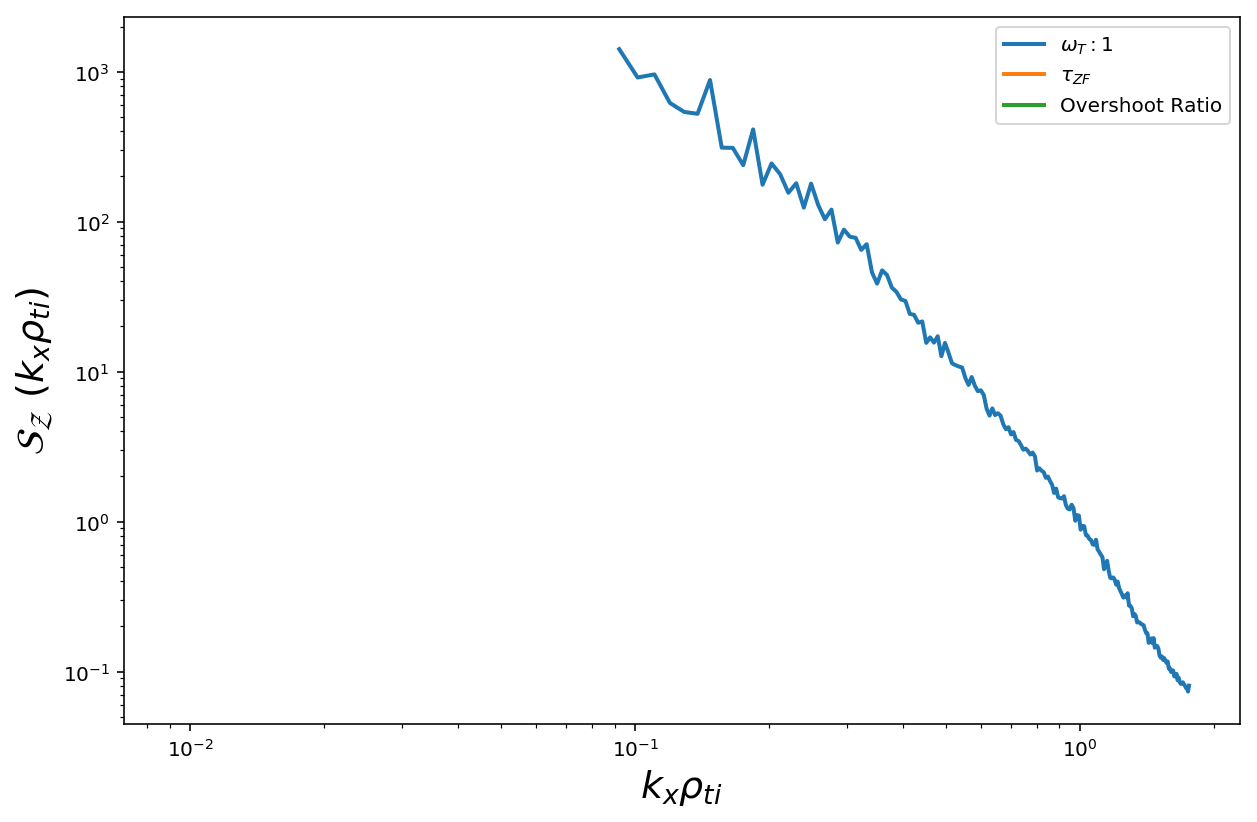

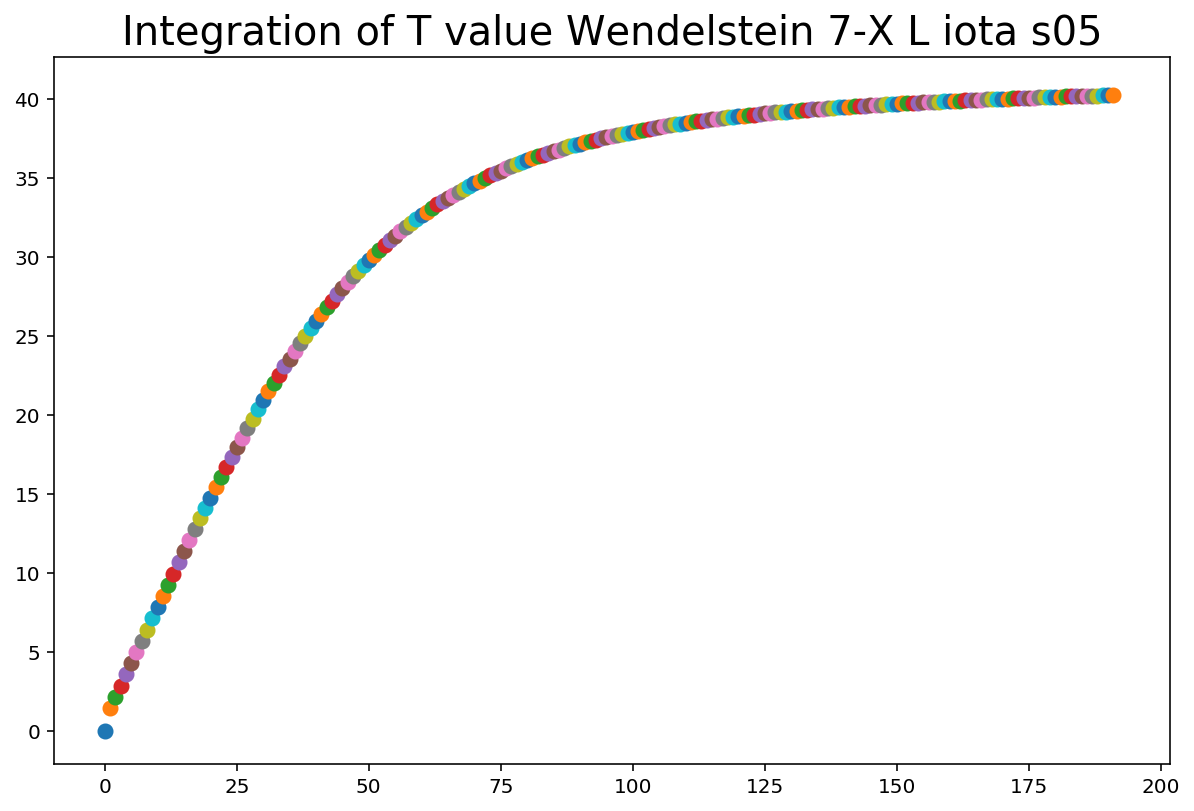

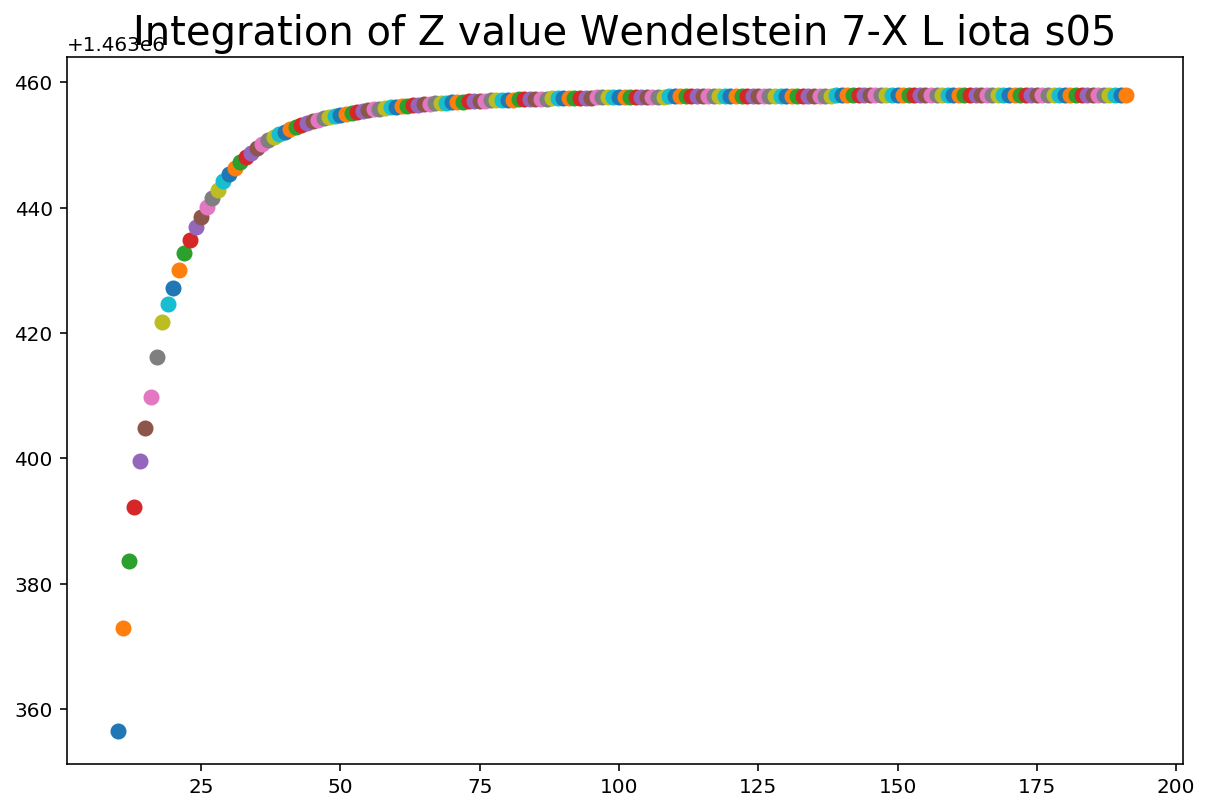

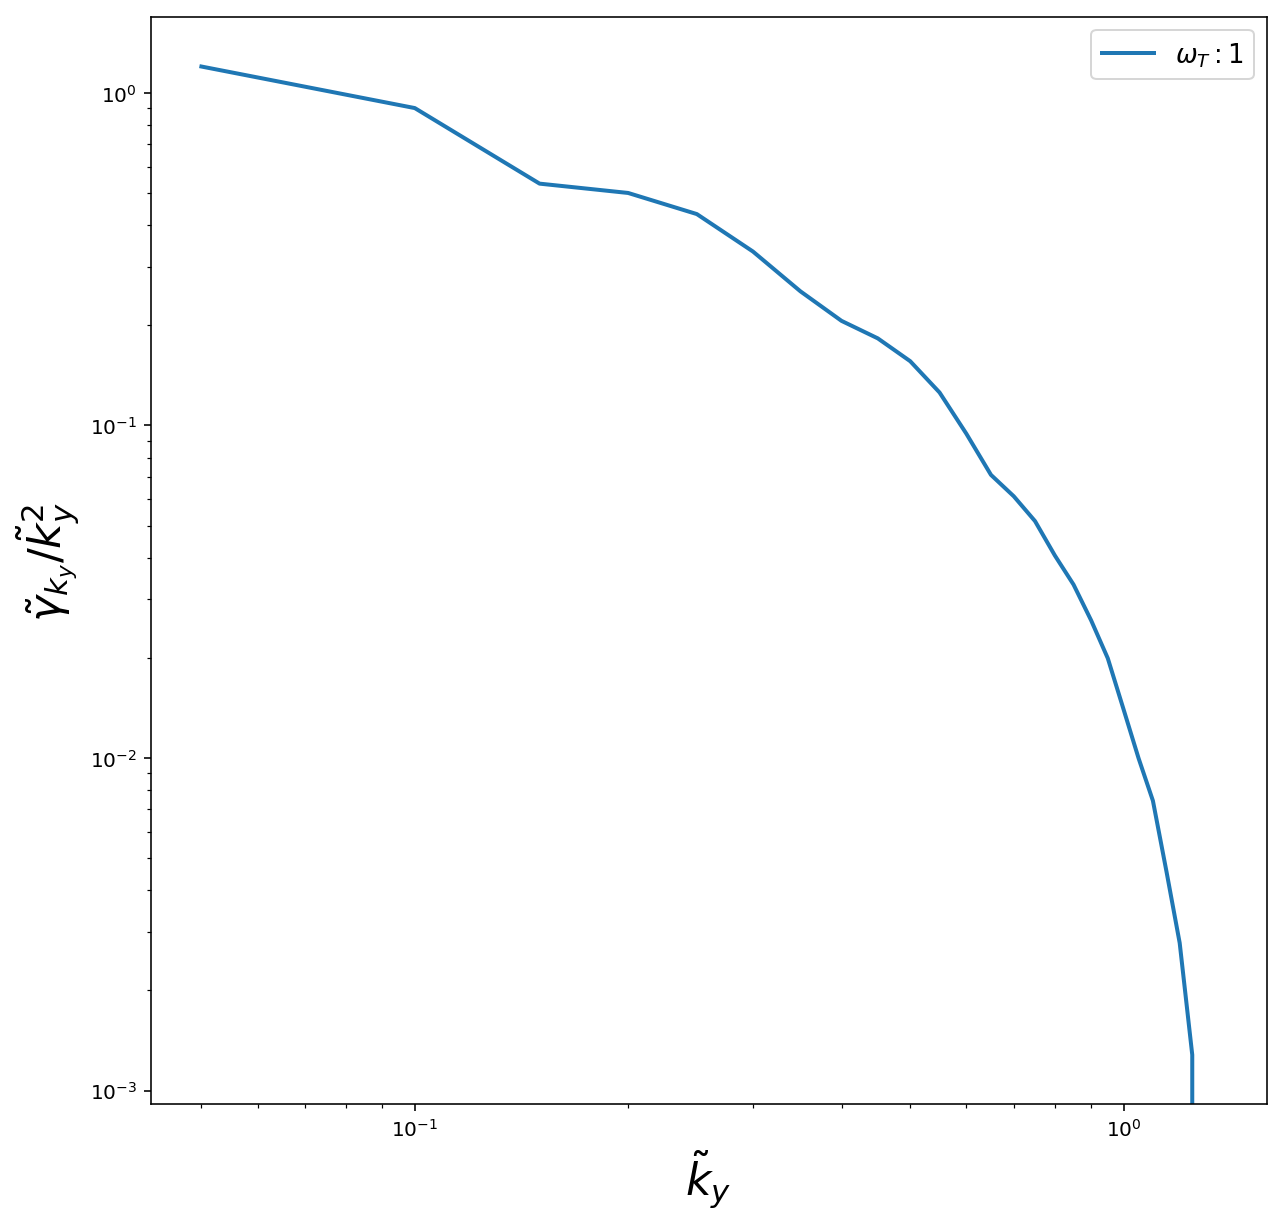

W7X Low Iota s05
S_T slope   -1.4682552843535208
T total:    40.270565180921075
T Nunami:   27.54519205621184
Z total:    85.04024384567364
Sum g/k^2:   5.259170286432601
Tau_ZF:      2.310173971564094


In [9]:
##########################
# STee maker & file loader
# For Low Iota s05
##########################

# Load data
w1 = [( pylab.loadtxt('./W7Xliotas05/ITGa_NL/scanomn0omt1/spectraions_act.dat',usecols = (0, 1)))][0]

nkx0 = 384
nky0 = 64
Lx = 681.85
kx_minimum = 0.0092
ky_minimum = 0.05

Lr_li = 0.5419677  # Minor radius W7X sd s05
Ro_li = 5.5305624  # Major radius W7X sd s05
Ts_li = 2160       # Simulation temperature
TN_li = 2160       # Model reference temperature
rhos_li = 0.0067   # Simulation gyroradius
rhoN_li = 0.0018   # Model reference gyroradius

q = np.int(nkx0/2)
factor_li = ((Ts_li*rhos_li/Lr_li)/(TN_li*rhoN_li/Ro_li))**2
factor_li_g = ((1/Lr_li)/(1/Ro_li))**2
factor_li = factor_li_g

top = q # The truncation limit

######################## Containers:
ky_li = np.zeros((top, nky0))
phiw1 = np.zeros((top, nky0))
St_li = np.zeros((nky0))
########################

# Extract ky and Phi for each omt
for n in range(0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_li[n] = w1[lo:hi, 0]
    phiw1[n] = w1[lo:hi, 1]
    np.add(St_li, phiw1[n]*factor_li/ky_minimum, out=St_li, where=True)
###### Devi Mettere qui il sete!!! ####
kx_w7x, my_data_w7x, E, t, f_s, label = diag_w7x('W7Xliotas05/GAM', maxlim=[1], plot=True, Lx=Lx, nkx0=nkx0)
hi = (nky0+(nky0*(q-1)))
kx_li = w1[hi:(hi+top), 0]
Sz_li = w1[hi:(hi+top), 1]*factor_li/kx_minimum
idx = (np.abs(kx_li - min_kx)).argmin()
kx_li = kx_li[idx:]
Sz_li = Sz_li[idx:]

#print(kx_li[0])  # Just check that I have truncated correctly
#print(kx_w7x[0])

Tzf = my_data_w7x[0, :]
OSrat = my_data_w7x[3, :]
tzf_w7xliotas05 = Tzf[min(range(len(kx_w7x)), key=lambda i: abs(kx_w7x[i]-0.1))]

idx2 = (np.abs(ky_li - minky)).argmin()
idx2f = idx2+35
Y = St_li[idx2:idx2f]
X = ky_li[1, idx2:idx2f]
pars = mod.make_params(intercept=-np.log(Y[0]), slope=-2.3)
out = mod.fit(Y, pars, x=X, nan_policy='propagate')
#print(out.fit_report(min_correl=0.25))

plt.figure(figsize=(10, 6.5))
plt.title("Wendelstein 7-X Low Iota s05", fontsize=20)
plt.plot(ky_li[1, 1:], St_li[1:], linewidth=2)  # Printing: the truncated range with normalisation
plt.plot(X, out.init_fit, 'k--')
plt.plot(X, out.best_fit, 'r-')
plt.legend(['$\omega_{T}: 1$', 'Init fit', 'Final fit'], fontsize=10)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{y}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{T}} \ (k_{y} \\rho_{ti})$',fontsize=19)
#plt.savefig('w7x_st_plot.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.plot(kx_li, Sz_li, linewidth=2)
plt.plot(kx_w7x, Tzf, linewidth=2)
plt.plot(kx_w7x, OSrat, linewidth=2)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
plt.legend(['$\omega_{T}: 1$', '$\\tau_{ZF}$', 'Overshoot Ratio'], fontsize=10)
#plt.savefig('w7x_sz_plot.eps', format='eps', dpi=1200)
plt.show()

# Piece of code to verify the integrals values are correct up to the truncation
St_li = np.zeros((nky0))
ky_li = np.zeros((top, nky0))
phiw1 = np.zeros((top, nky0))

plt.figure(figsize=(10, 6.5))
plt.title("Integration of T value Wendelstein 7-X L iota s05", fontsize=20)
for n in range (0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_li[n] = w1[lo:hi, 0]
    phiw1[n] = w1[lo:hi, 1]
    # Complete range with normalisation:
    np.add(St_li, phiw1[n]*factor_li/ky_minimum, out=St_li, where=True)
    te_omt1 = trapz(St_li[1:], x=ky_li[1, 1:])
    plt.scatter(n, te_omt1, linewidth=2)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.title("Integration of Z value Wendelstein 7-X L iota s05", fontsize=20)
hi = (nky0+(nky0*(q-1)))
for top in range (idx, top):
    kz_w1 = w1[hi:(hi+top), 0]
    pz_w1 = w1[hi:(hi+top), 1]*factor_li/kx_minimum
    z_omt1 = trapz(pz_w1, x=kz_w1)
    plt.scatter(top, z_omt1, linewidth=2)
plt.show()

####### Load Linear simulations growth rates #######
dataset1 = [('./W7Xliotas05/ITGa_l/omt1.dat')]
datalist_1 = [ ( pylab.loadtxt(datapath,usecols = (0, 2, 4, 5))) for datapath in dataset1]
datalist_1 = datalist_1[0]
ky_min1 = datalist_1[:, 1]
gamma1 = datalist_1[:, 2]
omega1 = datalist_1[:, 3]

lo = 0
hi = len(ky_min1)

k1 = ky_min1[lo:hi]
g1 = gamma1[lo:hi]

plt.figure(figsize=(10, 10))
plt.plot(k1, g1/(k1**2), linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(['$\omega_{T}: 1$'], fontsize=13)
plt.xlabel('$\\tilde{k}_{y}$',fontsize=22)
plt.ylabel('$\\tilde{\gamma}_{k_{y}} / \\tilde{k}^{2}_{y}$',fontsize=22)
plt.show()

appT_w7xliotas05omt1 = np.nansum(g1/(k1**2))
te_w7xliotas05omt1 = trapz(St_li[1:], x=ky_li[1, 1:])
idx = (np.abs(ky_li[1, :] - 0.07)).argmin()  # Truncate the integrals taking Nunami's range
idx2 = (np.abs(ky_li[1, :] - 0.4)).argmin()
teN_w7xliotas05omt1 = trapz(St_li[idx:idx2], x=ky_li[1, idx:idx2])
zet_w7xliotas05omt1 = trapz(Sz_li, x=kx_li)
slope_w7xliotas05omt1, intercept = out.best_values.values()

#print(ky_li[1, 1:9])

print('W7X Low Iota s05')
print('S_T slope  ', slope_w7xliotas05omt1)
print('T total:   ', te_w7xliotas05omt1)
print('T Nunami:  ', teN_w7xliotas05omt1)
print('Z total:   ', zet_w7xliotas05omt1)
print('Sum g/k^2:  ', appT_w7xliotas05omt1)
print('Tau_ZF:     ', tzf_w7xliotas05)

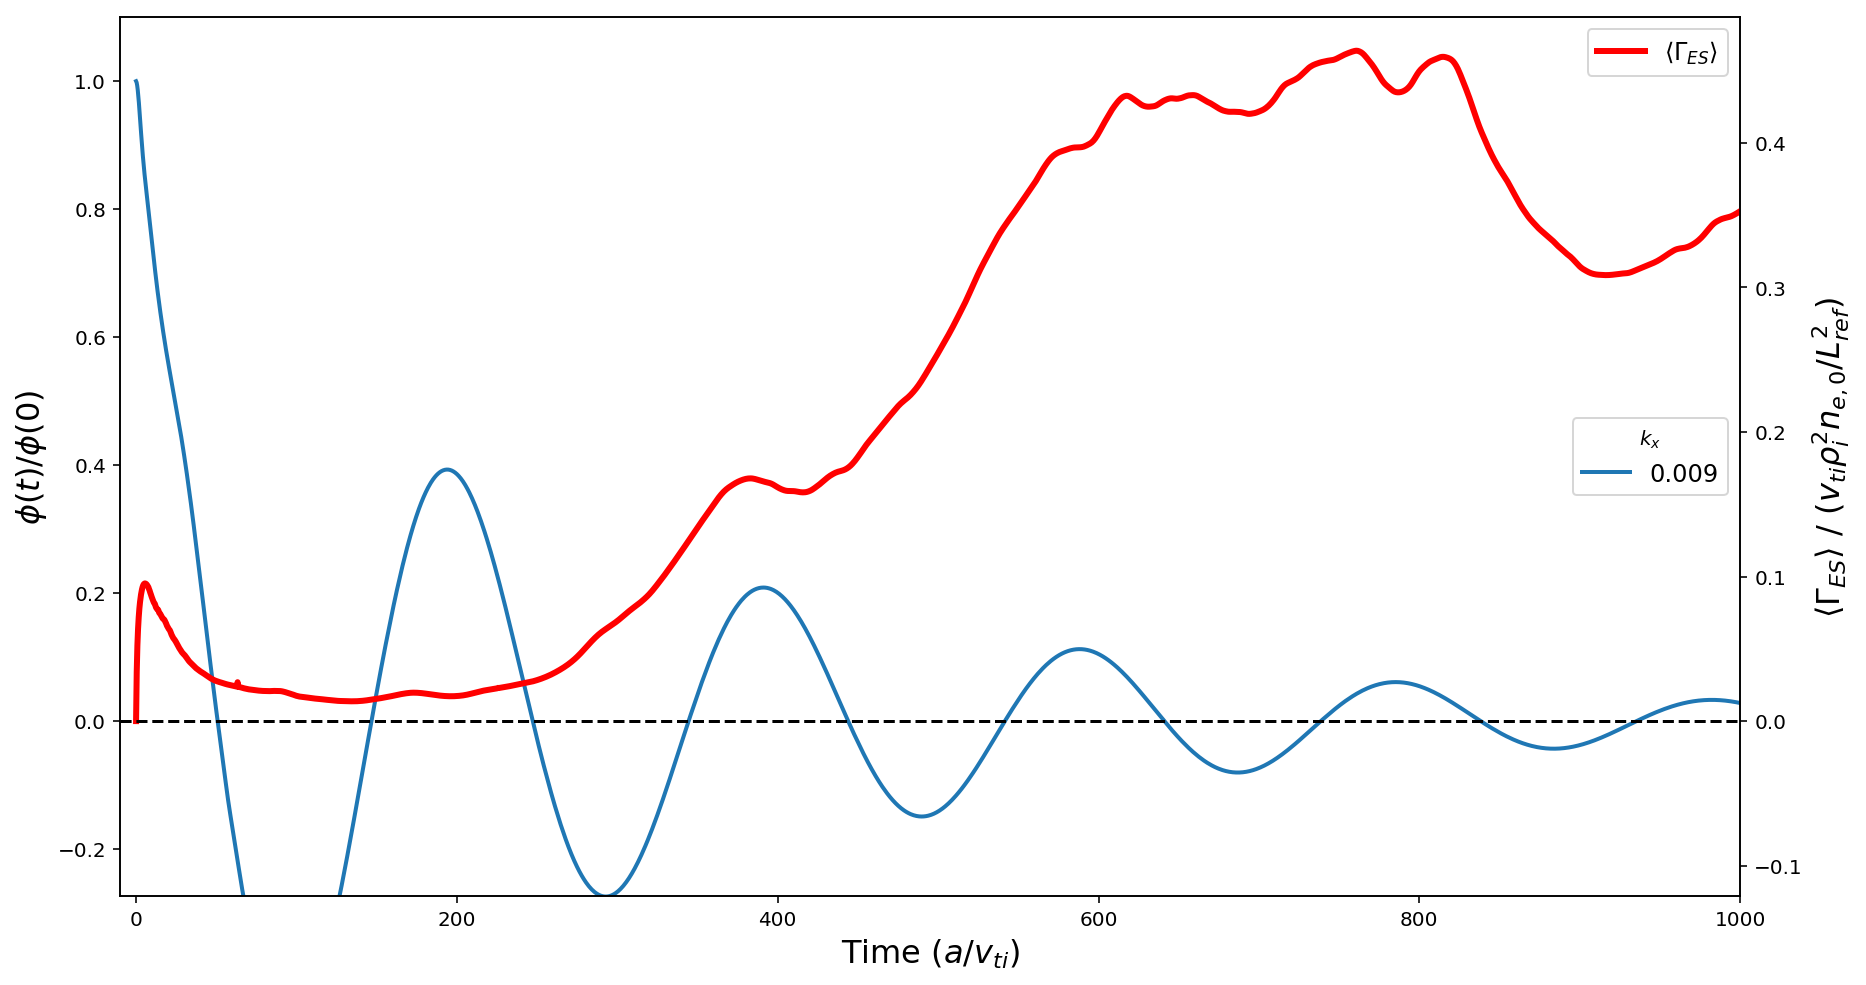

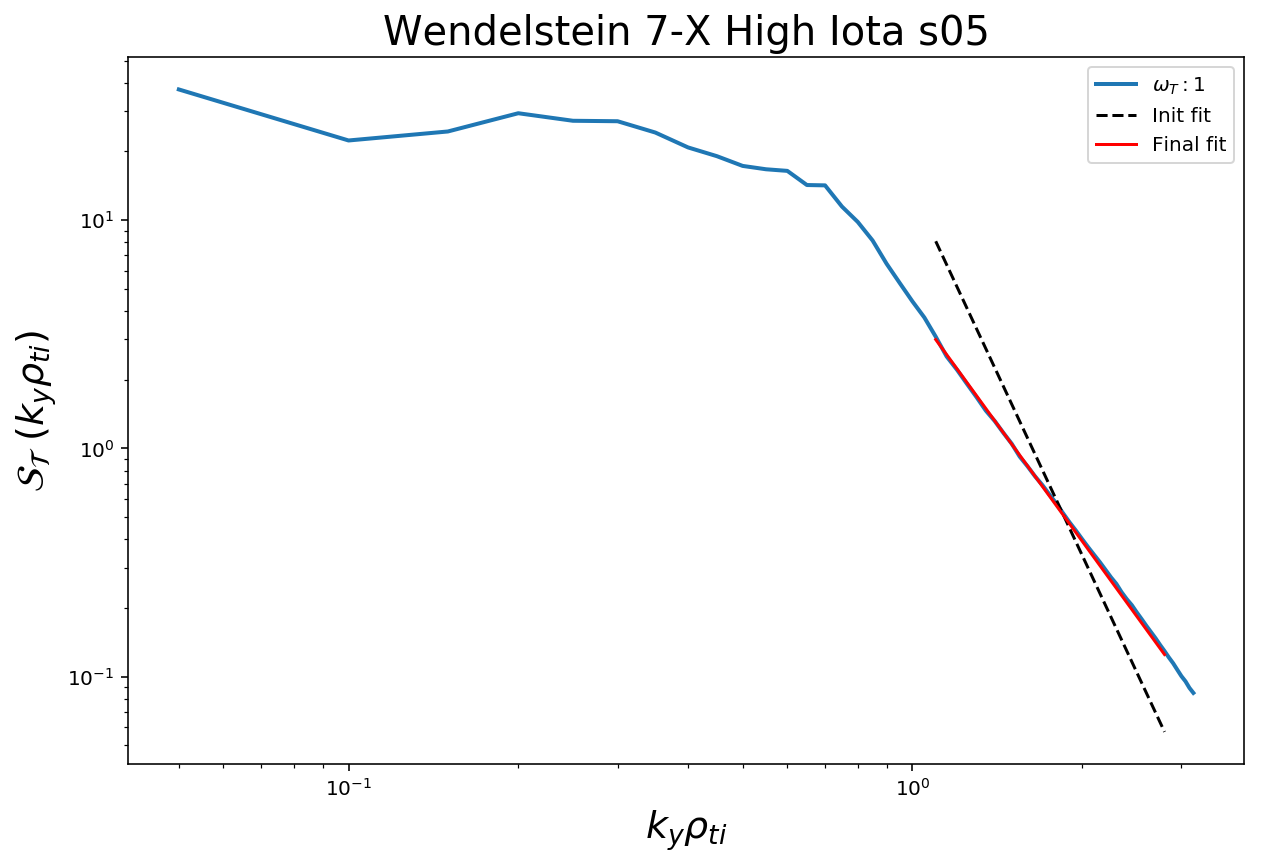

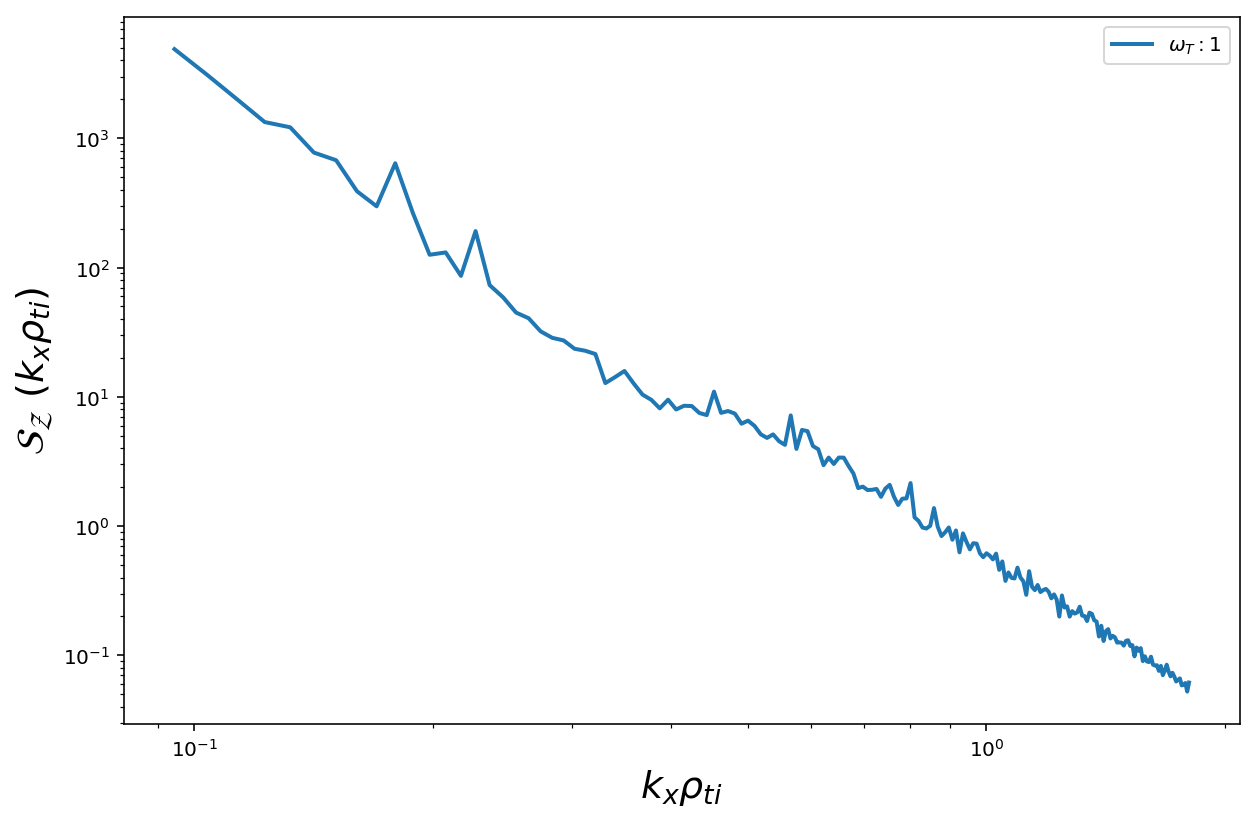

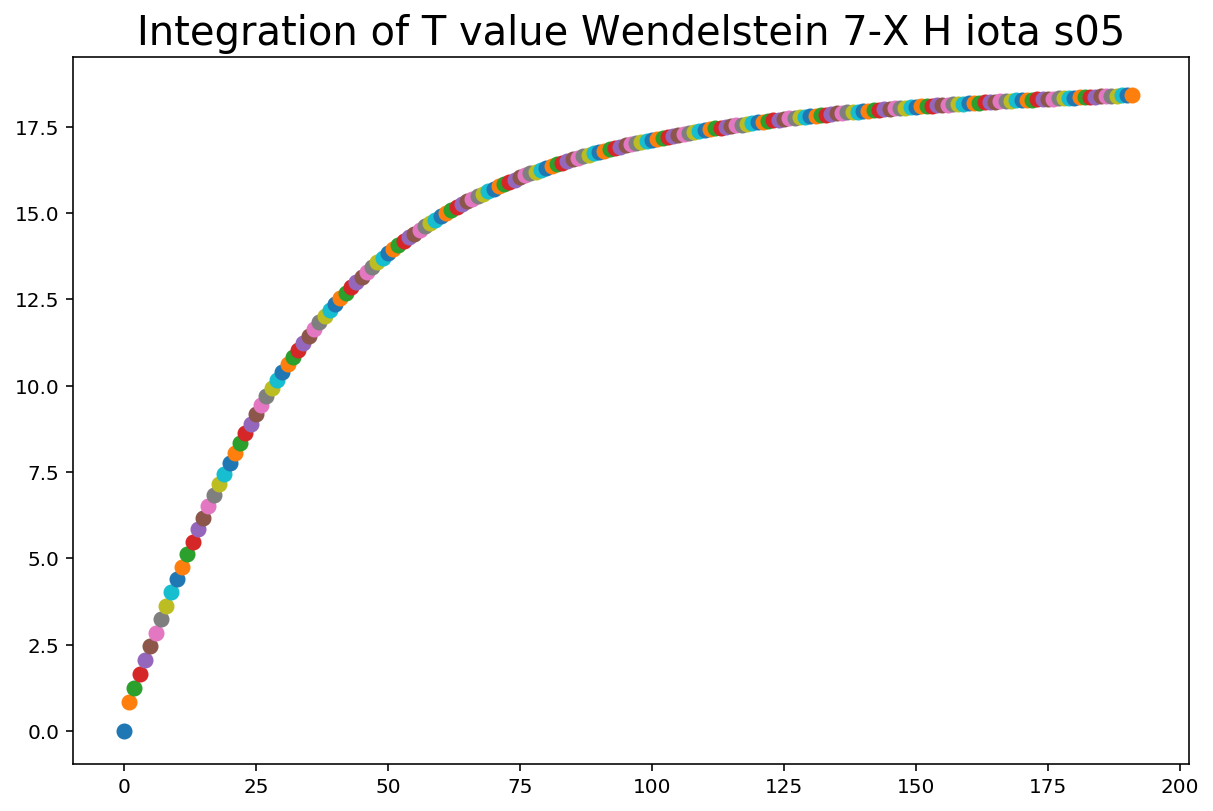

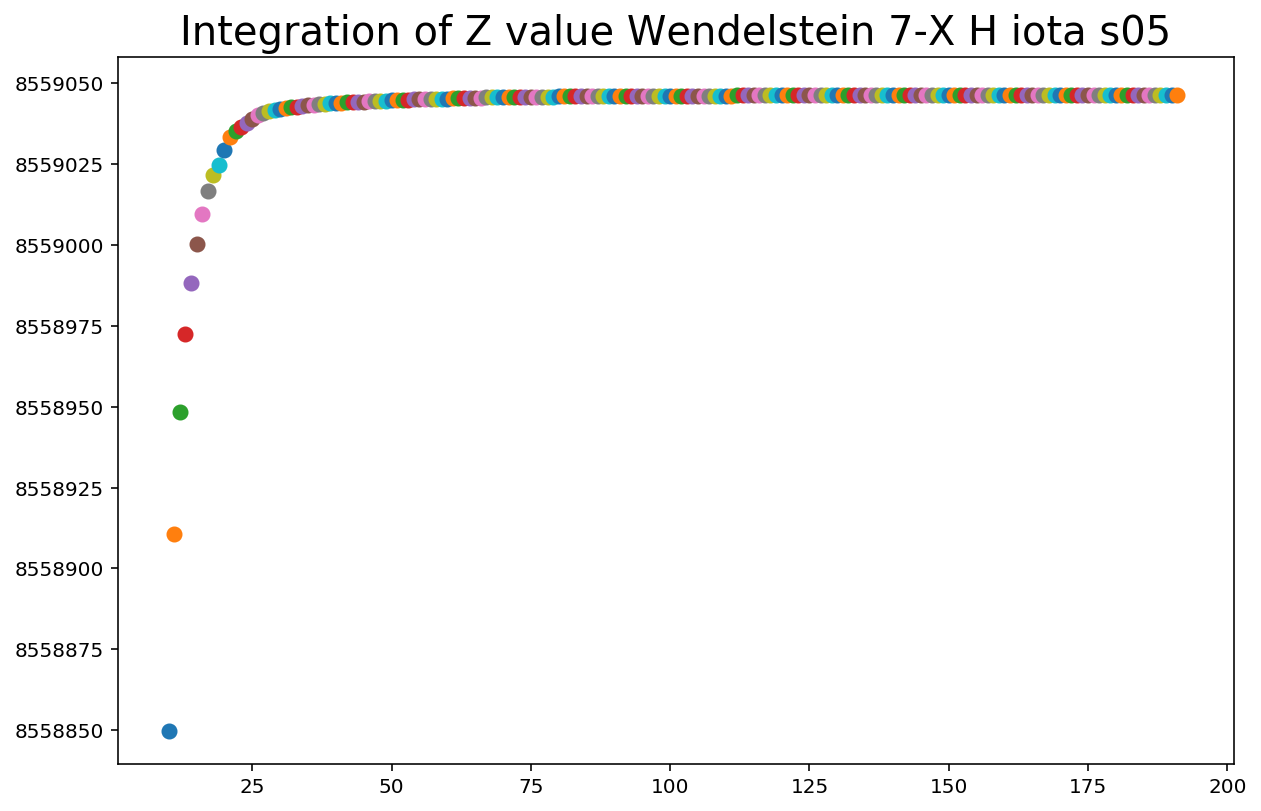

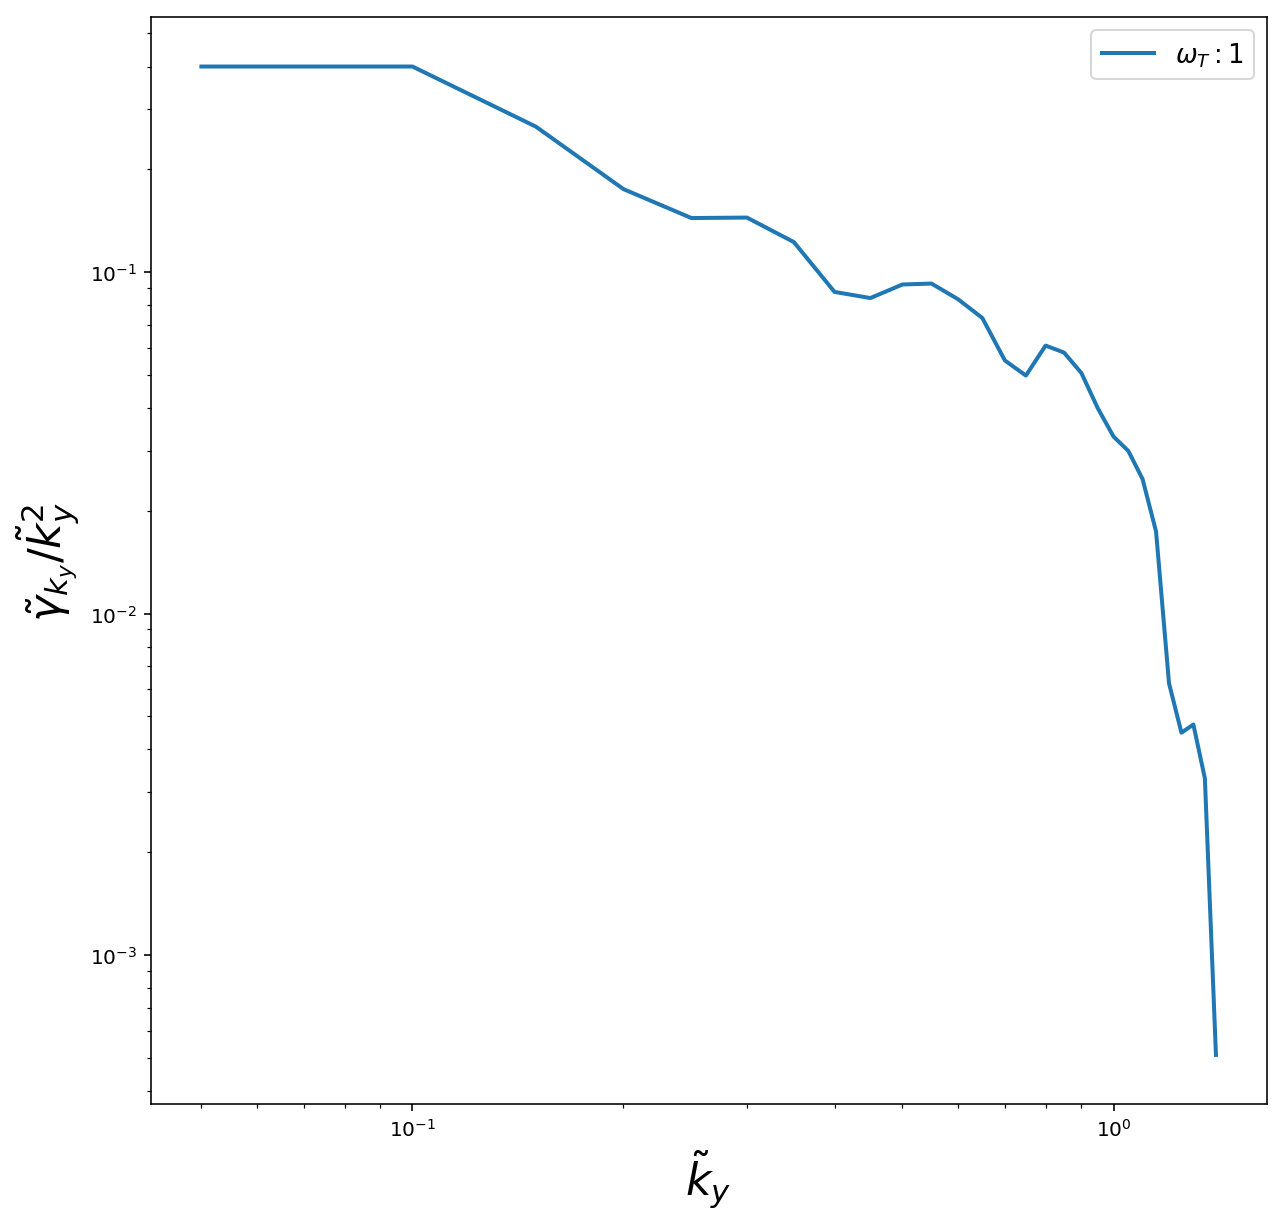

W7X High Iota s05
S_T slope   -1.4764856453297721
T total:    18.413893781806685
T Nunami:   8.062395269134894
Z total:    135.5066864422124
Sum g/k^2:   2.604116871495226
Tau_ZF:      15.664879668445186


In [10]:
##########################
# STee maker & file loader
# For High Iota s05
##########################

# Load data
w1 = [( pylab.loadtxt('./W7Xhiotas05/ITGa_NL/scanomn0omt1/spectraions_act.dat',usecols = (0, 1)))][0]

nkx0 = 384
nky0 = 64
Lx = 665.979
kx_minimum = 0.0094
ky_minimum = 0.05

Lr_hi = 0.4950306  # Minor radius W7X sd s05
Ro_hi = 5.5120202  # Major radius W7X sd s05
Ts_hi = 350        # Simulation temperature
TN_hi = 2160       # Model reference temperature
rhos_hi = 0.0067   # Simulation gyroradius
rhoN_hi = 0.0018   # Model reference gyroradius

q = np.int(nkx0/2)
factor_hi = ((Ts_hi*rhos_hi/Lr_hi)/(TN_hi*rhoN_hi/Ro_hi))**2
factor_hi_g = ((1/Lr_hi)/(1/Ro_hi))**2
factor_hi = factor_hi_g

top = q # The truncation limit

######################## Containers:
ky_hi = np.zeros((top, nky0))
phiw1 = np.zeros((top, nky0))
St_hi = np.zeros((nky0))
########################

# Extract ky and Phi for each omt
for n in range(0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_hi[n] = w1[lo:hi, 0]
    phiw1[n] = w1[lo:hi, 1]
    np.add(St_hi, phiw1[n]*factor_hi/ky_minimum, out=St_hi, where=True)

hi = (nky0+(nky0*(q-1)))
kx_hi = w1[hi:(hi+top), 0]
Sz_hi = w1[hi:(hi+top), 1]*factor_hi/kx_minimum
idx = (np.abs(kx_hi - min_kx)).argmin()
kx_hi = kx_hi[idx:]
Sz_hi = Sz_hi[idx:]

kx_w7x, my_data_w7x, E, t, f_s, label = diag_w7x('W7Xhiotas05/GAM', maxlim=[1], plot=True, Lx=Lx, nkx0=nkx0)
#print(kx_hi[0])  # Just check that I have truncated correctly
#print(kx_w7x[0])
Tzf = my_data_w7x[0, :]
OSrat = my_data_w7x[3, :]
tzf_w7xhiotas05 = Tzf[min(range(len(kx_w7x)), key=lambda i: abs(kx_w7x[i]-0.1))]

idx2 = (np.abs(ky_hi - minky)).argmin()
idx2f = idx2+35
Y = St_hi[idx2:idx2f]
X = ky_hi[1, idx2:idx2f]
pars = mod.make_params(intercept=-np.log(Y[0]), slope=-2.3)
out = mod.fit(Y, pars, x=X, nan_policy='propagate')
#print(out.fit_report(min_correl=0.25))

plt.figure(figsize=(10, 6.5))
plt.title("Wendelstein 7-X High Iota s05", fontsize=20)
plt.plot(ky_hi[1, 1:], St_hi[1:], linewidth=2)  # Printing: the truncated range with normalisation
plt.plot(X, out.init_fit, 'k--')
plt.plot(X, out.best_fit, 'r-')
plt.legend(['$\omega_{T}: 1$', 'Init fit', 'Final fit'], fontsize=10)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{y}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{T}} \ (k_{y} \\rho_{ti})$',fontsize=19)
#plt.savefig('w7x_st_plot.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.plot(kx_hi, Sz_hi, linewidth=2)
#plt.plot(kx_w7x, Tzf, linewidth=2)
#plt.plot(kx_w7x, OSrat, linewidth=2)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
plt.legend(['$\omega_{T}: 1$', '$\\tau_{ZF}$', 'Overshoot Ratio'], fontsize=10)
#plt.savefig('w7x_sz_plot.eps', format='eps', dpi=1200)
plt.show()

# Piece of code to verify the integrals values are correct up to the truncation
St_hi = np.zeros((nky0))
ky_hi = np.zeros((top, nky0))
phiw1 = np.zeros((top, nky0))

plt.figure(figsize=(10, 6.5))
plt.title("Integration of T value Wendelstein 7-X H iota s05", fontsize=20)
for n in range (0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_hi[n] = w1[lo:hi, 0]
    phiw1[n] = w1[lo:hi, 1]
    # Complete range with normalisation:
    np.add(St_hi, phiw1[n]*factor_hi/ky_minimum, out=St_hi, where=True)
    te_omt1 = trapz(St_hi[1:], x=ky_hi[1, 1:])
    plt.scatter(n, te_omt1, linewidth=2)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.title("Integration of Z value Wendelstein 7-X H iota s05", fontsize=20)
hi = (nky0+(nky0*(q-1)))
for top in range (idx, top):
    kz_w1 = w1[hi:(hi+top), 0]
    pz_w1 = w1[hi:(hi+top), 1]*factor_hi/kx_minimum
    z_omt1 = trapz(pz_w1, x=kz_w1)
    plt.scatter(top, z_omt1, linewidth=2)
plt.show()

####### Load Linear simulations growth rates #######
dataset1 = [('./W7Xhiotas05/ITGa_l/omt1.dat')]
datalist_1 = [ ( pylab.loadtxt(datapath,usecols = (0, 2, 4, 5))) for datapath in dataset1]
datalist_1 = datalist_1[0]
ky_min1 = datalist_1[:, 1]
gamma1 = datalist_1[:, 2]
omega1 = datalist_1[:, 3]

lo = 0
hi = len(ky_min1)

k1 = ky_min1[lo:hi]
g1 = gamma1[lo:hi]

plt.figure(figsize=(10, 10))
plt.plot(k1, g1/(k1**2), linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(['$\omega_{T}: 1$'], fontsize=13)
plt.xlabel('$\\tilde{k}_{y}$',fontsize=22)
plt.ylabel('$\\tilde{\gamma}_{k_{y}} / \\tilde{k}^{2}_{y}$',fontsize=22)
plt.show()

appT_w7xhiotas05omt1 = np.nansum(g1/(k1**2))
te_w7xhiotas05omt1 = trapz(St_hi[1:], x=ky_hi[1, 1:])
idx = (np.abs(ky_hi[1, :] - 0.07)).argmin()  # Truncate the integrals taking Nunami's range
idx2 = (np.abs(ky_hi[1, :] - 0.4)).argmin()
teN_w7xhiotas05omt1 = trapz(St_hi[idx:idx2], x=ky_hi[1, idx:idx2])
zet_w7xhiotas05omt1 = trapz(Sz_hi, x=kx_hi)
slope_w7xhiotas05omt1, intercept = out.best_values.values()

print('W7X High Iota s05')
print('S_T slope  ', slope_w7xhiotas05omt1)
print('T total:   ', te_w7xhiotas05omt1)
print('T Nunami:  ', teN_w7xhiotas05omt1)
print('Z total:   ', zet_w7xhiotas05omt1)
print('Sum g/k^2:  ', appT_w7xhiotas05omt1)
print('Tau_ZF:     ', tzf_w7xhiotas05)

OSError: ./W7Xhiotas05_B/GAM/../ITGa_NL/omt1/nrgsummaryions_act.dat not found.

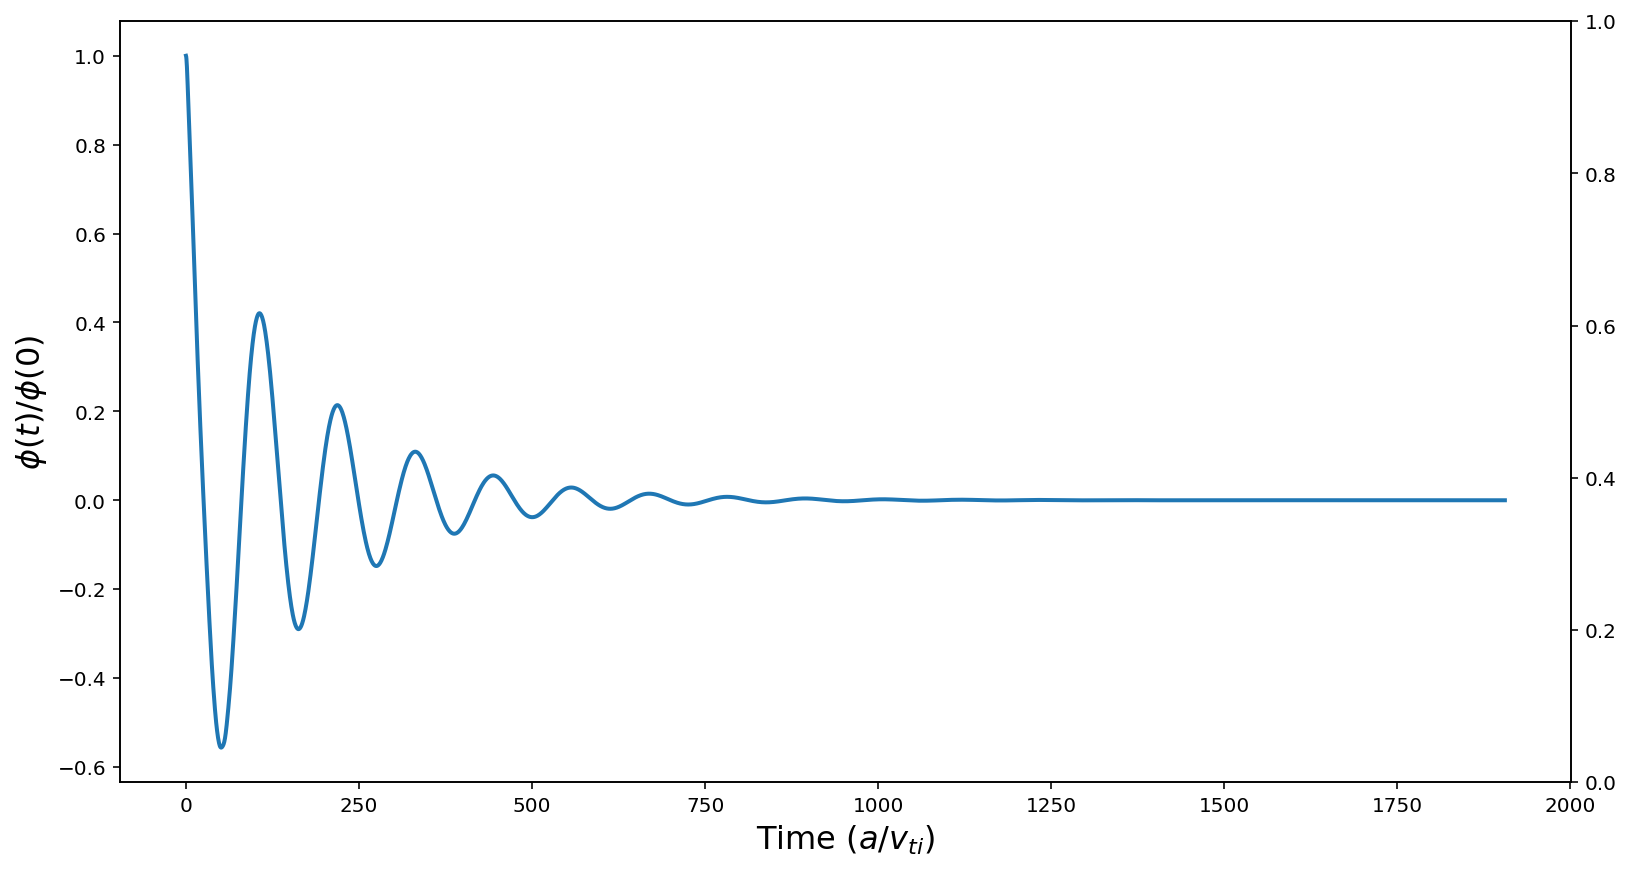

In [12]:
##########################
# STee maker & file loader
# For High Iota Boozer s05
##########################

# Load data
w1 = [( pylab.loadtxt('./W7Xhiotas05_B/ITGa_NL/omt1/spectraions_act.dat',usecols = (0, 1)))][0]

nkx0 = 384
nky0 = 64
Lx = 665.979
kx_minimum = 0.0094
ky_minimum = 0.05

Lr_hi_b = 0.4950306  # Minor radius W7X sd s05
Ro_hi_b = 5.5120202  # Major radius W7X sd s05
Ts_hi_b = 350        # Simulation temperature
TN_hi_b = 2160       # Model reference temperature
rhos_hi_b = 0.0027   # Simulation gyroradius
rhoN_hi_b = 0.0018   # Model reference gyroradius

q = np.int(nkx0/2)
factor_hi_b = ((Ts_hi_b*rhos_hi_b/Lr_hi_b)/(TN_hi_b*rhoN_hi_b/Ro_hi_b))**2
factor_hi_b_g = ((1/Lr_hi_b)/(1/Ro_hi_b))**2
factor_hi_b = factor_hi_b_g

top = q # The truncation limit

######################## Containers:
ky_hi_b = np.zeros((top, nky0))
phiw1 = np.zeros((top, nky0))
St_hi_b = np.zeros((nky0))
########################

# Extract ky and Phi for each omt
for n in range(0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_hi_b[n] = w1[lo:hi, 0]
    phiw1[n] = w1[lo:hi, 1]
    np.add(St_hi_b, phiw1[n]*factor_hi_b/ky_minimum, out=St_hi_b, where=True)

hi = (nky0+(nky0*(q-1)))
kx_hi_b = w1[hi:(hi+top), 0]
Sz_hi_b = w1[hi:(hi+top), 1]*factor_hi_b/kx_minimum
idx = (np.abs(kx_hi_b - min_kx)).argmin()
kx_hi_b = kx_hi_b[idx:]
Sz_hi_b = Sz_hi_b[idx:]

kx_w7x, my_data_w7x, E, t, f_s, label = diag_w7x('W7Xhiotas05_B/GAM', maxlim=[1], plot=True, Lx=Lx, nkx0=nkx0)
#print(kx_hi_b[0])  # Just check that I have truncated correctly
#print(kx_w7x[0])
Tzf = my_data_w7x[0, :]
OSrat = my_data_w7x[3, :]
tzf_w7xhiotas05_b = Tzf[min(range(len(kx_w7x)), key=lambda i: abs(kx_w7x[i]-0.1))]

idx2 = (np.abs(ky_hi_b - minky)).argmin()
idx2f = idx2+35
Y = St_hi_b[idx2:idx2f]
X = ky_hi_b[1, idx2:idx2f]
pars = mod.make_params(intercept=-np.log(Y[0]), slope=-2.3)
out = mod.fit(Y, pars, x=X, nan_policy='propagate')
#print(out.fit_report(min_correl=0.25))

plt.figure(figsize=(10, 6.5))
plt.title("Wendelstein 7-X High Iota Boozer coordinates s05", fontsize=20)
plt.plot(ky_hi_b[1, 1:], St_hi_b[1:], linewidth=2)  # Printing: the truncated range with normalisation
plt.plot(X, out.init_fit, 'k--')
plt.plot(X, out.best_fit, 'r-')
plt.legend(['$\omega_{T}: 1$', 'Init fit', 'Final fit'], fontsize=10)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{y}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{T}} \ (k_{y} \\rho_{ti})$',fontsize=19)
#plt.savefig('w7x_st_plot.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.plot(kx_hi_b, Sz_hi_b, linewidth=2)
#plt.plot(kx_w7x, Tzf, linewidth=2)
#plt.plot(kx_w7x, OSrat, linewidth=2)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
plt.legend(['$\omega_{T}: 1$', '$\\tau_{ZF}$', 'Overshoot Ratio'], fontsize=10)
#plt.savefig('w7x_sz_plot.eps', format='eps', dpi=1200)
plt.show()

# Piece of code to verify the integrals values are correct up to the truncation
St_hi_b = np.zeros((nky0))
ky_hi_b = np.zeros((top, nky0))
phiw1 = np.zeros((top, nky0))

plt.figure(figsize=(10, 6.5))
plt.title("Integration of T value Wendelstein W7X H iota B coord s05", fontsize=20)
for n in range (0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_hi_b[n] = w1[lo:hi, 0]
    phiw1[n] = w1[lo:hi, 1]
    # Complete range with normalisation:
    np.add(St_hi_b, phiw1[n]*factor_hi_b/ky_minimum, out=St_hi_b, where=True)
    te_omt1 = trapz(St_hi_b[1:], x=ky_hi_b[1, 1:])
    plt.scatter(n, te_omt1, linewidth=2)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.title("Integration of Z value W7X H iota B coord s05", fontsize=20)
hi = (nky0+(nky0*(q-1)))
for top in range (idx, top):
    kz_w1 = w1[hi:(hi+top), 0]
    pz_w1 = w1[hi:(hi+top), 1]*factor_hi_b/kx_minimum
    z_omt1 = trapz(pz_w1, x=kz_w1)
    plt.scatter(top, z_omt1, linewidth=2)
plt.show()

####### Load Linear simulations growth rates #######
dataset1 = [('./W7Xhiotas05_B/ITGa_l/omt1.dat')]
datalist_1 = [ ( pylab.loadtxt(datapath,usecols = (0, 2, 4, 5))) for datapath in dataset1]
datalist_1 = datalist_1[0]
ky_min1 = datalist_1[:, 1]
gamma1 = datalist_1[:, 2]
omega1 = datalist_1[:, 3]

lo = 0
hi = len(ky_min1)

k1 = ky_min1[lo:hi]
g1 = gamma1[lo:hi]

plt.figure(figsize=(10, 10))
plt.plot(k1, g1/(k1**2), linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(['$\omega_{T}: 1$'], fontsize=13)
plt.xlabel('$\\tilde{k}_{y}$',fontsize=22)
plt.ylabel('$\\tilde{\gamma}_{k_{y}} / \\tilde{k}^{2}_{y}$',fontsize=22)
plt.show()

appT_w7xhiotas05omt1_b = np.nansum(g1/(k1**2))
te_w7xhiotas05omt1_b = trapz(St_hi_b[1:], x=ky_hi_b[1, 1:])
idx = (np.abs(ky_hi_b[1, :] - 0.07)).argmin()  # Truncate the integrals taking Nunami's range
idx2 = (np.abs(ky_hi_b[1, :] - 0.4)).argmin()
teN_w7xhiotas05omt1_b = trapz(St_hi_b[idx:idx2], x=ky_hi_b[1, idx:idx2])
zet_w7xhiotas05omt1_b = trapz(Sz_hi_b, x=kx_hi_b)
slope_w7xhiotas05omt1_b, intercept = out.best_values.values()

print('W7X High Iota Boozer coordinates s05')
print('S_T slope  ', slope_w7xhiotas05omt1_b)
print('T total:   ', te_w7xhiotas05omt1_b)
print('T Nunami:  ', teN_w7xhiotas05omt1_b)
print('Z total:   ', zet_w7xhiotas05omt1_b)
print('Sum g/k^2:  ', appT_w7xhiotas05omt1_b)
print('Tau_ZF:     ', tzf_w7xhiotas05_b)

In [ ]:
######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################

In [ ]:
######################################## PUT ALL THE IMPORTANT DATA HERE  ############################################

w7x_slope = np.array([slope_w7xhiotas05omt1_b,
                      slope_w7xhiotas05omt1,
                      slope_w7xhms05omt1_lkx,
                      slope_w7xliotas05omt1,
                      slope_w7xsds05omt1,
                      slope_w7xhms05omt1,
                      slope_w7xlms05omt1])

w7x_te = np.array([te_w7xhiotas05omt1_b,
                   te_w7xhiotas05omt1,
                   te_w7xhms05omt1_lkx,
                   te_w7xliotas05omt1,
                   te_w7xsds05omt1,
                   te_w7xhms05omt1,
                   te_w7xlms05omt1])

w7x_te_n = np.array([teN_w7xhiotas05omt1_b,
                     teN_w7xhiotas05omt1,
                     teN_w7xhms05omt1_lkx,
                     teN_w7xliotas05omt1,                     
                     teN_w7xsds05omt1,
                     teN_w7xhms05omt1,
                     teN_w7xlms05omt1])

w7x_zet = np.array([zet_w7xhiotas05omt1_b,
                    zet_w7xhiotas05omt1,
                    zet_w7xhms05omt1_lkx,
                    zet_w7xliotas05omt1,
                    zet_w7xsds05omt1,
                    zet_w7xhms05omt1,
                    zet_w7xlms05omt1])

w7x_sigma = np.array([appT_w7xhiotas05omt1_b,
                      appT_w7xhiotas05omt1,
                      appT_w7xhms05omt1_lkx,
                      appT_w7xliotas05omt1,
                      appT_w7xsds05omt1,
                      appT_w7xhms05omt1,
                      appT_w7xlms05omt1])

w7x_zf = np.array([tzf_w7xhiotas05_b,
                   tzf_w7xhiotas05,
                   tzf_w7xhms05_lkx,
                   tzf_w7xliotas05,
                   tzf_w7xsds05,
                   tzf_w7xhms05,
                   tzf_w7xlms05])

slope_w7x, intercept, r_value, p_value, std_err = stats.linregress(w7x_sigma, w7x_te)
slope_w7x_n, intercept, r_value, p_value, std_err = stats.linregress(w7x_sigma, w7x_te_n)
mod2 = Model(line2)
pars = mod2.make_params(intercept=16, slope=8.0)
out = mod2.fit(w7x_te, pars, x=w7x_sigma, nan_policy='propagate')
#print(out.fit_report(min_correl=0.25))


fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.scatter(w7x_sigma[4], w7x_te[4], label='Standard')
ax1.scatter(w7x_sigma[5], w7x_te[5], label='High Mirror')
ax1.scatter(w7x_sigma[2], w7x_te[2], label='High Mirror Low kx')
ax1.scatter(w7x_sigma[6], w7x_te[6], label='Low Mirror')
ax1.scatter(w7x_sigma[3], w7x_te[3], label='Low Iota')
ax1.scatter(w7x_sigma[1], w7x_te[1], label='High Iota')
ax1.scatter(w7x_sigma[0], w7x_te[0], label='High Iota Boozer coord.')
x = np.linspace(min(w7x_sigma), max(w7x_sigma), len(out.best_fit))
y = line2(x, 8.17195062, -1.61062606)
ax1.plot(x, y, 'k--')
ax1.set_ylabel('$\mathcal{T}$', fontsize=19)
ax1.set_xlabel('$\Sigma \ (\gamma_{k_{y}} / k_{y}\\rho_{ti})$', fontsize=19)
ax1.legend()
#plt.savefig('tau_sum_plot.eps', format='eps', dpi=1200)
print('the slope is:', slope_w7x)
#plt.show()

ax2.scatter(0, w7x_slope[4], label='Standard')
ax2.scatter(1, w7x_slope[5], label='High Mirror')
ax2.scatter(2, w7x_slope[2], label='High Mirror Low kx')
ax2.scatter(3, w7x_slope[6], label='Low Mirror')
ax2.scatter(4, w7x_slope[3], label='Low Iota')
ax2.scatter(5, w7x_slope[1], label='High Iota')
ax2.scatter(6, w7x_slope[0], label='High Iota Boozer coord.')
ax2.set_ylabel('S_T slope', fontsize=19)
ax2.legend()

#w7x = np.sqrt(w7x_zet/w7x_te)
#tau = [tzf_w7xhms036, tzf_w7xhms036, tzf_w7xhms036, tzf_w7xhms05, tzf_w7xhms05, tzf_w7xhms05,
#       tzf_w7xsds025, tzf_w7xsds025, tzf_w7xsds025, tzf_w7xsds036, tzf_w7xsds05, tzf_w7xsds05, tzf_w7xsds05, 
#       tzf_w7xsds06, tzf_w7xsds06, tzf_w7xsds06]
#slope_w7x, intercept, r_value, p_value, std_err = stats.linregress(tau, w7x)

#plt.figure(figsize=(7, 7))
#plt.plot(tau, w7x, 'o')
#plt.ylabel('$Sqrt(Z/T)$', fontsize=19)
#plt.xlabel('$Tau_ZetEf$', fontsize=19)
#plt.legend(['W7X'], loc='lower right')
#plt.savefig('tau_sum_plot.eps', format='eps', dpi=1200)
#print('the slope is:', slope_w7x)
#plt.show()

ax3.plot(kx_sd, Sz_sd, linewidth=2, label='Standard')
ax3.plot(kx_hm, Sz_hm, linewidth=2, label='High Mirror')
ax3.plot(kx_hm_lkx, Sz_hm_lkx, linewidth=2, label='High Mirror low kx')
ax3.plot(kx_lm, Sz_lm, linewidth=2, label='Low Mirror')
ax3.plot(kx_li, Sz_li, linewidth=2, label='Low Iota')
ax3.plot(kx_hi, Sz_hi, linewidth=2, label='High Iota')
ax3.plot(kx_hi_b, Sz_hi_b, linewidth=2, label='High Iota Boozer')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
ax3.set_ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
ax3.legend(fontsize=10)

ax4.scatter(w7x_zf[4], np.sqrt(zet_w7xsds05omt1/te_w7xsds05omt1), label='Standard')
ax4.scatter(w7x_zf[5], np.sqrt(zet_w7xhms05omt1/te_w7xhms05omt1), label='High Mirror')
ax4.scatter(w7x_zf[2], np.sqrt(zet_w7xhms05omt1_lkx/te_w7xhms05omt1_lkx), label='High Mirror Low kx')
ax4.scatter(w7x_zf[6], np.sqrt(zet_w7xlms05omt1/te_w7xlms05omt1), label='Low Mirror')
ax4.scatter(w7x_zf[3], np.sqrt(zet_w7xliotas05omt1/te_w7xliotas05omt1), label='Low Iota')
ax4.scatter(w7x_zf[1], np.sqrt(zet_w7xhiotas05omt1/te_w7xhiotas05omt1), label='High Iota')
ax4.scatter(w7x_zf[0], np.sqrt(zet_w7xhiotas05omt1_b/te_w7xhiotas05omt1_b), label='High Iota Boozer coord.')
ax4.set_ylabel('$\mathcal{Z}$', fontsize=19)
ax4.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(6.5, 4.5))
ax3 = fig.add_subplot(111)
ax3.plot(kx_sd, Sz_sd, linewidth=2, label='Standard')
ax3.plot(kx_hm, Sz_hm, linewidth=2, label='High Mirror')
ax3.plot(kx_hm_lkx, Sz_hm_lkx, linewidth=2, label='High Mirror low kx')
ax3.plot(kx_lm, Sz_lm, linewidth=2, label='Low Mirror')
ax3.plot(kx_li, Sz_li, linewidth=2, label='Low Iota')
ax3.plot(kx_hi, Sz_hi, linewidth=2, label='High Iota')
ax3.plot(kx_hi_b, Sz_hi_b, linewidth=2, label='High Iota Boozer')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
ax3.set_ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
ax3.legend(fontsize=10)
plt.savefig('../../CMSS_2018/Poster/w7x_sZ.pdf', format='pdf', dpi=1200)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6.5, 6.5))
ax1 = fig.add_subplot(111)
ax1.scatter(w7x_sigma[4], w7x_te[4], label='Standard')
ax1.scatter(w7x_sigma[5], w7x_te[5], label='High Mirror')
ax1.scatter(w7x_sigma[2], w7x_te[2], label='High Mirror Low kx')
ax1.scatter(w7x_sigma[6], w7x_te[6], label='Low Mirror')
ax1.scatter(w7x_sigma[3], w7x_te[3], label='Low Iota')
ax1.scatter(w7x_sigma[1], w7x_te[1], label='High Iota')
ax1.scatter(w7x_sigma[0], w7x_te[0], label='High Iota Boozer coord.')
x = np.linspace(min(w7x_sigma), max(w7x_sigma), len(out.best_fit))
y = line2(x, 8.17195062, -1.61062606)
ax1.plot(x, y, 'k--')
ax1.set_ylabel('$\mathcal{T} = \int d(k_{y}\\rho_{t,i}) \mathcal{S}_{\mathcal{T}}$', fontsize=19)
ax1.set_xlabel('$\Sigma \ (\gamma_{k_{y}} / k_{y}\\rho_{ti})$', fontsize=19)
ax1.text(0.9, 0.1, 'Slope ($C_{\mathcal{T}}) $: 8.17', horizontalalignment='right',verticalalignment='bottom', transform=ax1.transAxes, fontsize=14)
ax1.legend()
plt.savefig('../../CMSS_2018/Poster/w7x_slope.pdf', format='pdf', dpi=1200)
plt.show()

In [ ]:
sq = np.array([np.sqrt(zet_w7xhiotas05omt1_b/te_w7xhiotas05omt1_b),
               np.sqrt(zet_w7xhiotas05omt1/te_w7xhiotas05omt1),
               np.sqrt(zet_w7xhms05omt1_lkx/te_w7xhms05omt1_lkx),
               np.sqrt(zet_w7xliotas05omt1/te_w7xliotas05omt1),
               np.sqrt(zet_w7xsds05omt1/te_w7xsds05omt1),
               np.sqrt(zet_w7xhms05omt1/te_w7xhms05omt1),
               np.sqrt(zet_w7xlms05omt1/te_w7xlms05omt1)])
               

fig = plt.figure(figsize=(6.5, 4.5))
ax4 = fig.add_subplot(111)
ax4.scatter(w7x_zf[4], np.sqrt(zet_w7xsds05omt1/te_w7xsds05omt1), label='Standard')
ax4.scatter(w7x_zf[5], np.sqrt(zet_w7xhms05omt1/te_w7xhms05omt1), label='High Mirror')
ax4.scatter(w7x_zf[2], np.sqrt(zet_w7xhms05omt1_lkx/te_w7xhms05omt1_lkx), label='High Mirror Low kx')
ax4.scatter(w7x_zf[6], np.sqrt(zet_w7xlms05omt1/te_w7xlms05omt1), label='Low Mirror')
ax4.scatter(w7x_zf[3], np.sqrt(zet_w7xliotas05omt1/te_w7xliotas05omt1), label='Low Iota')
ax4.scatter(w7x_zf[1], np.sqrt(zet_w7xhiotas05omt1/te_w7xhiotas05omt1), label='High Iota')
ax4.scatter(w7x_zf[0], np.sqrt(zet_w7xhiotas05omt1_b/te_w7xhiotas05omt1_b), label='High Iota Boozer coord.')

pars = mod2.make_params(intercept=16, slope=8.0)
out = mod2.fit(sq, pars, x=w7x_zf, nan_policy='propagate')
x = np.linspace(min(w7x_zf), max(w7x_zf), len(out.best_fit))
y = line2(x, 0.01749994, 1.30901510)
ax4.plot(x, y, 'k--')
print(out.fit_report(min_correl=0.25))

ax4.set_ylabel('Sqrt($\mathcal{Z}$ /$\mathcal{T}$)', fontsize=19)
ax4.set_xlabel('$\\tau_{ZF}$', fontsize=19)
ax4.text(0.2, 0.8, 'Slope ($C_{\mathcal{T}}) $: 0.017', horizontalalignment='left',verticalalignment='top', transform=ax4.transAxes, fontsize=14)
ax4.legend(loc='lower right', fontsize=7)
plt.savefig('../../CMSS_2018/Poster/w7x_slope2.pdf', format='pdf', dpi=1200)
plt.show()

In [ ]:

fig = plt.figure(figsize=(30, 20))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

ax1.scatter(1, factor_sd, label='Standard')
ax1.scatter(2, factor_hm, label='High Mirror')
ax1.scatter(3, factor_hm_lkx, label='High Mirror Low kx')
ax1.scatter(4, factor_lm, label='Low Mirror')
ax1.scatter(5, factor_li, label='Low Iota')
ax1.scatter(6, factor_hi, label='High Iota')
ax1.scatter(7, factor_hi_b, label='High Iota Boozer coord.')
ax1.set_ylabel('Factor', fontsize=19)
ax1.legend()

ax2.scatter(1, Lr_sd, label='Standard')
ax2.scatter(2, Lr_hm, label='High Mirror')
ax2.scatter(3, Lr_hm_lkx, label='High Mirror Low kx')
ax2.scatter(4, Lr_lm, label='Low Mirror')
ax2.scatter(5, Lr_li, label='Low Iota')
ax2.scatter(6, Lr_hi, label='High Iota')
ax2.scatter(7, Lr_hi_b, label='High Iota Boozer coord.')
ax2.set_ylabel('Minor r', fontsize=19)
ax2.legend()

ax3.scatter(1, Ro_sd, label='Standard')
ax3.scatter(2, Ro_hm, label='High Mirror')
ax3.scatter(3, Ro_hm_lkx, label='High Mirror Low kx')
ax3.scatter(4, Ro_lm, label='Low Mirror')
ax3.scatter(5, Ro_li, label='Low Iota')
ax3.scatter(6, Ro_hi, label='High Iota')
ax3.scatter(7, Ro_hi_b, label='High Iota Boozer coord.')
ax3.set_ylabel('Major R', fontsize=19)
ax3.legend()

ax4.scatter(1, Ts_sd, label='Standard')
ax4.scatter(2, Ts_hm, label='High Mirror')
ax4.scatter(3, Ts_hm_lkx, label='High Mirror Low kx')
ax4.scatter(4, Ts_lm, label='Low Mirror')
ax4.scatter(5, Ts_li, label='Low Iota')
ax4.scatter(6, Ts_hi, label='High Iota')
ax4.scatter(7, Ts_hi_b, label='High Iota Boozer coord.')
ax4.set_ylabel('Reference T', fontsize=19)
ax4.legend()

ax5.scatter(1, rhos_sd, label='Standard')
ax5.scatter(2, rhos_hm, label='High Mirror')
ax5.scatter(3, rhos_hm_lkx, label='High Mirror Low kx')
ax5.scatter(4, rhos_lm, label='Low Mirror')
ax5.scatter(5, rhos_li, label='Low Iota')
ax5.scatter(6, rhos_hi, label='High Iota')
ax5.scatter(7, rhos_hi_b, label='High Iota Boozer coord.')
ax5.set_ylabel('Reference Rho', fontsize=19)
ax5.legend()

ax6.scatter(1, factor_sd, label='Standard')
ax6.scatter(2, factor_hm_g, label='High Mirror')
ax6.scatter(3, factor_hm_lkx_g, label='High Mirror Low kx')
ax6.scatter(4, factor_lm_g, label='Low Mirror')
ax6.scatter(5, factor_li_g, label='Low Iota')
ax6.scatter(6, factor_hi_g, label='High Iota')
ax6.scatter(7, factor_hi_b_g, label='High Iota Boozer coord.')
ax6.set_ylabel('Geometric Factor', fontsize=19)
ax6.legend()

plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("$k_{x}$ domain comparison", fontsize=20)

plt.scatter(kx_li, np.linspace(1, 1, len(kx_li)), label='Low Iota')
plt.scatter(kx_lm, np.linspace(2, 2, len(kx_lm)), label='Low Mirror')
plt.scatter(kx_hi, np.linspace(3, 3, len(kx_hi)), label='High Iota')
plt.scatter(kx_hi_b, np.linspace(4, 4, len(kx_hi_b)), label='High Iota Boozer')
plt.scatter(kx_hm_lkx, np.linspace(5, 5, len(kx_hm_lkx)), label='High Mirror low kx')
plt.scatter(kx_hm, np.linspace(6,6, len(kx_hm)), label='High Mirror')
plt.scatter(kx_sd, np.linspace(7, 7, len(kx_sd)), label='Standard')
plt.xlabel('$\\tilde{k}_{x}$',fontsize=19)
plt.legend(fontsize=13)
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.xscale('log')
plt.show()

plt.figure(figsize=(15, 5))
plt.title("$k_{y}$ domain comparison", fontsize=20)
plt.scatter(ky_sd[1], np.linspace(1, 1, len(ky_sd[1])), label='Standard')
plt.scatter(ky_lm[1], np.linspace(2, 2, len(ky_lm[1])), label='Low Mirror')
plt.scatter(ky_hm[1], np.linspace(3, 3, len(ky_hm[1])), label='High Mirror')
plt.scatter(ky_hm_lkx[1], np.linspace(4, 4, len(ky_hm_lkx[1])), label='High Mirror low kx')
plt.scatter(ky_li[1], np.linspace(5, 5, len(ky_li[1])), label='Low Iota')
plt.scatter(ky_hi[1], np.linspace(6, 6, len(ky_hi[1])), label='High Iota')
plt.scatter(ky_hi_b[1], np.linspace(7, 7, len(ky_hi_b[1])), label='High Iota Boozer')
plt.xlabel('$\\tilde{k}_{y}$',fontsize=19)
plt.legend(fontsize=13)
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.xlim([-1, 5])
plt.show()

In [ ]:
ky_sd[1]